# TRABAJO FIN DE MASTER ENRIQUECIMIENTO DE DATOS DE PAGO
Andrés Felipe Salazar Daza - Universidad Internacional de Valencia


## CONFIGURACIÓN INICIAL Y CARGA DE DATOS

In [1]:
# Importación de librerías base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
!pip install tabulate
!pip install xgboost
!pip install lightgbm

# Ajustes gráficos
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Configuración de opciones de pandas
pd.set_option('display.max_columns', None)  
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
plt.rcParams['figure.figsize'] = (10,5)
plt.style.use('default')

# Semilla de aleatoridad
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# Ruta del archivo inicial
ruta_dataset = r"C:/Users/user/Documents/Andres/7. Master/TFM_Master/DataSet/Operaciones_Transaccionales_20250228.csv"

# carga al Data Frame
df = pd.read_csv(ruta_dataset)

df.head()

,TIPO_ENTIDAD,CODIGO_ENTIDAD,NOMBRE_ENTIDAD,FECHA_CORTE,UNIDAD_CAPTURA,NOMBRE_UNIDAD_CAPTURA,CODIGO_CANAL_DISTRIBUCION,CODIGO_SERRVICIO_TRANSACCIONAL,CODIGO_DEPARTAMENTO,CODIGO_MUNICIPIO,CODIGO_OPERACION,CODIGO_TIPO_PERSONA,CODIGO_CIIU,CODIGO_MECANISMO_CONFIRMACION,CANTIDAD_OPERACIONES,MONTO_OPERACIONES
0,1,7,BANCOLOMBIA,31/10/2023,1,Operaciones monetarias y no monetarias,9,0,18,18785,36,1,0,0,39,42628000
1,118,3,SOCIEDAD AL SERVICIO DE LA TECNOLOG,31/05/2023,1,Operaciones monetarias y no monetarias,4,0,5,5736,2,0,0,0,184,57340000
2,1,1,BANCO DE BOGOTA S.A.,31/12/2024,2,Pagos por actividad económica,10,0,15,15215,0,0,949,0,49,7060731
3,1,7,BANCOLOMBIA,30/11/2023,2,Pagos por actividad económica,9,0,70,70400,0,0,681,0,1,110000
4,1,7,BANCOLOMBIA S.A.,29/02/2024,2,Pagos por actividad económica,9,0,5,5380,0,0,652,0,3,410340


## CONSTRUCCIÓN DEL DATASET ENRIQUECIDO TRANSFORMACIÓN Y PREPROCESAMIENTO

### Descripción de las variables

In [ ]:

# 4.4.2.1 Descripción formal de las variables


import pandas as pd

# Creamos tabla de descripción manualmente basada en el documento DROC

descripcion_variables = pd.DataFrame({
    'Variable': [
        'TIPO_ENTIDAD', 'CODIGO_ENTIDAD', 'NOMBRE_ENTIDAD', 'FECHA_CORTE',
        'UNIDAD_CAPTURA', 'NOMBRE_UNIDAD_CAPTURA', 'CODIGO_CANAL_DISTRIBUCION',
        'CODIGO_SERRVICIO_TRANSACCIONAL', 'CODIGO_DEPARTAMENTO', 'CODIGO_MUNICIPIO',
        'CODIGO_OPERACION', 'CODIGO_TIPO_PERSONA', 'CODIGO_CIIU',
        'CODIGO_MECANISMO_CONFIRMACION', 'CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES'
    ],
    'Descripción': [
        'Clasificación que identifica el tipo de entidad financiera que realiza la operación (Banco, Cooperativa, etc.).',
        'Código numérico único de la entidad financiera.',
        'Nombre oficial de la entidad financiera.',
        'Fecha correspondiente al mes y año en que fueron registradas las operaciones.',
        'Código de la unidad de captura que clasifica el tipo de información reportada.',
        'Descripción textual de la unidad de captura.',
        'Código del canal de distribución utilizado para la operación.',
        'Código del servicio transaccional realizado.',
        'Código DIVIPOLA del departamento donde se realizó la operación.',
        'Código DIVIPOLA del municipio donde se realizó la operación.',
        'Código que clasifica la operación realizada.',
        'Código que distingue entre persona natural y persona jurídica.',
        'Código de actividad económica CIIU de la operación.',
        'Código del mecanismo de confirmación de la operación.',
        'Número de operaciones consolidadas bajo las mismas características.',
        'Monto total de las operaciones realizadas.'
    ],
    'Tipo esperado': [
        'Categórica', 'Categórica', 'Categórica', 'Temporal', 'Categórica',
        'Categórica', 'Categórica', 'Categórica', 'Categórica', 'Categórica',
        'Categórica', 'Categórica', 'Categórica', 'Categórica', 'Numérica', 'Numérica'
    ]
})

# Mostramos la tabla de descripción
print("\nDescripción formal de las variables según documento DROC:")
display(descripcion_variables)

# Revisión básica adicional del dataframe real
print("\nInformación general del dataset inicial:")
print(df.info())


### Exploración Inicial del dataset

In [ ]:
# Dimensiones del dataset
print("Dimensiones del dataset inicial:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# Visualización de las primeras filas para reconocimiento general
print("\nPrimeras filas del dataset inicial:")
display(df.sample(10))

In [ ]:
# Resumen general de tipos de datos y valores no nulos
print("\nInformación general de las variables:")
print(df.info())

# Cantidad de valores nulos por variable
print("\nCantidad de valores nulos por variable:")
print(df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nResumen estadístico de variables numéricas:")
print(df.describe())


In [ ]:
# Estadísticas descriptivas personalizadas para variables numéricas clave
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']

resumen_numericas = df[variables_numericas].agg(['min', 'max', 'mean', 'median', 'std']).T
resumen_numericas.columns = ['Mínimo', 'Máximo', 'Media', 'Mediana', 'Desviación estándar']

# Mostrar la tabla resumen
display(resumen_numericas)


In [ ]:
# Cantidad de valores únicos por variable categórica
print("\nCantidad de valores únicos por variable categórica:")
variables_categoricas = df.select_dtypes(include=['object', 'category']).columns

for col in variables_categoricas:
    print(f"\nVariable: {col}")
    print(f"Cantidad de categorías únicas: {df[col].nunique()}")
    print("Categorías más frecuentes:")
    print(df[col].value_counts().head(10))

In [ ]:
# Exploración preliminar de la variable temporal
print("\nExploración de FECHA_CORTE:")
print(f"Cantidad de fechas distintas: {df['FECHA_CORTE'].nunique()}")
print("Fechas disponibles:")
print(df['FECHA_CORTE'].value_counts().sort_index())

### Creación de Copia de Seguridad

In [ ]:
from datetime import datetime
import pytz
#Creación de copia de Seguridad
df_Oringinal = df.copy()

# Definir la zona horaria de Colombia
zona_horaria_colombia = pytz.timezone("America/Bogota")

# Obtener la hora actual en la zona horaria de Colombia
hora_ejecucion_colombia = datetime.now(zona_horaria_colombia).strftime("%H:%M:%S")

# Imprimir la hora
print(f"El código se ejecutó a las: {hora_ejecucion_colombia} (Hora Colombia)")



In [ ]:
#Recuperación de Copia de Seguridad
df = df_Oringinal.copy()
df.sample(5)

### Transformación y Enriquecimiento Semántico del Dataset

In [ ]:
# Correción de Nombres de Columnas Verificar nombres actuales
print("Nombres de columnas:")
print(df.columns.tolist())

In [ ]:
# Corregir errores tipográficos detectados
df.rename(columns={
    'CODIGO_SERRVICIO_TRANSACCIONAL': 'CODIGO_SERVICIO_TRANSACCIONAL'
}, inplace=True)

# Verificar cambios
print("\nNombres de columnas actualizados:")
print(df.columns.tolist())

# Conversión de Variable Fecha a tipo datetime
df['FECHA_CORTE'] = pd.to_datetime(df['FECHA_CORTE'], dayfirst=True, errors='coerce')

# Verificación
print("\nVerificación de FECHA_CORTE transformada:")
print(df['FECHA_CORTE'].head())

#Ajuste de Variables Categóricas
variables_categoricas = [
    'TIPO_ENTIDAD', 'CODIGO_ENTIDAD', 'NOMBRE_ENTIDAD', 'UNIDAD_CAPTURA',
    'NOMBRE_UNIDAD_CAPTURA', 'CODIGO_CANAL_DISTRIBUCION', 'CODIGO_SERVICIO_TRANSACCIONAL',
    'CODIGO_DEPARTAMENTO', 'CODIGO_MUNICIPIO', 'CODIGO_OPERACION',
    'CODIGO_TIPO_PERSONA', 'CODIGO_CIIU', 'CODIGO_MECANISMO_CONFIRMACION'
]

# Diccionario de reemplazos basado en agrupaciones detectadas
diccionario_entidades = {
    'BANCO DAVIVIENDA S.A.': 'BANCO DAVIVIENDA',
    'BANCAMÍA S.A.': 'BANCAMIA S.A.',
    'BANCO DE BOGOTA S.A.': 'BANCO DE BOGOTA',
    'BANCO BTG PACTUAL COLOMBIA S.A.': 'BANCO BTG PACTUAL COLOMBIA S.A',
    'BANCO COMERCIAL AV VILLAS S.A.': 'AV VILLAS',
    'BANAGRARIO': 'BANCO AGRARIO DE COLOMBIA S.A.',
    'BANCAR TECNOLOGÍA CO S.A. CFC': 'BANCAR TECNOLOGÍA CO S.A. CF',
    'BANCOLOMBIA S.A.': 'BANCOLOMBIA',
    'BBVA COLOMBIA.': 'BBVA COLOMBIA S.A.',
    'BCSC S.A.': 'BANCO CAJA SOCIAL S.A.',
    'ITAU BANCO CORPBANCA': 'ITAU COLOMBIA S.A.',
    'BANCO COOMEVA S.A.': 'BANCOOMEVA',
    'BANCO SERFINANSA S.A': 'BANCO SERFINANZA S.A.',
}

# Aplicar los reemplazos sobre la columna NOMBRE_ENTIDAD
df['NOMBRE_ENTIDAD'] = df['NOMBRE_ENTIDAD'].replace(diccionario_entidades)

# Convertir a tipo categoría
for var in variables_categoricas:
    df[var] = df[var].astype('category')

In [ ]:
#Transformaciones con Diccionarios Super Intendencia Financiera de Colombia

#Transformación TIPO_ENTIDAD

mapa_tipo_entidad = {
    0 : 'Sin Información',
    1 : 'Establecimientos bancarios',
    4 : 'Compañías de financiamiento',
    32 : 'Entidades cooperativas de carácter financiero',
    108 : 'Banco de la república',
    118 : 'Administradoras de sistemas de pago de bajo valor',
    128 : 'Sociedades especializadas en depósitos y pagos electrónicos'
    
    
}
df.TIPO_ENTIDAD = df.TIPO_ENTIDAD.map(mapa_tipo_entidad)

#Transformación CODIGO_SERRVICIO_TRANSACCIONAL

mapa_codigo_servicio_transaccional = {
    0 : 'Sin Información',
    1 : 'ACH',
    2 : 'Débito Automático'

}
df.CODIGO_SERVICIO_TRANSACCIONAL = df.CODIGO_SERVICIO_TRANSACCIONAL.map(mapa_codigo_servicio_transaccional)


#Transformación CODIGO_CANAL_DISTRIBUCION

mapa_codigo_canal_distribucion = {
    0 : 'Sin Información',
    1 : 'Aplicaciones Móviles',
    2 : 'Cajeros automáticos administrados',
    3 : 'Cajeros automáticos no propios',
    4 : 'Cajeros automáticos propios',
    5 : 'Centro de atención telefónica (Call center/Contac center)',
    6 : 'Asistente virtual_tipo 1',
    7 : 'Asistente virtual tipo 2',
    8 : 'Corresponsales digitales tercerizados',
    9 : 'Corresponsales físicos propios',
    10: 'Corresponsales físicos tercerizados',
    11: 'Corresponsales móviles propios',
    12 : 'Corresponsales móviles propios',
    13 : 'Internet',
    14: 'Oficinas',
    15: 'POS administrados',
    16: 'POS no propios',
    17: 'POS propios',
    18: 'Sistema de acceso remoto para clientes (RAS)',
    19: 'Sistema de Audio Respuesta (IVR)'
}
df.CODIGO_CANAL_DISTRIBUCION = df.CODIGO_CANAL_DISTRIBUCION.map(mapa_codigo_canal_distribucion)

#Transformación CODIGO_OPERACIÓN

mapa_codigo_operacion = {
    0 : 'Sin Información',
    1 : 'Avances de tarjeta de crédito consumos en el exterior con productos financieros colombianos',
    2 : 'Avances de tarjeta de crédito consumos en el país con productos financieros colombianos',
    3 : 'Avances de tarjeta de crédito consumos en el país con productos financieros extranjeros',
    4 : 'Depósitos a cuenta corriente en cheque',
    5 : 'Depósitos a cuenta corriente en efectivo',
    6 : 'Depósitos a cuenta de ahorros en cheque',
    7 : 'Depósitos a cuenta de ahorros en efectivo',
    8 : 'Depósitos a depósito de bajo monto en efectivo',
    9 : 'Depósitos a depósito ordinario en efectivo',
    10: 'Depósitos a otros productos bancarios en cheque',
    11: 'Depósitos a otros productos bancarios en efectivo',
    12 : 'Depósitos en efectivo',
    13 : 'Pagos desde cuenta corriente',
    14: 'Pagos desde cuenta de ahorro',
    15: 'Pagos desde depósito de bajo monto',
    16: 'Pagos desde depósito ordinario',
    17: 'Pagos con tarjeta débito',
    18: 'Pagos con otras tarjetas',
    19: 'Pagos con tarjeta de crédito',
    20 : 'Pagos con cheque',
    21 : 'Pagos en efectivo',
    22 : 'Pagos ACH',
    23 : 'Retiros de cuenta corriente desde otro país en efectivo',
    24: 'Retiros de cuenta corriente en cheque',
    25: 'Retiros de cuenta corriente en efectivo',
    26: 'Retiros de cuenta de ahorros desde otro país en efectivo',
    27: 'Retiros de cuenta de ahorros en cheque',
    28: 'Retiros de cuenta de ahorros en efectivo',
    29: 'Retiros de depósito de bajo monto en efectivo',
    30: 'Retiros de depósito ordinario en efectivo',
    31 : 'Retiros de otros productos bancarios en cheque',
    32 : 'Retiros de otros productos bancarios en efectivo',
    33: 'Retiros en el país con productos financieros extranjeros',
    34: 'Retiros con tarjeta débito',
    35: 'Transferencias desde cuenta corriente',
    36: 'Transferencias desde cuenta de ahorro',
    37: 'Transferencias desde depósito de bajo monto',
    38: 'Transferencias desde depósito ordinario',
    39 : 'Transferencias ACH',
    40: 'Transferencias con tarjetas',
    41: 'Apertura de productos de captación - CDAT',
    42: 'Apertura de productos de captación - CDT',
    43: 'Apertura de productos de captación - cuenta corriente',
    44: 'Apertura de productos de captación - cuenta de ahorro',
    45: 'Apertura de productos de captación - depósito de bajo monto',
    46: 'Apertura de productos de captación - depósito ordinario',
    47: 'Apertura de otros productos de captación',
    48: 'Aprobación de productos de colocación - crédito comercial',
    49: 'Aprobación de productos de colocación - crédito de consumo',
    50: 'Aprobación de productos de colocación - crédito de vivienda',
    51: 'Aprobación de productos de colocación - microcrédito',
    52: 'Aprobación de productos de colocación - tarjeta de crédito',
    53: 'Solicitudes de asesorías sobre productos y servicios financieros',
    54: 'Solicitudes de bloqueo de producto',
    55: 'Solicitudes de cambio de clave',
    56: 'Solicitudes de certificados',
    57: 'Solicitudes de consulta de saldo',
    58: 'Solicitudes de generación de extracto',
    59: 'Solicitudes de inscripción débito automático',
    60: 'Giros enviados ',
    61: 'Giros recibidos',
}
df.CODIGO_OPERACION = df.CODIGO_OPERACION.map(mapa_codigo_operacion)

#Transformación CODIGO_TIPO_PERSONA
mapa_codigo_tipo_persona = {
    0 : 'Sin Información',
    1 : 'Natural',
    2 : 'Jurídica',
    3 : 'Comunitario'
}
df.CODIGO_TIPO_PERSONA = df.CODIGO_TIPO_PERSONA.map(mapa_codigo_tipo_persona)

#Transformación CODIGO_MECANISMO_CONFIRMACIÓN
mapa_codigo_mecanismo_confirmacion = {
    0 : 'Sin Información',
    1 : 'Operaciones monetarias confirmadas con biometría dactilar',
    2 : 'Operaciones monetarias confirmadas con biometría facial',
    3 : 'Operaciones monetarias confirmadas con clave',
    4 : 'Operaciones monetarias confirmadas con código OTP',
    5 : 'Operaciones monetarias confirmadas con código QR',
    6 : 'Operaciones monetarias confirmadas con contactless',
    7 : 'Operaciones monetarias confirmadas con contactless y clave',
    8 : 'Depósitos a depósito de bajo monto en efectivo',
    9 : 'Operaciones monetarias confirmadas con biometría dactilar y clave'

}
df.CODIGO_MECANISMO_CONFIRMACION = df.CODIGO_MECANISMO_CONFIRMACION.map(mapa_codigo_mecanismo_confirmacion)


# Diccionario que mapea cada canal a su tipo
diccionario_tipo_canal = {
    'Aplicaciones Móviles': 'No presencial',
    'Cajeros automáticos administrados': 'Presencial',
    'Cajeros automáticos no propios': 'Presencial',
    'Cajeros automáticos propios': 'Presencial',
    'Centro de atención telefónica (Call center/Contac center)': 'No presencial',
    'Asistente virtual_tipo 1': 'No presencial',
    'Asistente virtual tipo 2': 'No presencial',
    'Corresponsales digitales propios': 'No presencial',
    'Corresponsales digitales tercerizados': 'No presencial',
    'Corresponsales físicos propios': 'Presencial',
    'Corresponsales físicos tercerizados': 'Presencial',
    'Corresponsales móviles propios': 'Presencial',
    'Corresponsales móviles tercerizados': 'Presencial',
    'Internet': 'No presencial',
    'Oficinas': 'Presencial',
    'POS administrados': 'Presencial',
    'POS no propios': 'Presencial',
    'POS propios': 'Presencial',
    'Sistema de acceso remoto para clientes (RAS)': 'No presencial',
    'Sistema de Audio Respuesta (IVR)': 'No presencial',
    'Sin Información':'Sin Información'
}

# Aplicar mapeo a una nueva columna 'TIPO_CANAL'
df['TIPO_CANAL'] = df['CODIGO_CANAL_DISTRIBUCION'].map(diccionario_tipo_canal)

# Verificamos valores asignados
df['TIPO_CANAL'].value_counts(dropna=False)



In [ ]:
#Transformación Nueva Columna DIVIPOLA DANE
#Transformación Columna DEPARTAMENTO
codigo_departamento = {
    '0': '00',
    '5': '05',
    '8': '08'
}
df.CODIGO_DEPARTAMENTO = df.CODIGO_DEPARTAMENTO.astype(str)
df.CODIGO_DEPARTAMENTO = df.CODIGO_DEPARTAMENTO.replace(codigo_departamento)

#Transformación Nueva Columna COD_MUNICIPIO
#Crear una columna con los ultimos tres valores de la columna CODIGO_DEPARTAMENTO
df['COD_MUNICIPIO']=df['CODIGO_MUNICIPIO'].astype(str).str[-3:]

#Nueva Columna DIVIPOLA_DANE
df['DIVIPOLA_DANE']=df['CODIGO_DEPARTAMENTO']+df['COD_MUNICIPIO']

df['DIVIPOLA_DANE'] = df['DIVIPOLA_DANE'].astype(str)

# Cargar Dataset DIVIPOLA DANE

# Ruta del archivo Excel
ruta_excel = "C:/Users/user/Documents/Andres/7. Master/TFM_Master/DataSet/Divipola_Municipios_DANE.xlsx"

# Cargar el archivo Excel en un DataFrame, leyendo la hoja que contiene la tabla
df_divipola = pd.read_excel(ruta_excel, sheet_name='Municipios', dtype={'Código Municipio': str}, usecols=['Código Municipio','Nombre Municipio'])

#renombrar Columna
df_divipola.rename(columns={
    'Código Municipio': 'DIVIPOLA_DANE'
}, inplace=True)

# Convertir la columna CODIGO_DIVIPOLA a cadena y eliminar decimales innecesarios
df_divipola['DIVIPOLA_DANE'] = df_divipola['DIVIPOLA_DANE'].astype(str).str.replace(r'\.0$', '', regex=True)



#Transformar Municipio DIVIPOLA

# Realizar el merge (traer solo la columna NOMBRE_MUNICIPIO)
df = df.merge(df_divipola, how='left', left_on='DIVIPOLA_DANE', right_on='DIVIPOLA_DANE')

#renombrar Columna
df_divipola.rename(columns={
    'Nombre Municipio': 'DIVIPOLA_Nombre_Municipio'
}, inplace=True)


# Transformación Departamento DIVIPOLA 
#Cargar el archivo con nombre de departamento
df_divipola = pd.read_excel(
    "C:/Users/user/Documents/Andres/7. Master/TFM_Master/DataSet/Divipola_Municipios_DANE.xlsx",
    sheet_name='Municipios',
    dtype={'Código Municipio': str, 'Código Departamento': str},
    usecols=['Código Municipio', 'Nombre Municipio', 'Nombre Departamento', 'Código Departamento']
)

# Renombrar columnas para facilitar el merge
df_divipola.rename(columns={
    'Código Municipio': 'DIVIPOLA_DANE',
    'Nombre Municipio': 'NOMBRE_MUNICIPIO',
    'Nombre Departamento': 'NOMBRE_DEPARTAMENTO'
}, inplace=True)

# Eliminar decimales innecesarios en el código
df_divipola['DIVIPOLA_DANE'] = df_divipola['DIVIPOLA_DANE'].astype(str).str.replace(r'\.0$', '', regex=True)

# Hacer el merge (ya se tiene DIVIPOLA_DANE en el dataset principal)
df = df.merge(df_divipola[['DIVIPOLA_DANE', 'NOMBRE_MUNICIPIO', 'NOMBRE_DEPARTAMENTO']],
              how='left', on='DIVIPOLA_DANE')

# Eliminar la columna duplicada que quedó del merge anterior
df.drop(columns=['Nombre Municipio','COD_MUNICIPIO' ], inplace=True)

In [ ]:
# Filtrar registros con valores nulos en las columnas geográficas enriquecidas
nulos_geo = df[df['NOMBRE_MUNICIPIO'].isnull() | df['NOMBRE_DEPARTAMENTO'].isnull()]

# Agrupar por el código DIVIPOLA y contar cuántos registros hay por cada uno
conteo_codigos_nulos = nulos_geo['DIVIPOLA_DANE'].value_counts().reset_index()
conteo_codigos_nulos.columns = ['DIVIPOLA_DANE', 'Cantidad_Registros']

# Mostrar los códigos y cantidades
print("Códigos DIVIPOLA_DANE con valores nulos en variables geográficas:\n")
display(conteo_codigos_nulos)


In [ ]:
# Códigos que no aparecen en la DIVIPOLA oficial y que serán eliminados
codigos_divipola_invalidos = ['08636', '2001', '27086']

# Filtrar registros que no pertenezcan a estos códigos
df = df[~df['DIVIPOLA_DANE'].isin(codigos_divipola_invalidos)]


In [ ]:
# AGREGAR ACTIVIDAD CIIU
# PASO 1: Homogeneizar la columna CODIGO_CIIU en tu DataFrame
df["CODIGO_CIIU"] = df["CODIGO_CIIU"].astype(str).str.zfill(3)

# PASO 2: Cargar la tabla de equivalencias desde la hoja 'Unicos' del archivo Excel
import pandas as pd

ruta_archivo_ciiu = "C:/Users/user/Documents/Andres/7. Master/TFM_Master/DataSet/Estructura-detallada-CIIU-4AC-2022.xlsx" 

tabla_ciiu = pd.read_excel(ruta_archivo_ciiu, sheet_name="Unicos")

# PASO 3: Asegurarse de que 'Código Grupo' esté también con 3 dígitos
tabla_ciiu["Código Grupo"] = tabla_ciiu["Código Grupo"].astype(str).str.zfill(3)

# PASO 4: Realizar el merge con tu DataFrame principal
df = df.merge(tabla_ciiu[["Código Grupo", "Nombre Grupo"]], left_on="CODIGO_CIIU", right_on="Código Grupo", how="left")

# PASO 5: (Opcional) Renombrar columna para mayor claridad
df.rename(columns={"Nombre Grupo": "GRUPO_ACTIVIDAD_CIIU"}, inplace=True)

# PASO 6: (Opcional) Eliminar columna auxiliar si no se necesita
df.drop(columns=["Código Grupo"], inplace=True)


# AGREGAR SECCIÓN ACTIVIDAD
# PASO 1: Asegurar que la columna CODIGO_CIIU tenga 3 dígitos
df["CODIGO_CIIU"] = df["CODIGO_CIIU"].astype(str).str.zfill(3)

# PASO 2: Cargar solo las columnas necesarias desde el Excel
ruta_archivo = "C:/Users/user/Documents/Andres/7. Master/TFM_Master/DataSet/Estructura-detallada-CIIU-4AC-2022.xlsx"  # Actualiza la ruta

df_ciiu_seccion = pd.read_excel(
    ruta_archivo,
    sheet_name="CIIU 4 A.C. (2022) Ajuste",
    usecols=["Unnamed: 2", "Unnamed: 5"]  # 'Nombre Sección' y 'Grupo'
)

# PASO 3: Renombrar columnas
df_ciiu_seccion.columns = ["SECCION_ACTIVIDAD_CIIU", "Grupo"]

# PASO 4: Limpiar datos
df_ciiu_seccion = df_ciiu_seccion.dropna(subset=["Grupo", "SECCION_ACTIVIDAD_CIIU"])
df_ciiu_seccion = df_ciiu_seccion[df_ciiu_seccion["Grupo"] != "Grupo"]
df_ciiu_seccion["Grupo"] = df_ciiu_seccion["Grupo"].astype(str).str.zfill(3)

# PASO 5: Eliminar duplicados para reducir uso de RAM
df_ciiu_seccion = df_ciiu_seccion.drop_duplicates(subset="Grupo")

# PASO 6: Hacer el merge con tu DataFrame principal
df = df.merge(df_ciiu_seccion, left_on="CODIGO_CIIU", right_on="Grupo", how="left")

# PASO 7: Eliminar columna auxiliar
df.drop(columns=["Grupo"], inplace=True)


#AGREGAR DIVISIÓN ACTIVIDAD
# Homogeneizar CODIGO_CIIU
df["CODIGO_CIIU"] = df["CODIGO_CIIU"].astype(str).str.zfill(3)

# Cargar solo las columnas necesarias desde la hoja de Excel usando usecols
import pandas as pd

ruta_archivo = "C:/Users/user/Documents/Andres/7. Master/TFM_Master/DataSet/Estructura-detallada-CIIU-4AC-2022.xlsx"  # AJUSTA la ruta

# Cargar las columnas necesarias
df_ciiu_div = pd.read_excel(
    ruta_archivo,
    sheet_name="CIIU 4 A.C. (2022) Ajuste",
    usecols=["Unnamed: 4", "Unnamed: 5"]
)

# Renombrar columnas
df_ciiu_div.columns = ["DIVISION_ACTIVIDAD_CIIU", "Grupo"]

# Limpiar y filtrar duplicados
df_ciiu_div = df_ciiu_div.dropna(subset=["Grupo", "DIVISION_ACTIVIDAD_CIIU"])
df_ciiu_div = df_ciiu_div[df_ciiu_div["Grupo"] != "Grupo"]
df_ciiu_div["Grupo"] = df_ciiu_div["Grupo"].astype(str).str.zfill(3)

# QUITAR DUPLICADOS para que el merge sea más ligero
df_ciiu_div = df_ciiu_div.drop_duplicates(subset="Grupo")

# Merge optimizado
df = df.merge(df_ciiu_div, left_on="CODIGO_CIIU", right_on="Grupo", how="left")

# Eliminar columna auxiliar
df.drop(columns=["Grupo"], inplace=True)



In [ ]:
# Diccionario de agrupación para CODIGO_CANAL_AGRUPADO
agrupacion_canal = {
    "Asistente virtual_tipo 1": "Asistente virtual",
    "Asistente virtual tipo 2": "Asistente virtual",
    "Cajeros automáticos administrados": "Cajero automático",
    "Cajeros automáticos no propios": "Cajero automático",
    "Cajeros automáticos propios": "Cajero automático",
    "Corresponsales digitales tercerizados": "Corresponsal",
    "Corresponsales físicos propios": "Corresponsal",
    "Corresponsales físicos tercerizados": "Corresponsal",
    "Corresponsales móviles propios": "Corresponsal",
    "POS administrados": "POS",
    "POS propios": "POS",
    'Centro de atención telefónica (Call center/Contac center)':'Call center/Contac center'
}

# Crear la nueva columna aplicando la agrupación
df["CODIGO_CANAL_AGRUPADO"] = df["CODIGO_CANAL_DISTRIBUCION"].replace(agrupacion_canal)

# Para conservar los valores no agrupados tal cual
df["CODIGO_CANAL_AGRUPADO"] = df["CODIGO_CANAL_AGRUPADO"].fillna(df["CODIGO_CANAL_DISTRIBUCION"])


In [ ]:
# Diccionario de agrupación para CODIGO_OPERACION_AGRUPADO
agrupacion_operacion = {
    # Apertura de productos de captación
    "Apertura de otros productos de captación": "Apertura Productos de Captación",
    "Apertura de productos de captación - cuenta de ahorro": "Apertura Productos de Captación",
    "Apertura de productos de captación - cuenta corriente": "Apertura Productos de Captación",
    "Apertura de productos de captación - CDT": "Apertura Productos de Captación",
    "Apertura de productos de captación - depósito de bajo monto": "Apertura Productos de Captación",
    "Apertura de productos de captación - CDAT": "Apertura Productos de Captación",
    "Apertura de productos de captación - depósito ordinario": "Apertura Productos de Captación",

    # Aprobación de colocación
    "Aprobación de productos de colocación - microcrédito": "Aprobación Productos de Colocación",
    "Aprobación de productos de colocación - tarjeta de crédito": "Aprobación Productos de Colocación",
    "Aprobación de productos de colocación - crédito de vivienda": "Aprobación Productos de Colocación",
    "Aprobación de productos de colocación - crédito comercial": "Aprobación Productos de Colocación",
    "Aprobación de productos de colocación - crédito de consumo": "Aprobación Productos de Colocación",

    # Avances
    "Avances de tarjeta de crédito consumos en el país con productos financieros colombianos": "Avances y créditos",
    "Avances de tarjeta de crédito consumos en el país con productos financieros extranjeros": "Avances y créditos",
    "Avances de tarjeta de crédito consumos en el exterior con productos financieros colombianos": "Avances y créditos",

    # Pagos
    "Pagos en efectivo": "Pagos",
    "Pagos desde cuenta de ahorro": "Pagos",
    "Pagos desde cuenta corriente": "Pagos",
    "Pagos con tarjeta débito": "Pagos",
    "Pagos con tarjeta de crédito": "Pagos",
    "Pagos desde depósito de bajo monto": "Pagos",
    "Pagos con cheque": "Pagos",
    "Pagos con otras tarjetas": "Pagos",
    "Pagos ACH": "Pagos",
    "Pagos desde depósito ordinario": "Pagos",

    # Depósitos
    "Depósitos a cuenta de ahorros en efectivo": "Depósitos",
    "Depósitos a cuenta de ahorros en cheque": "Depósitos",
    "Depósitos a otros productos bancarios en efectivo": "Depósitos",
    "Depósitos en efectivo": "Depósitos",
    "Depósitos a cuenta corriente en efectivo": "Depósitos",
    "Depósitos a depósito de bajo monto en efectivo": "Depósitos",
    "Depósitos a cuenta corriente en cheque": "Depósitos",
    "Depósitos a otros productos bancarios en cheque": "Depósitos",
    "Depósitos a depósito ordinario en efectivo": "Depósitos",

    # Retiros
    "Retiros de cuenta de ahorros en efectivo": "Retiros",
    "Retiros con tarjeta débito": "Retiros",
    "Retiros de depósito de bajo monto en efectivo": "Retiros",
    "Retiros de cuenta corriente en efectivo": "Retiros",
    "Retiros de cuenta de ahorros en cheque": "Retiros",
    "Retiros de otros productos bancarios en efectivo": "Retiros",
    "Retiros en el país con productos financieros extranjeros": "Retiros",
    "Retiros de cuenta de ahorros desde otro país en efectivo": "Retiros",
    "Retiros de cuenta corriente en cheque": "Retiros",
    "Retiros de otros productos bancarios en cheque": "Retiros",
    "Retiros de cuenta corriente desde otro país en efectivo": "Retiros",
    "Retiros de depósito ordinario en efectivo": "Retiros",

    # Transferencias
    "Transferencias desde cuenta de ahorro": "Transferencias",
    "Transferencias desde cuenta corriente": "Transferencias",
    "Transferencias desde depósito de bajo monto": "Transferencias",
    "Transferencias con tarjetas": "Transferencias",
    "Transferencias ACH": "Transferencias",
    "Transferencias desde depósito ordinario": "Transferencias",

    # Consultas y bloqueos
    "Solicitudes de bloqueo de producto": "Solicitudes",
    "Solicitudes de consulta de saldo": "Solicitudes",
    "Solicitudes de cambio de clave": "Solicitudes",
    "Solicitudes de asesorías sobre productos y servicios financieros": "Solicitudes",
    "Solicitudes de certificados": "Solicitudes",
    "Solicitudes de generación de extracto": "Solicitudes",
    "Solicitudes de inscripción débito automático": "Solicitudes",

    # Giros y otros
    "Giros recibidos": "Giros Enviados o Recibidos",
    "Giros enviados ": "Giros Enviados o Recibidos"
    
}

# Asegurarse de que sea tipo string para evitar el error
df["CODIGO_OPERACION"] = df["CODIGO_OPERACION"].astype(str)

# Aplicar la agrupación
df["CODIGO_OPERACION_AGRUPADO"] = df["CODIGO_OPERACION"].replace(agrupacion_operacion)
df["CODIGO_OPERACION_AGRUPADO"] = df["CODIGO_OPERACION_AGRUPADO"].fillna("Otra operación")


In [ ]:
Agrupacion_seccion_ciiu = {
    # Sector Primario
    "AGRICULTURA, GANADERÍA, CAZA, SILVICULTURA Y PESCA": "Sector Primario",
    "EXPLOTACIÓN DE MINAS Y CANTERAS": "Sector Primario",

    # Industria y Construcción
    "INDUSTRIAS MANUFACTURERAS": "Industria y Construcción",
    "CONSTRUCCIÓN": "Industria y Construcción",

    # Comercio y Transporte
    "COMERCIO AL POR MAYOR Y AL POR MENOR; REPARACIÓN DE VEHÍCULOS AUTOMOTORES Y MOTOCICLETAS": "Comercio y Transporte",
    "TRANSPORTE Y ALMACENAMIENTO": "Comercio y Transporte",

    # Servicios Financieros e Inmobiliarios
    "ACTIVIDADES FINANCIERAS Y DE SEGUROS": "Servicios Financieros",
    "ACTIVIDADES INMOBILIARIAS": "Servicios Financieros",

    # Servicios Sociales y Públicos
    "ACTIVIDADES DE ATENCIÓN DE LA SALUD HUMANA Y DE ASISTENCIA SOCIAL": "Servicios Sociales",
    "EDUCACIÓN": "Servicios Sociales",
    "ADMINISTRACIÓN PÚBLICA Y DEFENSA; PLANES DE SEGURIDAD SOCIAL DE AFILIACIÓN OBLIGATORIA": "Servicios Sociales",

    # Tecnología y Comunicaciones
    "INFORMACIÓN Y COMUNICACIONES": "Tecnología y Comunicaciones",

    # Servicios Profesionales y de Apoyo
    "ACTIVIDADES PROFESIONALES, CIENTÍFICAS Y TÉCNICAS": "Servicios Profesionales",
    "ACTIVIDADES DE SERVICIOS ADMINISTRATIVOS Y DE APOYO": "Servicios Profesionales",

    # Otros Servicios y Hogares
    "ALOJAMIENTO Y SERVICIOS DE COMIDA": "Otros Servicios",
    "DISTRIBUCIÓN DE AGUA; EVACUACIÓN Y TRATAMIENTO DE AGUAS RESIDUALES, GESTIÓN DE DESECHOS Y ACTIVIDADES DE SANEAMIENTO AMBIENTAL": "Otros Servicios",
    "SUMINISTRO DE ELECTRICIDAD, GAS, VAPOR Y AIRE ACONDICIONADO": "Otros Servicios",
    "OTRAS ACTIVIDADES DE SERVICIOS": "Otros Servicios",
    "ACTIVIDADES ARTÍSTICAS, DE ENTRETENIMIENTO Y RECREACIÓN": "Otros Servicios",
    "ACTIVIDADES DE LOS HOGARES INDIVIDUALES EN CALIDAD DE EMPLEADORES; ACTIVIDADES NO DIFERENCIADAS DE LOS HOGARES INDIVIDUALES COMO PRODUCTORES DE BIENES Y SERVICIOS PARA USO PROPIO": "Otros Servicios",
    "ACTIVIDADES DE ORGANIZACIONES Y ENTIDADES EXTRATERRITORIALES": "Otros Servicios",

    # Sin Información
    "Sin Información": "Sin Información"
}
    # Aplicar la agrupación
df["SECCION_CIIU_AGRUPADA"] = df["SECCION_ACTIVIDAD_CIIU"].replace(Agrupacion_seccion_ciiu)



In [ ]:
#Ajuste de Variables Categóricas
Nuevas_variables_categoricas = [
    'DIVIPOLA_DANE', 'NOMBRE_MUNICIPIO', 'NOMBRE_DEPARTAMENTO', 'GRUPO_ACTIVIDAD_CIIU',
    'SECCION_ACTIVIDAD_CIIU', 'CODIGO_CIIU','DIVISION_ACTIVIDAD_CIIU','CODIGO_DEPARTAMENTO','CODIGO_CANAL_DISTRIBUCION','CODIGO_CANAL_AGRUPADO','CODIGO_OPERACION_AGRUPADO'
]

# Convertir a tipo categoría
for var in Nuevas_variables_categoricas:
    df[var] = df[var].astype('category')


In [ ]:
df.sample(10)

In [ ]:
print("\nInformación dataset transformado:")
print(df.info())

# Visualizar primeras filas transformadas
print("\nPrimeras filas del dataset transformado:")
display(df.head())

## EXPORTAR DATASET TRANSFORMADO

In [ ]:
# Exportar Dataset
ruta_exportacion = 'C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_transformado.csv'

# Exportar el DataFrame a CSV
df.to_csv(ruta_exportacion, index=False, encoding='utf-8')

print(f"Archivo exportado correctamente a: {ruta_exportacion}")

In [ ]:
# Exportar muestra
df_muestra = df.sample(n=1000, random_state=42)

# Especificar la ruta donde guardarás la muestra
ruta_exportacion_muestra = 'C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_muestra_1000.csv'

# Exportar la muestra a un archivo CSV
df_muestra.to_csv(ruta_exportacion_muestra, index=False, encoding='utf-8')

print(f"Archivo de datos exportado correctamente a: {ruta_exportacion_muestra}")

## ANÁLISIS EXPLORATORIO POST-ENROQUECIMIENTO

### Evaluación General del Dataset Enriquecido

In [ ]:
# Ruta del archivo transformado
ruta_dataset = r"C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_transformado.csv"

# carga archivo transformado al Data Frame
df_transformado = pd.read_csv(ruta_dataset)

df_transformado.head()

In [ ]:
#Ajuste de Variables Categóricas
Nuevas_variables_categoricas = [
    'TIPO_ENTIDAD', 'NOMBRE_ENTIDAD','NOMBRE_UNIDAD_CAPTURA','CODIGO_CANAL_DISTRIBUCION','CODIGO_SERVICIO_TRANSACCIONAL','CODIGO_OPERACION','CODIGO_TIPO_PERSONA','CODIGO_MECANISMO_CONFIRMACION','TIPO_CANAL', 'NOMBRE_MUNICIPIO', 'NOMBRE_DEPARTAMENTO', 'GRUPO_ACTIVIDAD_CIIU',
    'SECCION_ACTIVIDAD_CIIU', 'CODIGO_CIIU','DIVISION_ACTIVIDAD_CIIU','CODIGO_CANAL_AGRUPADO','CODIGO_OPERACION_AGRUPADO','SECCION_CIIU_AGRUPADA'
]

# Convertir a tipo categoría
for var in Nuevas_variables_categoricas:
    df_transformado[var] = df_transformado[var].astype('category')

# Conversión de Variable Fecha a tipo datetime
df_transformado['FECHA_CORTE'] = pd.to_datetime(df_transformado['FECHA_CORTE'], dayfirst=True, errors='coerce')



print("Resumen general del dataset enriquecido:\n")
print(df_transformado.info())

print("\nPorcentaje de valores nulos por variable:\n")
print((df_transformado.isnull().sum() / len(df_transformado) * 100).round(2).sort_values(ascending=False))

print("\nVista de las primeras filas del dataset final:")
display(df_transformado.head())


In [ ]:
# Crear un resumen para variables categóricas
resumen_categoricas = df_transformado.select_dtypes(include='category').agg(['nunique', lambda x: x.value_counts().iloc[0]])
resumen_categoricas = resumen_categoricas.T
resumen_categoricas.columns = ['Número de categorías', 'Frecuencia del valor más común']
resumen_categoricas.index.name = 'Variable'

# Crear un resumen para variables numéricas
resumen_numericas = df_transformado.select_dtypes(include='int64').agg(['min', 'max', 'mean']).T
resumen_numericas.columns = ['Mínimo', 'Máximo', 'Media']
resumen_numericas.index.name = 'Variable'

# Mostrar resultados
print("Resumen de variables categóricas:\n")
display(resumen_categoricas)

print("\nResumen de variables numéricas:\n")
display(resumen_numericas)


In [ ]:
# Nivel de Completitud de Variables
# Variables a evaluar
variables_codificadas = [
    'TIPO_ENTIDAD',
    'CODIGO_ENTIDAD',
    'NOMBRE_ENTIDAD',
    'NOMBRE_UNIDAD_CAPTURA',
    'CODIGO_CANAL_DISTRIBUCION',
    'CODIGO_SERVICIO_TRANSACCIONAL',
    'CODIGO_DEPARTAMENTO',
    'CODIGO_MUNICIPIO',
    'CODIGO_OPERACION',
    'CODIGO_TIPO_PERSONA',
    'CODIGO_CIIU',
    'CODIGO_MECANISMO_CONFIRMACION',
    'DIVIPOLA_DANE',
    'NOMBRE_MUNICIPIO',
    'NOMBRE_DEPARTAMENTO',
    'GRUPO_ACTIVIDAD_CIIU',
    'SECCION_ACTIVIDAD_CIIU',
    'DIVISION_ACTIVIDAD_CIIU',
]

# Diccionario para guardar resultados
completitud_positiva = []

# Total de operaciones
total_operaciones = df_transformado['CANTIDAD_OPERACIONES'].sum()

# Calcular completitud por variable
for var in variables_codificadas:
    if var in df_transformado.columns:
        # Filtrar registros que SÍ tienen información útil
        filtro = df_transformado[var] != 'Sin Información'
        operaciones_con_info = df_transformado.loc[filtro, 'CANTIDAD_OPERACIONES'].sum()
        porcentaje_ponderado = operaciones_con_info / total_operaciones * 100

        # Porcentaje de registros con información útil
        porcentaje_registros = filtro.sum() / len(df_transformado) * 100

        completitud_positiva.append({
            'Variable': var,
            '% Registros con Información'   : round(porcentaje_registros, 2),
            '% Operaciones con Información' : round(porcentaje_ponderado, 2)
        })

# Convertir a DataFrame para visualizar
df_completitud = pd.DataFrame(completitud_positiva)
df_completitud.sort_values(by='% Operaciones con Información', ascending=False, inplace=True)

# Mostrar resultados
print("Nivel de completitud semántica por variable:\n")
display(df_completitud)


In [ ]:
#Gráfico de Barras Nivel de Completitud del Dataset
# Colores personalizados
color_registros = '#FFD700'  # Amarillo
color_operaciones = '#FFA500'  # Naranja
color_etiquetas = '#333333'  # Gris oscuro

# Ordenar de mayor a menor según % Registros con Información
df_transformado_plot = df_completitud.sort_values(by='% Registros con Información', ascending=False)

# Coordenadas
y = np.arange(len(df_transformado_plot))
bar_width = 0.4

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Barras
bars1 = ax.barh(y - bar_width/2,
                df_transformado_plot['% Registros con Información'],
                height=bar_width,
                label='% Registros',
                color=color_registros)

bars2 = ax.barh(y + bar_width/2,
                df_transformado_plot['% Operaciones con Información'],
                height=bar_width,
                label='% Operaciones',
                color=color_operaciones)

# Etiquetas de texto
for bar in bars1:
    width = bar.get_width()
    ax.text(width - 4, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
            ha='right', va='center', fontsize=8, color=color_etiquetas)

for bar in bars2:
    width = bar.get_width()
    ax.text(width + 1, bar.get_y() + bar.get_height()/2, f'{width:.1f}%',
            ha='left', va='center', fontsize=8, color=color_etiquetas)

# Formato del gráfico
ax.set_yticks(y)
ax.set_yticklabels(df_transformado_plot['Variable'])
ax.set_xlabel('Porcentaje de Completitud (%)')
ax.set_title('Nivel de completitud semántica por variable')
ax.set_xlim(0, 110)
ax.invert_yaxis()
ax.legend(loc='lower right')
ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()






### Operaciones Monetarios y No Monetarias

In [ ]:
# Paso 1: Filtrar por unidad de captura específica
df_monetarias = df_transformado[df_transformado["NOMBRE_UNIDAD_CAPTURA"] == "Operaciones monetarias y no monetarias"].copy()

# Calcular número de registros y total de operaciones
total_registros = len(df_monetarias)
total_operaciones = df_monetarias["CANTIDAD_OPERACIONES"].sum()

# Mostrar resultados
print(f"Total de registros para 'Operaciones Monetarias y No Monetarias': {total_registros:,}")
print(f"Cantidad total de operaciones: {total_operaciones:,.0f}")

# Paso 2: Calcular completitud para todas las columnas
completitud_general = []

for col in df_monetarias.columns:
    total = len(df_monetarias)
    
    # Conteo de registros con información (no vacíos y distintos de "Sin Información")
    con_info_mask = (~df_monetarias[col].astype(str).isin(["Sin Información", "", "nan", "NaN", "None"]))
    con_info = con_info_mask.sum()

    porcentaje_completitud = round((con_info / total) * 100, 2) if total > 0 else 0

    completitud_general.append({
        "Variable": col,
        "Registros con información": con_info,
        "% Completitud": porcentaje_completitud
    })

# Mostrar la tabla como DataFrame

df_completitud_general = pd.DataFrame(completitud_general).sort_values(by="% Completitud", ascending=False).reset_index(drop=True)
df_completitud_general



# Ordenamos por porcentaje de completitud descendente
df_completitud_general_sorted = df_completitud_general.sort_values(by="% Completitud", ascending=False)

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_completitud_general_sorted,
    y="Variable",
    x="% Completitud",
    palette="YlOrBr"
)
plt.title("Porcentaje de completitud por variable - Operaciones Monetarias y No Monetarias")
plt.xlabel("% de registros con información")
plt.ylabel("Variable")
plt.axvline(85, color='red', linestyle='--', label='Umbral recomendado (85%)')
plt.legend()
plt.tight_layout()
plt.savefig("Completitud_amnm.png", dpi=300)
plt.show()



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta TFM final
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# ---------- Función base para graficar ----------
def graficar_top10(df, variable, titulo, nombre_archivo):
    top = (
        df.groupby(variable)["CANTIDAD_OPERACIONES"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=top,
        x="CANTIDAD_OPERACIONES",
        y=variable,
        palette=paleta_tfm,
        order=top.sort_values("CANTIDAD_OPERACIONES", ascending=False)[variable]
    )
    plt.title(titulo)
    plt.xlabel("Cantidad de operaciones")
    plt.ylabel(variable.replace("_", " ").title())

    # Etiquetas mejor distribuidas
    for i, valor in enumerate(top["CANTIDAD_OPERACIONES"]):
        ax.text(valor + valor * 0.01, i, f"{int(valor):,}", va="center", fontsize=9, color="black")

    plt.tight_layout()
    plt.savefig(nombre_archivo, dpi=300)
    plt.show()

# ---------- Ejecutar para cada gráfico ----------

graficar_top10(
    df_monetarias,
    "CODIGO_OPERACION",
    "Top 10 tipos de operación por cantidad de operaciones",
    "grafico_top_10_operaciones.png"
)

graficar_top10(
    df_monetarias,
    "CODIGO_CANAL_DISTRIBUCION",
    "Top 10 canales de distribución por cantidad de operaciones",
    "grafico_top_10_canales.png"
)

graficar_top10(
    df_monetarias,
    "NOMBRE_DEPARTAMENTO",
    "Top 10 departamentos por cantidad de operaciones",
    "grafico_top_10_departamentos.png"
)

graficar_top10(
    df_monetarias,
    "CODIGO_TIPO_PERSONA",
    "Distribución de operaciones por tipo de persona",
    "grafico_tipo_persona.png"
)

graficar_top10(
    df_monetarias,
    "TIPO_ENTIDAD",
    "Distribución de operaciones por tipo de entidad financiera",
    "grafico_tipo_entidad.png"
)



In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Agrupamos por fecha
serie_tiempo = (
    df_monetarias.groupby("FECHA_CORTE")[["CANTIDAD_OPERACIONES", "MONTO_OPERACIONES"]]
    .sum()
    .sort_index()
)

# Crear figura
fig, ax1 = plt.subplots(figsize=(16, 6))

# Eje izquierdo: Cantidad
color1 = "#E69F00"  # naranja
ax1.set_title("Operaciones Monetarias y No Monetarias Serie Temporal - Cantidad y Monto", fontsize=16)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Cantidad de operaciones  (Miles de Millones)", color=color1)
ax1.plot(serie_tiempo.index, serie_tiempo["CANTIDAD_OPERACIONES"], color=color1, label="Cantidad de operaciones", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)

# Eje derecho: Monto
ax2 = ax1.twinx()
color2 = "#56B4E9"  # azul
ax2.set_ylabel("Monto de operaciones (Miles de Billones)", color=color2)
ax2.plot(serie_tiempo.index, serie_tiempo["MONTO_OPERACIONES"], color=color2, label="Monto de operaciones", linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

# Ajustar eje de fechas
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
fig.autofmt_xdate(rotation=45)

# Estética general
fig.tight_layout()
plt.savefig("omnm_Serie_temporal_operaciones.png", dpi=300)
plt.show()



### Pagos por Actividad Económica

In [ ]:
# Paso 1: Filtrar por unidad de captura específica
df_actividad_economica = df_transformado[df_transformado["NOMBRE_UNIDAD_CAPTURA"] == "Pagos por actividad económica"].copy()

# Calcular número de registros y total de operaciones
total_registros = len(df_actividad_economica)
total_operaciones = df_actividad_economica["CANTIDAD_OPERACIONES"].sum()

# Mostrar resultados
print(f"Total de registros para 'Actividad Económica': {total_registros:,}")
print(f"Cantidad total de operaciones: {total_operaciones:,.0f}")

# Paso 2: Calcular completitud para todas las columnas
completitud_general = []

for col in df_actividad_economica.columns:
    total = len(df_actividad_economica)
    
    # Conteo de registros con información (no vacíos y distintos de "Sin Información")
    con_info_mask = (~df_actividad_economica[col].astype(str).isin(["Sin Información", "", "nan", "NaN", "None"]))
    con_info = con_info_mask.sum()

    porcentaje_completitud = round((con_info / total) * 100, 2) if total > 0 else 0

    completitud_general.append({
        "Variable": col,
        "Registros con información": con_info,
        "% Completitud": porcentaje_completitud
    })

# Mostrar la tabla como DataFrame

df_completitud_general = pd.DataFrame(completitud_general).sort_values(by="% Completitud", ascending=False).reset_index(drop=True)
df_completitud_general



# Ordenamos por porcentaje de completitud descendente
df_completitud_general_sorted = df_completitud_general.sort_values(by="% Completitud", ascending=False)

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_completitud_general_sorted,
    y="Variable",
    x="% Completitud",
    palette="YlOrBr"
)
plt.title("Porcentaje de completitud por variable - Pagos por actividad económica")
plt.xlabel("% de registros con información")
plt.ylabel("Variable")
plt.axvline(85, color='red', linestyle='--', label='Umbral recomendado (85%)')
plt.legend()
plt.tight_layout()
plt.savefig("Completitud_pae.png", dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta TFM final
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# ---------- Función base para graficar ----------
def graficar_top10(df, variable, titulo, nombre_archivo):
    top = (
        df.groupby(variable)["CANTIDAD_OPERACIONES"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=top,
        x="CANTIDAD_OPERACIONES",
        y=variable,
        palette=paleta_tfm,
        order=top.sort_values("CANTIDAD_OPERACIONES", ascending=False)[variable]
    )
    plt.title(titulo)
    plt.xlabel("Cantidad de operaciones")
    plt.ylabel(variable.replace("_", " ").title())

    # Etiquetas mejor distribuidas
    for i, valor in enumerate(top["CANTIDAD_OPERACIONES"]):
        ax.text(valor + valor * 0.01, i, f"{int(valor):,}", va="center", fontsize=9, color="black")

    plt.tight_layout()
    plt.savefig(nombre_archivo, dpi=300)
    plt.show()

# ---------- Ejecutar para cada gráfico ----------

graficar_top10(
    df_actividad_economica,
    "TIPO_ENTIDAD",
    "Top tipos Entidades por cantidad de operaciones",
    "pae_grafico_top_10_Entidades.png"
)



graficar_top10(
    df_actividad_economica,
    "CODIGO_CANAL_DISTRIBUCION",
    "Top 10 tipos Canal por cantidad de operaciones",
    "pae_grafico_top_10_Canal.png"
)

graficar_top10(
    df_actividad_economica,
    "NOMBRE_DEPARTAMENTO",
    "Top 10 Departamentos por cantidad de operaciones",
    "pae_grafico_top_10_Departamentos.png"
)

graficar_top10(
    df_actividad_economica,
    "GRUPO_ACTIVIDAD_CIIU",
    "Top 10 Grupos Actividad por cantidad de operaciones",
    "pae_grafico_top_10_GACIIU.png"
)

graficar_top10(
    df_actividad_economica,
    "SECCION_ACTIVIDAD_CIIU",
    "Top 10 Sección Actividad por cantidad de operaciones",
    "pae_grafico_top10_SACIIU.png"
)

graficar_top10(
    df_actividad_economica,
    "DIVISION_ACTIVIDAD_CIIU",
    "Top 10 División Actividad por cantidad de operaciones",
    "pae_grafico_top10_DACIIU.png"
)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Agrupamos por fecha
serie_tiempo = (
    df_actividad_economica.groupby("FECHA_CORTE")[["CANTIDAD_OPERACIONES", "MONTO_OPERACIONES"]]
    .sum()
    .sort_index()
)

# Crear figura
fig, ax1 = plt.subplots(figsize=(16, 6))

# Eje izquierdo: Cantidad
color1 = "#E69F00"  # naranja
ax1.set_title("Pagos por Actividad Económica Serie Temporal operaciones - Cantidad y Monto", fontsize=16)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Cantidad de operaciones  (Miles de Millones)", color=color1)
ax1.plot(serie_tiempo.index, serie_tiempo["CANTIDAD_OPERACIONES"], color=color1, label="Cantidad de operaciones", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)

# Eje derecho: Monto
ax2 = ax1.twinx()
color2 = "#56B4E9"  # azul
ax2.set_ylabel("Monto de operaciones (Miles de Billones)", color=color2)
ax2.plot(serie_tiempo.index, serie_tiempo["MONTO_OPERACIONES"], color=color2, label="Monto de operaciones", linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

# Ajustar eje de fechas
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
fig.autofmt_xdate(rotation=45)

# Estética general
fig.tight_layout()
plt.savefig("pae_Serie_temporal_operaciones.png", dpi=300)
plt.show()


### Operaciones por Mecanismo de Confirmación

In [ ]:
# Paso 1: Filtrar por unidad de captura específica
df_mecanismo_confirmacion = df_transformado[df_transformado["NOMBRE_UNIDAD_CAPTURA"] == "Operaciones monetarias por mecanismo de confirmación"].copy()

# Calcular número de registros y total de operaciones
total_registros = len(df_mecanismo_confirmacion)
total_operaciones = df_mecanismo_confirmacion["CANTIDAD_OPERACIONES"].sum()

# Mostrar resultados
print(f"Total de registros para 'Operaciones por mecanismo de confirmación': {total_registros:,}")
print(f"Cantidad total de operaciones: {total_operaciones:,.0f}")

# Paso 2: Calcular completitud para todas las columnas
completitud_general = []

for col in df_mecanismo_confirmacion.columns:
    total = len(df_mecanismo_confirmacion)
    
    # Conteo de registros con información (no vacíos y distintos de "Sin Información")
    con_info_mask = (~df_mecanismo_confirmacion[col].astype(str).isin(["Sin Información", "", "nan", "NaN", "None"]))
    con_info = con_info_mask.sum()

    porcentaje_completitud = round((con_info / total) * 100, 2) if total > 0 else 0

    completitud_general.append({
        "Variable": col,
        "Registros con información": con_info,
        "% Completitud": porcentaje_completitud
    })

# Mostrar la tabla como DataFrame

df_completitud_general = pd.DataFrame(completitud_general).sort_values(by="% Completitud", ascending=False).reset_index(drop=True)
df_completitud_general



# Ordenamos por porcentaje de completitud descendente
df_completitud_general_sorted = df_completitud_general.sort_values(by="% Completitud", ascending=False)

# Gráfico
plt.figure(figsize=(12, 8))
sns.barplot(
    data=df_completitud_general_sorted,
    y="Variable",
    x="% Completitud",
    palette="YlOrBr"
)
plt.title("Porcentaje de completitud por variable - Operaciones por mecanismo de confirmación")
plt.xlabel("% de registros con información")
plt.ylabel("Variable")
plt.axvline(85, color='red', linestyle='--', label='Umbral recomendado (85%)')
plt.legend()
plt.tight_layout()
plt.savefig("Completitud_opmc.png", dpi=300)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Paleta TFM final
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# ---------- Función base para graficar ----------
def graficar_top10(df, variable, titulo, nombre_archivo):
    top = (
        df.groupby(variable)["CANTIDAD_OPERACIONES"]
        .sum()
        .sort_values(ascending=False)
        .head(10)
        .reset_index()
    )

    plt.figure(figsize=(12, 6))
    ax = sns.barplot(
        data=top,
        x="CANTIDAD_OPERACIONES",
        y=variable,
        palette=paleta_tfm,
        order=top.sort_values("CANTIDAD_OPERACIONES", ascending=False)[variable]
    )
    plt.title(titulo)
    plt.xlabel("Cantidad de operaciones")
    plt.ylabel(variable.replace("_", " ").title())

    # Etiquetas mejor distribuidas
    for i, valor in enumerate(top["CANTIDAD_OPERACIONES"]):
        ax.text(valor + valor * 0.01, i, f"{int(valor):,}", va="center", fontsize=9, color="black")

    plt.tight_layout()
    plt.savefig(nombre_archivo, dpi=300)
    plt.show()

# ---------- Ejecutar para cada gráfico ----------

graficar_top10(
    df_mecanismo_confirmacion,
    "TIPO_ENTIDAD",
    "Top tipos Entidades por cantidad de operaciones",
    "opmc_grafico_top_Entidades.png"
)



graficar_top10(
    df_mecanismo_confirmacion,
    "CODIGO_CANAL_DISTRIBUCION",
    "Top 10 tipos Canal por cantidad de operaciones",
    "opmc_grafico_top_10_Canal.png"
)

graficar_top10(
    df_mecanismo_confirmacion,
    "CODIGO_MECANISMO_CONFIRMACION",
    "Top 10 Mecanismos de Confirmación por cantidad de operaciones",
    "opmc_grafico_top_10_mecanismos.png"
)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Agrupamos por fecha
serie_tiempo = (
    df_mecanismo_confirmacion.groupby("FECHA_CORTE")[["CANTIDAD_OPERACIONES", "MONTO_OPERACIONES"]]
    .sum()
    .sort_index()
)

# Crear figura
fig, ax1 = plt.subplots(figsize=(16, 6))

# Eje izquierdo: Cantidad
color1 = "#E69F00"  # naranja
ax1.set_title("Operaciones monetarias por mecanismo de confirmación Serie Temporal - Cantidad y Monto", fontsize=16)
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Cantidad de operaciones  (Miles de Millones)", color=color1)
ax1.plot(serie_tiempo.index, serie_tiempo["CANTIDAD_OPERACIONES"], color=color1, label="Cantidad de operaciones", linewidth=2)
ax1.tick_params(axis='y', labelcolor=color1)

# Eje derecho: Monto
ax2 = ax1.twinx()
color2 = "#56B4E9"  # azul
ax2.set_ylabel("Monto de operaciones (Miles de Billones)", color=color2)
ax2.plot(serie_tiempo.index, serie_tiempo["MONTO_OPERACIONES"], color=color2, label="Monto de operaciones", linewidth=2)
ax2.tick_params(axis='y', labelcolor=color2)

# Ajustar eje de fechas
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
fig.autofmt_xdate(rotation=45)

# Estética general
fig.tight_layout()
plt.savefig("omnm_Serie_temporal_operaciones.png", dpi=300)
plt.show()



## PREPARACIÓN PARA MODELADO


### Ingeniería de Características

#### Análisis Estadístico

In [ ]:
# División del dataset por unidad de captura
df_monetarias = df_transformado[df_transformado["NOMBRE_UNIDAD_CAPTURA"] == "Operaciones monetarias y no monetarias"].copy()
df_actividad_economica = df_transformado[df_transformado["NOMBRE_UNIDAD_CAPTURA"] == "Pagos por actividad económica"].copy()
df_mecanismo_confirmacion = df_transformado[df_transformado["NOMBRE_UNIDAD_CAPTURA"] == "Operaciones monetarias por mecanismo de confirmación"].copy()


In [ ]:

# Paleta del TFM
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# Crear carpeta para guardar gráficos
os.makedirs("graficos_log_transformados", exist_ok=True)

# Función que NO modifica los df originales, y muestra + guarda los gráficos
def log_transformar_y_graficar(df_original, nombre_df, nombre_archivo):
    df_log = df_original.copy()
    df_log['LOG_CANTIDAD_OPERACIONES'] = np.log1p(df_log['CANTIDAD_OPERACIONES'])
    df_log['LOG_MONTO_OPERACIONES'] = np.log1p(df_log['MONTO_OPERACIONES'])

    for var_log in ['LOG_CANTIDAD_OPERACIONES', 'LOG_MONTO_OPERACIONES']:
        plt.figure(figsize=(10, 5))
        sns.histplot(df_log[var_log], bins=100, stat='density', color=paleta_tfm[4], alpha=0.7)
        sns.kdeplot(df_log[var_log], color='darkred', linewidth=2)
        plt.title(f'Distribución {var_log} - {nombre_df}')
        plt.xlabel(var_log)
        plt.ylabel('Densidad')
        plt.grid(True)
        plt.tight_layout()

        # Guardar gráfico e inmediatamente mostrarlo en el notebook
        plt.savefig(f"graficos_log_transformados/Hist_{var_log}_{nombre_archivo}.png")
        plt.show()

# Aplicar por unidad de captura (sin modificar los dataframes base)
log_transformar_y_graficar(df_monetarias, 'Operaciones Monetarias y No Monetarias', 'monetarias')
log_transformar_y_graficar(df_actividad_economica, 'Pagos por Actividad Económica', 'ciiu')
log_transformar_y_graficar(df_mecanismo_confirmacion, 'Operaciones por Mecanismo de Confirmación', 'confirmacion')






#### Análisis Bivariante

In [ ]:

# Paleta de colores TFM
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# Crear carpeta si no existe
os.makedirs("graficos_bivariantes_violin_log", exist_ok=True)

# Diccionario de etiquetas simplificadas
etiquetas_simplificadas = {
    "Administradoras de sistemas de pago de bajo valor": "Adm. Pago Bajo Valor",
    "Banco de la república": "Banco Rep.",
    "Compañías de financiamiento": "Financieras",
    "Entidades cooperativas de carácter financiero": "Cooperativas",
    "Establecimientos bancarios": "Bancos",
    "Sociedades especializadas en depósitos y pagos electrónicos": "Soc. Depósitos"
}

# Función principal
def violinplot_log_monto(df, nombre_df, nombre_archivo, variable_categorica='TIPO_ENTIDAD'):
    df = df.copy()
    df['LOG_MONTO_OPERACIONES'] = np.log1p(df['MONTO_OPERACIONES'])

    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(
        data=df,
        x=variable_categorica,
        y='LOG_MONTO_OPERACIONES',
        palette=paleta_tfm,
        inner='quartile'
    )

    # Etiquetas del gráfico
    plt.title(f'Distribución logarítmica de MONTO_OPERACIONES\nUnidad de Captura: {nombre_df}', fontsize=13)
    plt.xlabel("Tipo de Entidad", fontsize=11)
    plt.ylabel("Log(1 + Monto de Operaciones)", fontsize=11)

    # Obtener posiciones y etiquetas reales
    categorias_ordenadas = [tick.get_text() for tick in ax.get_xticklabels()]
    etiquetas_finales = [etiquetas_simplificadas.get(et, et) for et in categorias_ordenadas]
    ax.set_xticklabels(etiquetas_finales, rotation=30, ha='right')

    plt.grid(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Guardar imagen
    ruta_guardado = f"graficos_bivariantes_violin_log/Violin_LOG_MONTO_{variable_categorica}_{nombre_archivo}.png"
    plt.savefig(ruta_guardado)

    # Mostrar en notebook
    plt.show()

violinplot_log_monto(df_monetarias, 'Operaciones Monetarias y No Monetarias', 'monetarias')
violinplot_log_monto(df_actividad_economica, 'Pagos por Actividad Económica', 'actividad_economica')
violinplot_log_monto(df_mecanismo_confirmacion, 'Operaciones por Mecanismo de Confirmación', 'mecanismo_confirmacion')



In [ ]:

# Paleta TFM
paleta_tfm = sns.color_palette("YlOrBr", n_colors=6)

# Crear carpeta si no existe
os.makedirs("graficos_violin_codigotipo", exist_ok=True)

# Función para graficar por unidad de captura
def graficar_violin_tipo_persona(df, nombre_df, nombre_archivo):
    df_log = df.copy()
    df_log['LOG_MONTO_OPERACIONES'] = np.log1p(df_log['MONTO_OPERACIONES'])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df_log,
        x="CODIGO_TIPO_PERSONA",
        y="LOG_MONTO_OPERACIONES",
        palette=paleta_tfm
    )

    plt.title(f'Distribución logarítmica de MONTO_OPERACIONES\nUnidad de Captura: {nombre_df}')
    plt.xlabel("Código Tipo de Persona")
    plt.ylabel("Log(1 + Monto de Operaciones)")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Guardar y mostrar
    plt.savefig(f"graficos_violin_codigotipo/Violin_LOG_MONTO_TIPO_PERSONA_{nombre_archivo}.png")
    plt.show()

# Aplicar a los tres dataframes
graficar_violin_tipo_persona(df_monetarias, "Operaciones Monetarias y No Monetarias", "monetarias")
graficar_violin_tipo_persona(df_actividad_economica, "Pagos por Actividad Económica", "actividad_economica")
graficar_violin_tipo_persona(df_mecanismo_confirmacion, "Operaciones por Mecanismo de Confirmación", "mecanismo_confirmacion")


# Paleta TFM
paleta_tfm = sns.color_palette("YlOrBr", n_colors=6)

# Crear carpeta si no existe
os.makedirs("graficos_violin_codigotipo", exist_ok=True)

# Función para graficar por unidad de captura
def graficar_violin_tipo_persona(df, nombre_df, nombre_archivo):
    df_log = df.copy()
    df_log['LOG_MONTO_OPERACIONES'] = np.log1p(df_log['MONTO_OPERACIONES'])

    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df_log,
        x="CODIGO_TIPO_PERSONA",
        y="LOG_MONTO_OPERACIONES",
        palette=paleta_tfm
    )

    plt.title(f'Distribución logarítmica de MONTO_OPERACIONES\nUnidad de Captura: {nombre_df}')
    plt.xlabel("Código Tipo de Persona")
    plt.ylabel("Log(1 + Monto de Operaciones)")
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Guardar y mostrar
    plt.savefig(f"graficos_violin_codigotipo/Violin_LOG_MONTO_TIPO_PERSONA_{nombre_archivo}.png")
    plt.show()

# Aplicar a los tres dataframes
graficar_violin_tipo_persona(df_monetarias, "Operaciones Monetarias y No Monetarias", "monetarias")
graficar_violin_tipo_persona(df_actividad_economica, "Pagos por Actividad Económica", "actividad_economica")
graficar_violin_tipo_persona(df_mecanismo_confirmacion, "Operaciones por Mecanismo de Confirmación", "mecanismo_confirmacion")


In [ ]:

# Crear carpeta si no existe
os.makedirs("graficos_violin_canal", exist_ok=True)

# Paleta personalizada
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# Función para graficar por canal con CODIGO_CANAL_AGRUPADO
def graficar_violin_canal_agrupado(df, nombre_uc, nombre_archivo_base):
    df = df.copy()
    
    # Asegurar que la columna de log exista
    if 'LOG_MONTO_OPERACIONES' not in df.columns:
        df['LOG_MONTO_OPERACIONES'] = np.log1p(df['MONTO_OPERACIONES'])

    plt.figure(figsize=(14, 10))
    sns.violinplot(
        x='CODIGO_CANAL_AGRUPADO',
        y='LOG_MONTO_OPERACIONES',
        data=df,
        palette=paleta_tfm,
        scale='width',
        inner='box'
    )
    plt.title(f"Distribución logarítmica de MONTO_OPERACIONES por Canal\nUnidad de Captura: {nombre_uc}")
    plt.xlabel("Canal de Distribución Agrupado")
    plt.ylabel("Log(1 + Monto de Operaciones)")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    
    # Guardar imagen
    ruta_salida = f"graficos_violin_canal/Violin_LOG_MONTO_CANAL_{nombre_archivo_base}.png"
    plt.savefig(ruta_salida)
    plt.show()




In [ ]:
graficar_violin_canal_agrupado(
    df=df_monetarias,
    nombre_uc="Operaciones Monetarias y No Monetarias",
    nombre_archivo_base="monetarias"
)


In [ ]:
graficar_violin_canal_agrupado(
    df=df_actividad_economica,
    nombre_uc="Pagos por Actividad Económica",
    nombre_archivo_base="actividad_economica"
)



In [ ]:
graficar_violin_canal_agrupado(
    df=df_mecanismo_confirmacion,
    nombre_uc="Operaciones por Mecanismo de Confirmación",
    nombre_archivo_base="mecanismo_confirmacion"
)


In [ ]:

# Crear carpeta para guardar el gráfico si no existe
os.makedirs("graficos_violin_operacion", exist_ok=True)

# Paleta personalizada
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# Asegurar columna logarítmica
if "LOG_MONTO_OPERACIONES" not in df_monetarias.columns:
    df_monetarias["LOG_MONTO_OPERACIONES"] = np.log1p(df_monetarias["MONTO_OPERACIONES"])

# Crear gráfico
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_monetarias,
    x="CODIGO_OPERACION_AGRUPADO",
    y="LOG_MONTO_OPERACIONES",
    palette=paleta_tfm,
    scale='width',
    inner='box'
)
plt.title("Distribución logarítmica de MONTO_OPERACIONES por Tipo de Operación Agrupada\nUnidad de Captura: Operaciones Monetarias y No Monetarias")
plt.xlabel("Tipo de Operación Agrupada")
plt.ylabel("Log(1 + Monto de Operaciones)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar imagen
plt.savefig("graficos_violin_operacion/Violin_LOG_MONTO_OPERACION_monetarias.png")
plt.show()


In [ ]:

# Crear carpeta si no existe
os.makedirs("graficos_violin_mecanismo", exist_ok=True)

# Paleta TFM
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# Asegurar columna de log
if "LOG_MONTO_OPERACIONES" not in df_mecanismo_confirmacion.columns:
    df_mecanismo_confirmacion["LOG_MONTO_OPERACIONES"] = np.log1p(df_mecanismo_confirmacion["MONTO_OPERACIONES"])

# Crear gráfico
plt.figure(figsize=(14, 10))
sns.violinplot(
    data=df_mecanismo_confirmacion,
    x="CODIGO_MECANISMO_CONFIRMACION",
    y="LOG_MONTO_OPERACIONES",
    palette=paleta_tfm,
    scale='width',
    inner='box'
)
plt.title("Distribución logarítmica de MONTO_OPERACIONES por Mecanismo de Confirmación\nUnidad de Captura: Operaciones Monetarias por Mecanismo de Confirmación")
plt.xlabel("Mecanismo de Confirmación")
plt.ylabel("Log(1 + Monto de Operaciones)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar imagen
plt.savefig("graficos_violin_mecanismo/Violin_LOG_MONTO_MECANISMO_mecanismo_confirmacion.png")
plt.show()



In [ ]:
# Crear carpeta para guardar el gráfico
os.makedirs("graficos_violin_ciiu", exist_ok=True)

# Paleta del TFM
paleta_tfm = sns.color_palette("YlOrBr", n_colors=10)

# Asegurar columna logarítmica
if "LOG_MONTO_OPERACIONES" not in df_actividad_economica.columns:
    df_actividad_economica["LOG_MONTO_OPERACIONES"] = np.log1p(df_actividad_economica["MONTO_OPERACIONES"])

# Crear gráfico
plt.figure(figsize=(14, 6))
sns.violinplot(
    data=df_actividad_economica,
    x="SECCION_CIIU_AGRUPADA",
    y="LOG_MONTO_OPERACIONES",
    palette=paleta_tfm,
    scale='width',
    inner='box'
)
plt.title("Distribución logarítmica de MONTO_OPERACIONES por Macrosector CIIU\nUnidad de Captura: Pagos por Actividad Económica")
plt.xlabel("Macrosector CIIU")
plt.ylabel("Log(1 + Monto de Operaciones)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Guardar gráfico
plt.savefig("graficos_violin_ciiu/Violin_LOG_MONTO_CIIU_actividad_economica.png")
plt.show()


In [ ]:
# Listar todas las columnas del dataframe
print("Listado de variables en df_monetarias:\n")
for col in df_monetarias.columns:
    print("-", col)



### Construcción del Dataset para Modelado

In [ ]:
# Crear copia del dataframe original
df_monetarias_modelo = df_monetarias.copy()

# Lista de variables que se eliminarán
variables_a_eliminar = [
    "CODIGO_ENTIDAD",
    "UNIDAD_CAPTURA",
    "NOMBRE_UNIDAD_CAPTURA",
    "CODIGO_SERVICIO_TRANSACCIONAL",
    "CODIGO_DEPARTAMENTO",
    "CODIGO_MUNICIPIO",
    "DIVIPOLA_DANE",
    "CODIGO_CIIU",
    "GRUPO_ACTIVIDAD_CIIU",
    "SECCION_ACTIVIDAD_CIIU",
    "DIVISION_ACTIVIDAD_CIIU",
    "SECCION_CIIU_AGRUPADA",
    "CODIGO_MECANISMO_CONFIRMACION"
]

# Eliminar columnas seleccionadas
df_monetarias_modelo.drop(columns=variables_a_eliminar, inplace=True, errors='ignore')

# Verificar las columnas finales
print("Variables finales en df_monetarias_modelo:")
print(df_monetarias_modelo.columns.tolist())

# Mostrar dimensiones finales
print(f"\nNúmero de registros: {df_monetarias_modelo.shape[0]}")
print(f"Número de variables: {df_monetarias_modelo.shape[1]}")


In [ ]:
# Crear copia del dataframe original
df_actividad_economica_modelo = df_actividad_economica.copy()

# Lista de variables a eliminar
variables_a_eliminar_actividad = [
    "CODIGO_ENTIDAD",
    "UNIDAD_CAPTURA",
    "NOMBRE_UNIDAD_CAPTURA",
    "CODIGO_SERVICIO_TRANSACCIONAL",
    "CODIGO_DEPARTAMENTO",
    "CODIGO_MUNICIPIO",
    "DIVIPOLA_DANE",
    "CODIGO_CIIU",
    "CODIGO_TIPO_PERSONA",
    "CODIGO_OPERACION",
    "CODIGO_OPERACION_AGRUPADO",
    "CODIGO_MECANISMO_CONFIRMACION"
]

# Eliminar columnas seleccionadas
df_actividad_economica_modelo.drop(columns=variables_a_eliminar_actividad, inplace=True, errors='ignore')

# Verificación final
print("Variables finales en df_actividad_economica_modelo:")
print(df_actividad_economica_modelo.columns.tolist())

print(f"\nNúmero de registros: {df_actividad_economica_modelo.shape[0]}")
print(f"Número de variables: {df_actividad_economica_modelo.shape[1]}")


In [ ]:
# Crear copia del dataframe original
df_mecanismo_confirmacion_modelo = df_mecanismo_confirmacion.copy()

# Lista de variables a eliminar
variables_a_eliminar_mecanismo = [
    "CODIGO_ENTIDAD",
    "UNIDAD_CAPTURA",
    "NOMBRE_UNIDAD_CAPTURA",
    "CODIGO_SERVICIO_TRANSACCIONAL",
    "CODIGO_DEPARTAMENTO",
    "CODIGO_MUNICIPIO",
    "DIVIPOLA_DANE",
    "NOMBRE_MUNICIPIO",
    "NOMBRE_DEPARTAMENTO",
    "CODIGO_OPERACION",
    "CODIGO_OPERACION_AGRUPADO",
    "CODIGO_TIPO_PERSONA",
    "CODIGO_CIIU",
    "GRUPO_ACTIVIDAD_CIIU",
    "SECCION_ACTIVIDAD_CIIU",
    "DIVISION_ACTIVIDAD_CIIU",
    "SECCION_CIIU_AGRUPADA"
]

# Eliminar columnas seleccionadas
df_mecanismo_confirmacion_modelo.drop(columns=variables_a_eliminar_mecanismo, inplace=True, errors='ignore')

# Verificación final
print("Variables finales en df_mecanismo_confirmacion_modelo:")
print(df_mecanismo_confirmacion_modelo.columns.tolist())

print(f"\nNúmero de registros: {df_mecanismo_confirmacion_modelo.shape[0]}")
print(f"Número de variables: {df_mecanismo_confirmacion_modelo.shape[1]}")


In [ ]:
# Exportar Datasets para Modelado

#df_mecanismo_confirmacion_modelo
ruta_exportacion = 'C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_mecanismo_confirmacion_modelo.csv'

# Exportar el DataFrame a CSV
df_mecanismo_confirmacion_modelo.to_csv(ruta_exportacion, index=False, encoding='utf-8')

print(f"Archivo exportado correctamente a: {ruta_exportacion}")

#df_actividad_economica_modelo

# Exportar Dataset
ruta_exportacion = 'C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_actividad_economica_modelo.csv'

# Exportar el DataFrame a CSV
df_actividad_economica_modelo.to_csv(ruta_exportacion, index=False, encoding='utf-8')

print(f"Archivo exportado correctamente a: {ruta_exportacion}")

#df_monetarias_modelo

# Exportar Dataset
ruta_exportacion = 'C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_monetarias_modelo.csv'

# Exportar el DataFrame a CSV
df_monetarias_modelo.to_csv(ruta_exportacion, index=False, encoding='utf-8')

print(f"Archivo exportado correctamente a: {ruta_exportacion}")

## MODELADO

### Cargue de Datasets para Modelado

In [3]:
# Ruta del archivo para modelado
ruta_dataset = r"C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_monetarias_modelo.csv"

# carga archivo modelo Operaciones Monetarias y No Monetarias al Data Frame
df_monetarias_modelo = pd.read_csv(ruta_dataset)


# Ruta del archivo para modelado
ruta_dataset = r"C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_actividad_economica_modelo.csv"

# carga archivo modelo Operaciones Monetarias y No Monetarias al Data Frame
df_actividad_economica_modelo = pd.read_csv(ruta_dataset)


# Ruta del archivo para modelado
ruta_dataset = r"C:/Users/user/Documents/Andres/7. Master/TFM_Master/Datos Exportados/df_mecanismo_confirmacion_modelo.csv"

# carga archivo modelo Operaciones Monetarias y No Monetarias al Data Frame
df_mecanismo_confirmacion_modelo = pd.read_csv(ruta_dataset)



In [4]:
print("Información dataset df_monetarias_modelo :\n")
print(df_monetarias_modelo.info())

print("\nInformación dataset df_actividad_economica_modelo:\n")
print(df_actividad_economica_modelo.info())

print("\nInformación dataset df_mecanismo_confirmacion_modelo:\n")
print(df_mecanismo_confirmacion_modelo.info())

Información dataset df_monetarias_modelo :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5245950 entries, 0 to 5245949
Data columns (total 13 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   TIPO_ENTIDAD               object
 1   NOMBRE_ENTIDAD             object
 2   FECHA_CORTE                object
 3   CODIGO_CANAL_DISTRIBUCION  object
 4   CODIGO_OPERACION           object
 5   CODIGO_TIPO_PERSONA        object
 6   CANTIDAD_OPERACIONES       int64 
 7   MONTO_OPERACIONES          int64 
 8   TIPO_CANAL                 object
 9   NOMBRE_MUNICIPIO           object
 10  NOMBRE_DEPARTAMENTO        object
 11  CODIGO_CANAL_AGRUPADO      object
 12  CODIGO_OPERACION_AGRUPADO  object
dtypes: int64(2), object(11)
memory usage: 520.3+ MB
None

Información dataset df_actividad_economica_modelo:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6143450 entries, 0 to 6143449
Data columns (total 15 columns):
 #   Column                     Dt

In [ ]:
# Filtrar automáticamente las columnas categóricas del DataFrame
variables_categoricas = df_monetarias_modelo.select_dtypes(include='object').columns.tolist()

# Análisis de cardinalidad y contenido
print("Análisis de categorías por variable categórica:\n")
total_columnas = 0
categorias_por_variable = {}

for var in variables_categoricas:
    categorias = df_monetarias_modelo[var].dropna().unique()
    n_cat = len(categorias)
    total_columnas += n_cat
    categorias_por_variable[var] = categorias.tolist()
    print(f"- {var}: {n_cat} categorías")

print(f"\nTotal estimado de columnas si aplicas One-Hot Encoding a todas: {total_columnas}")



In [ ]:
# Filtrar automáticamente las columnas categóricas del DataFrame
variables_categoricas = df_actividad_economica_modelo.select_dtypes(include='object').columns.tolist()

# Análisis de cardinalidad y contenido
print(" Análisis de categorías por variable categórica:\n")
total_columnas = 0
categorias_por_variable = {}

for var in variables_categoricas:
    categorias = df_actividad_economica_modelo[var].dropna().unique()
    n_cat = len(categorias)
    total_columnas += n_cat
    categorias_por_variable[var] = categorias.tolist()
    print(f"- {var}: {n_cat} categorías")

print(f"\n Total estimado de columnas si aplicas One-Hot Encoding a todas: {total_columnas}")


In [ ]:
# Filtrar variables categóricas
variables_categoricas = df_mecanismo_confirmacion_modelo.select_dtypes(include='object').columns.tolist()

# Análisis de cardinalidad
print("Análisis de categorías por variable categórica:\n")
total_columnas = 0
categorias_por_variable = {}

for var in variables_categoricas:
    categorias = df_mecanismo_confirmacion_modelo[var].dropna().unique()
    n_cat = len(categorias)
    total_columnas += n_cat
    categorias_por_variable[var] = categorias.tolist()
    print(f"- {var}: {n_cat} categorías")

print(f"\n Total estimado de columnas si aplicas One-Hot Encoding a todas: {total_columnas}")


In [4]:
# Función para filtrar datos completos

def filtrar_df_completo(df, columnas_categoricas, columna_departamento=None):
    # Registros con al menos un "Sin Información"
    mask_sin_info = df[columnas_categoricas].apply(lambda x: x == "Sin Información").any(axis=1)
    
    # Si aplica, considerar también los NaN en NOMBRE_DEPARTAMENTO
    if columna_departamento:
        mask_nan_departamento = df[columna_departamento].isna()
        mask_final = mask_sin_info | mask_nan_departamento
    else:
        mask_final = mask_sin_info

    return df[~mask_final].copy()


# Columnas categóricas por unidad

columnas_monetarias = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'TIPO_CANAL', 
                       'CODIGO_TIPO_PERSONA', 'CODIGO_OPERACION_AGRUPADO']
columnas_actividad = ['TIPO_ENTIDAD', 'TIPO_CANAL', 'CODIGO_CANAL_DISTRIBUCION', 
                      'SECCION_ACTIVIDAD_CIIU']
columnas_mecanismo = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'CODIGO_MECANISMO_CONFIRMACION']


# Aplicar filtros para clustering


df_monetarias_modelo_clustering = filtrar_df_completo(df_monetarias_modelo, columnas_monetarias, 'NOMBRE_DEPARTAMENTO')
df_actividad_economica_modelo_clustering = filtrar_df_completo(df_actividad_economica_modelo, columnas_actividad, 'NOMBRE_DEPARTAMENTO')
df_mecanismo_confirmacion_modelo_clustering = filtrar_df_completo(df_mecanismo_confirmacion_modelo, columnas_mecanismo)


# Verificación


print("DataFrames para clustering creados con éxito:")
print("df_monetarias_modelo_clustering:", df_monetarias_modelo_clustering.shape)
print("df_actividad_economica_modelo_clustering:", df_actividad_economica_modelo_clustering.shape)
print("df_mecanismo_confirmacion_modelo_clustering:", df_mecanismo_confirmacion_modelo_clustering.shape)

DataFrames para clustering creados con éxito:
df_monetarias_modelo_clustering: (4581322, 13)
df_actividad_economica_modelo_clustering: (6103587, 15)
df_mecanismo_confirmacion_modelo_clustering: (9537, 9)


### Clustering

#### Unidad de Captura Operaciones Monetarias y No Monetarias

##### K - Means

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os  # Necesario para os.makedirs

# Variables
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'TIPO_CANAL', 'CODIGO_CANAL_DISTRIBUCION', 
                         'CODIGO_TIPO_PERSONA', 'CODIGO_OPERACION']

# Subset
df_monetarias_clustering = df_monetarias_modelo[variables_numericas + variables_categoricas].copy()

# Transformaciones
df_monetarias_clustering[variables_numericas] = np.log1p(df_monetarias_clustering[variables_numericas])

# Preprocesador
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ])

# Pipeline
pipeline_kmeans = Pipeline([
    ('preprocesador', preprocesador),
    ('kmeans', KMeans(random_state=42, n_init=5))
])

# Búsqueda de mejor k
rango_k = range(2, 10)
inercia = []

print("Iniciando entrenamiento para diferentes k...")

for k in rango_k:
    print(f"   Entrenando para k={k}")
    pipeline_kmeans.set_params(kmeans__n_clusters=k)
    pipeline_kmeans.fit(df_monetarias_clustering)
    inercia.append(pipeline_kmeans.named_steps['kmeans'].inertia_)
    print(f"  Finalizado para k={k}")

print("Entrenamientos completados. Mostrando el método del codo...")

# Crear carpeta para guardar imagen
os.makedirs("k-means", exist_ok=True)

# Definir color YlOrBr para coherencia estética
cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

# Gráfica
plt.figure(figsize=(8,5))
plt.plot(list(rango_k), inercia, marker='o', color=color_principal)
plt.title('Método del Codo - KMeans')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.savefig("k-means/Metodo_Codo_Unidad_OMNM.png")  
plt.show()




In [ ]:
# Entrenamiento final con k óptimo

# Definir el k óptimo basado en la gráfica
k_optimo = 3  # Cambiar Manualmente según k óptimo

print(f"Entrenando modelo final con k={k_optimo} clusters...")

# pipeline final
pipeline_kmeans_final = Pipeline([
    ('preprocesador', preprocesador),
    ('kmeans', KMeans(n_clusters=k_optimo, random_state=42, n_init=5))
])

pipeline_kmeans_final.fit(df_monetarias_clustering)

# Asignar clusters a los datos
df_monetarias_modelo['cluster_kmeans'] = pipeline_kmeans_final.named_steps['kmeans'].labels_

print("Clusters asignados exitosamente.")

# Mostrar distribución
print(df_monetarias_modelo['cluster_kmeans'].value_counts())

In [ ]:
# Indice de Silhouette

from sklearn.metrics import silhouette_score

# Crear una muestra aleatoria del dataframe (ajustar el n)
df_muestra = df_monetarias_modelo.sample(n=100000, random_state=42).copy()

# Extraer etiquetas del clustering
etiquetas_muestra = df_muestra['cluster_kmeans']

# Transformar la muestra usando el preprocesador ya entrenado
X_muestra = df_muestra[variables_numericas + variables_categoricas].copy()
X_muestra[variables_numericas] = np.log1p(X_muestra[variables_numericas])

X_muestra_transformado = preprocesador.transform(X_muestra)

# Calcular índice de Silhouette
print("Calculando índice de Silhouette sobre la muestra...")
silhouette = silhouette_score(X_muestra_transformado, etiquetas_muestra)
print(f"Índice de Silhouette (muestra de 100k): {silhouette:.4f}")

In [ ]:
# Variables categóricas a incluir en el perfil por clúster
variables_categoricas = [
    'TIPO_ENTIDAD',
    'TIPO_CANAL',
    'CODIGO_OPERACION_AGRUPADO',
    'CODIGO_TIPO_PERSONA',
    'CODIGO_CANAL_DISTRIBUCION'
]

# Agrupación base por clúster
agrupado = df_monetarias_modelo.groupby('cluster_kmeans')

# Crear DataFrame resumen
resumen = agrupado.agg(
    Total_Registros=('cluster_kmeans', 'count'),
    Monto_Promedio=('MONTO_OPERACIONES', 'mean'),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', 'mean')
)

# Calcular porcentaje del total
total = resumen['Total_Registros'].sum()
resumen['% del total'] = (resumen['Total_Registros'] / total * 100).round(1).astype(str) + ' %'

# Agregar modas por variable categórica
for var in variables_categoricas:
    resumen[f'Dominancia ({var})'] = agrupado[var].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Moda')

# Formatear columnas
resumen['Monto_Promedio (COP)'] = resumen['Monto_Promedio'].round(0).apply(lambda x: "${:,.0f}".format(x).replace(",", "."))
resumen['Operaciones_Promedio'] = resumen['Operaciones_Promedio'].round(1)

# Seleccionar y reordenar columnas finales
columnas_finales = ['% del total', 'Monto_Promedio (COP)', 'Operaciones_Promedio'] + \
                   [f'Dominancia ({v})' for v in variables_categoricas]

resumen_final = resumen[columnas_finales].reset_index().rename(columns={'cluster_kmeans': 'Clúster'})

# Convertir resumen_final a tabla Markdown
tabla_markdown = resumen_final.to_markdown(index=False)

# Mostrar como salida de celda (copiable fácilmente)
print(tabla_markdown)

In [ ]:
# Análisis Exploratorio de los Clústeres

# Paso 1: Ver cantidad de registros por cluster 
print("Cantidad de operaciones por cluster:")
print(df_monetarias_modelo['cluster_kmeans'].value_counts())
print("\n")

# Paso 2: Monto promedio por cluster
print("Monto promedio de operaciones por cluster:")
print(df_monetarias_modelo.groupby('cluster_kmeans')['MONTO_OPERACIONES'].mean().round(2))
print("\n")

# Paso 3: Monto promedio por cluster
print("Promedio cantidad de operaciones por cluster:")
print(df_monetarias_modelo.groupby('cluster_kmeans')['CANTIDAD_OPERACIONES'].mean().round(2))
print("\n")

# Paso 4: Distribución de Tipo de Canal por cluster
print("Distribución de Tipo de Canal (TIPO_CANAL) por cluster:")
distribucion_tipo_canal = pd.crosstab(df_monetarias_modelo['cluster_kmeans'], df_monetarias_modelo['TIPO_CANAL'], normalize='index') * 100
print(distribucion_tipo_canal.round(2))
print("\n")

# Paso 5: Distribución de Tipo de Operación por cluster
print("Distribución de Tipo de Operación (CODIGO_OPERACION_AGRUPADO) por cluster:")
distribucion_tipo_operacion = pd.crosstab(df_monetarias_modelo['cluster_kmeans'], df_monetarias_modelo['CODIGO_OPERACION_AGRUPADO'], normalize='index') * 100
print(distribucion_tipo_operacion.round(2))
print("\n")

# Paso 6: Distribución de Tipo de Entidad por cluster
print("Distribución de Tipo de Entidad (TIPO_ENTIDAD) por cluster:")
distribucion_tipo_entidad = pd.crosstab(df_monetarias_modelo['cluster_kmeans'], df_monetarias_modelo['TIPO_ENTIDAD'], normalize='index') * 100
print(distribucion_tipo_entidad.round(2))
print("\n")

# Paso 70 : Distribución de Tipo de Persona por cluster
print("Distribución de Tipo de Persona (CODIGO_TIPO_PERSONA) por cluster:")
distribucion_tipo_persona = pd.crosstab(df_monetarias_modelo['cluster_kmeans'], df_monetarias_modelo['CODIGO_TIPO_PERSONA'], normalize='index') * 100
print(distribucion_tipo_persona.round(2))
print("\n")


In [ ]:
# Análisis de Componentes Principales PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# 1. Selección de variables
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'TIPO_CANAL', 
                         'CODIGO_TIPO_PERSONA', 'CODIGO_OPERACION_AGRUPADO']

# 2. Subset del DataFrame
df_pca = df_monetarias_modelo[variables_numericas + variables_categoricas].copy()
df_pca[variables_numericas] = np.log1p(df_pca[variables_numericas])  # log-transform

# 3. Preprocesamiento: estandarización + one-hot
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

# 4. Aplicar preprocesamiento
X_preparado = preprocesador.fit_transform(df_pca)

# 5. PCA
pca = PCA()
X_pca = pca.fit_transform(X_preparado)

# 6. Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

# 7. Visualización
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color=color_principal)
plt.axhline(y=0.85, color='red', linestyle='--', label='85% varianza')
plt.axhline(y=0.90, color='green', linestyle='--', label='90% varianza')
plt.title('Varianza Acumulada - PCA (Variables Seleccionadas)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.legend()
plt.show()



In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# 1. Definir la cantidad de componentes PCA a usar
n_componentes = 11
X_pca_11 = X_pca[:, :n_componentes]

# 2. Método del codo para determinar el mejor k
rango_k = range(2, 11)
inercia = []

print("Calculando inercia para distintos valores de k...")

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_11)
    inercia.append(kmeans.inertia_)
    print(f"  k={k}, inercia={kmeans.inertia_:.2f}")

# 3. Graficar el método del codo

cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

plt.figure(figsize=(8,5))
plt.plot(list(rango_k), inercia, marker='o', color=color_principal)
plt.title('Método del Codo - KMeans sobre PCA')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Entrenamiento del modelo final
k_optimo = 4
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(X_pca_11)

# 2. Asignar los clústeres al DataFrame original
df_monetarias_modelo['cluster_kmeans_pca'] = labels_kmeans

print("Clusters asignados exitosamente.")

# Mostrar distribución
print(df_monetarias_modelo['cluster_kmeans_pca'].value_counts())

# 3. Tomar muestra aleatoria para Silhouette
muestra_idx = np.random.choice(X_pca_11.shape[0], size=100000, replace=False)
X_muestra = X_pca_11[muestra_idx]
labels_muestra = labels_kmeans[muestra_idx]

# 4. Calcular índice de Silhouette
silhouette_muestra = silhouette_score(X_muestra, labels_muestra)
print(f"Índice de Silhouette (muestra de 100k): {silhouette_muestra:.4f}")

In [ ]:
#Gráfico 2D

import matplotlib.pyplot as plt

# 1. Selección de los dos primeros componentes
X_pca_2D = X_pca[:, :2]  # Primeras dos columnas del resultado de PCA

# 2. Visualización
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=labels_kmeans, cmap='tab10', s=10, alpha=0.5)
plt.title('Visualización 2D de Clústeres - PCA + KMeans (k=6)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.colorbar(label='Clúster')
plt.tight_layout()
plt.show()


In [ ]:
# Variables categóricas a incluir en el perfil por clúster
variables_categoricas = [
    'TIPO_ENTIDAD',
    'TIPO_CANAL',
    'CODIGO_OPERACION_AGRUPADO',
    'CODIGO_TIPO_PERSONA',
    'CODIGO_CANAL_DISTRIBUCION'
]

# Agrupación base por clúster
agrupado = df_monetarias_modelo.groupby('cluster_kmeans_pca')

# Crear DataFrame resumen
resumen = agrupado.agg(
    Total_Registros=('cluster_kmeans_pca', 'count'),
    Monto_Promedio=('MONTO_OPERACIONES', 'mean'),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', 'mean')
)

# Calcular porcentaje del total
total = resumen['Total_Registros'].sum()
resumen['% del total'] = (resumen['Total_Registros'] / total * 100).round(1).astype(str) + ' %'

# Agregar modas por variable categórica
for var in variables_categoricas:
    resumen[f'Dominancia ({var})'] = agrupado[var].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Moda')

# Formatear columnas
resumen['Monto_Promedio (COP)'] = resumen['Monto_Promedio'].round(0).apply(lambda x: "${:,.0f}".format(x).replace(",", "."))
resumen['Operaciones_Promedio'] = resumen['Operaciones_Promedio'].round(1)

# Seleccionar y reordenar columnas finales
columnas_finales = ['% del total', 'Monto_Promedio (COP)', 'Operaciones_Promedio'] + \
                   [f'Dominancia ({v})' for v in variables_categoricas]

resumen_final = resumen[columnas_finales].reset_index().rename(columns={'cluster_kmeans_pca': 'Clúster'})

# Convertir resumen_final a tabla Markdown
tabla_markdown = resumen_final.to_markdown(index=False)

# Mostrar como salida de celda (copiable fácilmente)
print(tabla_markdown)



In [ ]:
# Análisis Exploratorio de los Clústeres (con PCA)

# Paso 1: Ver cantidad de registros por cluster 
print("Cantidad de operaciones por cluster:")
print(df_monetarias_modelo['cluster_kmeans_pca'].value_counts())
print("\n")

# Paso 2: Monto promedio por cluster
print("Monto promedio de operaciones por cluster:")
print(df_monetarias_modelo.groupby('cluster_kmeans_pca')['MONTO_OPERACIONES'].mean().round(2))
print("\n")

# Paso 3: Promedio cantidad de operaciones por cluster
print("Promedio cantidad de operaciones por cluster:")
print(df_monetarias_modelo.groupby('cluster_kmeans_pca')['CANTIDAD_OPERACIONES'].mean().round(2))
print("\n")

# Paso 4: Distribución de Tipo de Canal por cluster
print("Distribución de Tipo de Canal (TIPO_CANAL) por cluster:")
distribucion_tipo_canal = pd.crosstab(df_monetarias_modelo['cluster_kmeans_pca'], df_monetarias_modelo['TIPO_CANAL'], normalize='index') * 100
print(distribucion_tipo_canal.round(2))
print("\n")

# Paso 5: Distribución de Tipo de Operación por cluster
print("Distribución de Tipo de Operación (CODIGO_OPERACION_AGRUPADO) por cluster:")
distribucion_tipo_operacion = pd.crosstab(df_monetarias_modelo['cluster_kmeans_pca'], df_monetarias_modelo['CODIGO_OPERACION_AGRUPADO'], normalize='index') * 100
print(distribucion_tipo_operacion.round(2))
print("\n")

# Paso 6: Distribución de Tipo de Entidad por cluster
print("Distribución de Tipo de Entidad (TIPO_ENTIDAD) por cluster:")
distribucion_tipo_entidad = pd.crosstab(df_monetarias_modelo['cluster_kmeans_pca'], df_monetarias_modelo['TIPO_ENTIDAD'], normalize='index') * 100
print(distribucion_tipo_entidad.round(2))
print("\n")

# Paso 7: Distribución de Tipo de Persona por cluster
print("Distribución de Tipo de Persona (CODIGO_TIPO_PERSONA) por cluster:")
distribucion_tipo_persona = pd.crosstab(df_monetarias_modelo['cluster_kmeans_pca'], df_monetarias_modelo['CODIGO_TIPO_PERSONA'], normalize='index') * 100
print(distribucion_tipo_persona.round(2))
print("\n")



##### DBSCAN 

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# 1. Muestra representativa
print("Generando muestra de 100,000 registros...")
df_muestra = df_monetarias_modelo.sample(n=100000, random_state=42).copy()

# 2. Variables
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'TIPO_CANAL', 'CODIGO_CANAL_DISTRIBUCION', 
                         'CODIGO_TIPO_PERSONA', 'CODIGO_OPERACION']

# 3. Preprocesamiento para la muestra
X_muestra = df_muestra[variables_numericas + variables_categoricas].copy()
X_muestra[variables_numericas] = np.log1p(X_muestra[variables_numericas])

preprocesador_muestra = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

X_muestra_preparado = preprocesador_muestra.fit_transform(X_muestra)

# 4. Aplicación de DBSCAN
print("Aplicando DBSCAN...")

# Ajuste de parámetros según el resultado
dbscan_model = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)
dbscan_labels = dbscan_model.fit_predict(X_muestra_preparado)

# Guardar los resultados
df_muestra['cluster_dbscan'] = dbscan_labels
print("Distribución de clústeres DBSCAN:")
print(df_muestra['cluster_dbscan'].value_counts())

# 5. Obtener etiquetas de K-Means para la misma muestra
print("Comparando con K-Means...")

df_muestra['cluster_kmeans'] = df_muestra['cluster_kmeans'].astype(int)
labels_kmeans = df_muestra['cluster_kmeans']
labels_dbscan = df_muestra['cluster_dbscan']

# 6. Calcular ARI
ari = adjusted_rand_score(labels_kmeans, labels_dbscan)
print(f"\nAdjusted Rand Index (K-Means vs DBSCAN): {ari:.4f}")


In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 1. Entrenamiento final con KMeans
k_optimo = 6
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(X_pca_14)

# 2. Asignar etiquetas al DataFrame original
df_monetarias_modelo['cluster_kmeans_pca'] = labels_kmeans

print("Clusters asignados exitosamente.")

# Mostrar distribución
print(df_monetarias_modelo['cluster_kmeans_pca'].value_counts())

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score

# Tomar muestra aleatoria
muestra_idx = np.random.choice(X_pca_14.shape[0], size=100000, replace=False)
X_muestra = X_pca_14[muestra_idx]
labels_muestra = labels_kmeans[muestra_idx]

# Índice de Silhouette
silhouette_muestra = silhouette_score(X_muestra, labels_muestra)
print(f"Índice de Silhouette (muestra de 100k): {silhouette_muestra:.4f}")


#### Unidad de Captura Pagos por Actividad Económica

In [ ]:
# Preprocesamiento y búsqueda de k óptimo con KMeans


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import os

# 1. Selección de variables
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'TIPO_CANAL', 'CODIGO_CANAL_DISTRIBUCION', 'SECCION_ACTIVIDAD_CIIU']

# 2. Subset del dataframe
df_clustering = df_actividad_economica_modelo[variables_numericas + variables_categoricas].copy()

# 3. Transformación logarítmica para variables numéricas
df_clustering[variables_numericas] = np.log1p(df_clustering[variables_numericas])

# 4. Preprocesador: escalado y One Hot Encoding
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

# 5. Pipeline de KMeans
pipeline_kmeans = Pipeline([
    ('preprocesador', preprocesador),
    ('kmeans', KMeans(random_state=42, n_init=5))
])

# 6. Rango de valores de k
rango_k = range(2, 11)
inercia = []

print("Entrenando K-Means para diferentes valores de k...")

for k in rango_k:
    print(f"  ➤ Entrenando para k={k}")
    pipeline_kmeans.set_params(kmeans__n_clusters=k)
    pipeline_kmeans.fit(df_clustering)
    inercia.append(pipeline_kmeans.named_steps['kmeans'].inertia_)

print("Entrenamientos finalizados. Generando gráfico del método del codo...")

# 7. Gráfico del codo
os.makedirs("Modelos", exist_ok=True)

cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

plt.figure(figsize=(8, 5))
plt.plot(list(rango_k), inercia, marker='o', color=color_principal)
plt.title('Método del Codo - KMeans\nPagos por Actividad Económica')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.savefig("Modelos/Metodo_Codo_Actividad_Economica.png", dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# 1. Configurar el modelo final
k_optimo = 4
print(f"Entrenando modelo final con k={k_optimo}...")

pipeline_kmeans_final = Pipeline([
    ('preprocesador', preprocesador),
    ('kmeans', KMeans(n_clusters=k_optimo, random_state=42, n_init=5))
])

pipeline_kmeans_final.fit(df_clustering)

# 2. Asignar clústeres al dataframe original
df_actividad_economica_modelo['cluster_kmeans'] = pipeline_kmeans_final.named_steps['kmeans'].labels_

# 3. Crear tabla resumen
print("\nResumen de clústeres:")

total_registros = len(df_actividad_economica_modelo)

resumen_cluster = df_actividad_economica_modelo.groupby('cluster_kmeans').agg(
    Porcentaje=('cluster_kmeans', lambda x: round(100 * len(x) / total_registros, 1)),
    Monto_Promedio=('MONTO_OPERACIONES', lambda x: round(x.mean(), 2)),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', lambda x: round(x.mean(), 2))
).reset_index()

# 4. Dominancia de categorías por clúster
categoria_dominante = df_actividad_economica_modelo.groupby('cluster_kmeans')['SECCION_ACTIVIDAD_CIIU'] \
    .agg(lambda x: x.value_counts().index[0])

resumen_cluster['Dominancia (SECCIÓN_CIIU)'] = categoria_dominante.values

# 5. Mostrar
print(resumen_cluster)


In [ ]:
# Índice de Solhouette

from sklearn.metrics import silhouette_score

# 1. Crear una muestra aleatoria de 100.000 registros
print("Tomando muestra aleatoria...")
df_muestra = df_actividad_economica_modelo.sample(n=100000, random_state=42).copy()

# 2. Definir variables
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'TIPO_CANAL', 'CODIGO_CANAL_DISTRIBUCION', 'SECCION_ACTIVIDAD_CIIU']

# 3. Preparar X para preprocesar
X_muestra = df_muestra[variables_numericas + variables_categoricas].copy()
X_muestra[variables_numericas] = np.log1p(X_muestra[variables_numericas])

# 4. Preprocesar usando el preprocesador ya definido y entrenado
X_muestra_transformado = preprocesador.transform(X_muestra)

# 5. Etiquetas ya asignadas por el modelo entrenado
labels_kmeans = df_muestra['cluster_kmeans']

# 6. Calcular el índice de Silhouette
print("Calculando índice de Silhouette...")
score_silhouette = silhouette_score(X_muestra_transformado, labels_kmeans)
print(f"Índice de Silhouette (muestra de 100k): {score_silhouette:.4f}")


In [ ]:
# Resumen multivariable completo por clúster (actividad económica)

# Variables categóricas a incluir
variables_categoricas = [
    'TIPO_ENTIDAD',
    'TIPO_CANAL',
    'CODIGO_CANAL_DISTRIBUCION',
    'SECCION_ACTIVIDAD_CIIU'
]

# Agrupación base
agrupado = df_actividad_economica_modelo.groupby('cluster_kmeans')

# Crear DataFrame resumen
resumen = agrupado.agg(
    Total_Registros=('cluster_kmeans', 'count'),
    Monto_Promedio=('MONTO_OPERACIONES', 'mean'),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', 'mean')
)

# Calcular porcentaje
total = resumen['Total_Registros'].sum()
resumen['% del total'] = (resumen['Total_Registros'] / total * 100).round(1).astype(str) + ' %'

# Dominancia categórica
for var in variables_categoricas:
    resumen[f'Dominancia ({var})'] = agrupado[var].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Moda')

# Formato final
resumen['Monto_Promedio (COP)'] = resumen['Monto_Promedio'].round(0).apply(lambda x: "${:,.0f}".format(x).replace(",", "."))
resumen['Operaciones_Promedio'] = resumen['Operaciones_Promedio'].round(1)

# Reorganizar columnas
columnas_finales = ['% del total', 'Monto_Promedio (COP)', 'Operaciones_Promedio'] + \
                   [f'Dominancia ({v})' for v in variables_categoricas]

resumen_final = resumen[columnas_finales].reset_index().rename(columns={'cluster_kmeans': 'Clúster'})

# Mostrar como tabla Markdown (si tienes 'tabulate' instalado)
from tabulate import tabulate
print(tabulate(resumen_final, headers='keys', tablefmt='grid', showindex=False))


In [ ]:
# Análisis Exploratorio de los Clústeres - Pagos por Actividad Económica (sin PCA)

# Paso 1: Cantidad de registros por clúster
print("Cantidad de operaciones por cluster:")
print(df_actividad_economica_modelo['cluster_kmeans'].value_counts())
print("\n")

# Paso 2: Monto promedio por clúster
print("Monto promedio de operaciones por cluster:")
print(df_actividad_economica_modelo.groupby('cluster_kmeans')['MONTO_OPERACIONES'].mean().round(2))
print("\n")

# Paso 3: Promedio cantidad de operaciones por clúster
print("Promedio cantidad de operaciones por cluster:")
print(df_actividad_economica_modelo.groupby('cluster_kmeans')['CANTIDAD_OPERACIONES'].mean().round(2))
print("\n")

# Paso 4: Distribución por Tipo de Canal
print("Distribución de Tipo de Canal (TIPO_CANAL) por cluster:")
distribucion_tipo_canal = pd.crosstab(df_actividad_economica_modelo['cluster_kmeans'], df_actividad_economica_modelo['TIPO_CANAL'], normalize='index') * 100
print(distribucion_tipo_canal.round(2))
print("\n")

# Paso 5: Distribución por Sección CIIU
print("Distribución de Actividad Económica (SECCION_ACTIVIDAD_CIIU) por cluster:")
distribucion_ciiu = pd.crosstab(df_actividad_economica_modelo['cluster_kmeans'], df_actividad_economica_modelo['SECCION_ACTIVIDAD_CIIU'], normalize='index') * 100
print(distribucion_ciiu.round(2))
print("\n")

# Paso 6: Distribución por Tipo de Entidad
print("Distribución de Tipo de Entidad (TIPO_ENTIDAD) por cluster:")
distribucion_entidad = pd.crosstab(df_actividad_economica_modelo['cluster_kmeans'], df_actividad_economica_modelo['TIPO_ENTIDAD'], normalize='index') * 100
print(distribucion_entidad.round(2))
print("\n")

# Paso 7: Distribución por Canal de Distribución
print("Distribución de Canal de Distribución (CODIGO_CANAL_DISTRIBUCION) por cluster:")
distribucion_canal = pd.crosstab(df_actividad_economica_modelo['cluster_kmeans'], df_actividad_economica_modelo['CODIGO_CANAL_DISTRIBUCION'], normalize='index') * 100
print(distribucion_canal.round(2))
print("\n")


In [ ]:
# Análisis de Componentes Principales PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# 1. Variables seleccionadas
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'TIPO_CANAL', 'CODIGO_CANAL_DISTRIBUCION', 'SECCION_ACTIVIDAD_CIIU']

# 2. Subset del DataFrame
df_pca = df_actividad_economica_modelo[variables_numericas + variables_categoricas].copy()
df_pca[variables_numericas] = np.log1p(df_pca[variables_numericas])  # log-transform

# 3. Preprocesamiento: escalar + one-hot encoding
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

# 4. Aplicar preprocesamiento
X_preparado = preprocesador.fit_transform(df_pca)

# 5. PCA
pca = PCA()
X_pca = pca.fit_transform(X_preparado)

# 6. Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# 7. Visualización

cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color=color_principal)
plt.axhline(y=0.85, color='red', linestyle='--', label='85% varianza')
plt.axhline(y=0.90, color='green', linestyle='--', label='90% varianza')
plt.title('Varianza Acumulada - PCA (Actividad Económica)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 1. Reducir a los primeros 11 componentes principales
X_pca_11 = X_pca[:, :11]

# 2. Método del codo para distintos valores de k
rango_k = range(2, 11)
inercia = []

print("Calculando inercia para distintos valores de k...")

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_11)
    inercia.append(kmeans.inertia_)
    print(f"  k={k}, inercia={kmeans.inertia_:.2f}")

# 3. Gráfico del método del codo

cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

plt.figure(figsize=(8,5))
plt.plot(list(rango_k), inercia, marker='o', color=color_principal)
plt.title('Método del Codo - KMeans sobre PCA')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Asignar Cluster 

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# 1. Entrenamiento del modelo final
k_optimo = 4
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(X_pca_10)

# 2. Asignar los clústeres al DataFrame original
df_actividad_economica_modelo['cluster_kmeans_pca'] = labels_kmeans

print("Clusters asignados exitosamente.")

# Mostrar distribución
print(df_actividad_economica_modelo['cluster_kmeans_pca'].value_counts())

# 3. Tomar muestra aleatoria para Silhouette
muestra_idx = np.random.choice(X_pca_10.shape[0], size=100000, replace=False)
X_muestra = X_pca_10[muestra_idx]
labels_muestra = labels_kmeans[muestra_idx]

# 4. Calcular índice de Silhouette
silhouette_muestra = silhouette_score(X_muestra, labels_muestra)
print(f"Índice de Silhouette (muestra de 100k): {silhouette_muestra:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# Seleccionar los dos primeros componentes para graficar
X_pca_2D = X_pca[:, :2]

# Crear el scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=labels_kmeans, cmap='tab10', s=10, alpha=0.5)
plt.title('Visualización 2D de Clústeres - PCA + KMeans (k=4)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.colorbar(label='Clúster')
plt.tight_layout()
plt.show()


In [ ]:
# Variables categóricas para perfil por clúster
variables_categoricas = [
    'TIPO_ENTIDAD',
    'TIPO_CANAL',
    'CODIGO_CANAL_DISTRIBUCION',
    'SECCION_ACTIVIDAD_CIIU'
]

# Agrupar por clúster y calcular métricas numéricas
agrupado = df_actividad_economica_modelo.groupby('cluster_kmeans_pca')

resumen = agrupado.agg(
    Total_Registros=('cluster_kmeans_pca', 'count'),
    Monto_Promedio=('MONTO_OPERACIONES', 'mean'),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', 'mean')
)

# Calcular % del total
total = resumen['Total_Registros'].sum()
resumen['% del total'] = (resumen['Total_Registros'] / total * 100).round(1).astype(str) + ' %'

# Agregar modas por variable categórica
for var in variables_categoricas:
    resumen[f'Dominancia ({var})'] = agrupado[var].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Moda')

# Formatear columnas
resumen['Monto_Promedio (COP)'] = resumen['Monto_Promedio'].round(0).apply(lambda x: "${:,.0f}".format(x).replace(",", "."))
resumen['Operaciones_Promedio'] = resumen['Operaciones_Promedio'].round(1)

# Seleccionar columnas finales
columnas_finales = ['% del total', 'Monto_Promedio (COP)', 'Operaciones_Promedio'] + \
                   [f'Dominancia ({v})' for v in variables_categoricas]

resumen_final = resumen[columnas_finales].reset_index().rename(columns={'cluster_kmeans_pca': 'Clúster'})

# Convertir resumen_final a tabla Markdown
tabla_markdown = resumen_final.to_markdown(index=False)

# Mostrar como salida de celda (copiable fácilmente)
print(tabla_markdown)

In [ ]:
# Análisis Exploratorio de los Clústeres - Pagos por Actividad Económica (con PCA)

# Paso 1: Cantidad de registros por clúster
print("Cantidad de operaciones por cluster:")
print(df_actividad_economica_modelo['cluster_kmeans_pca'].value_counts())
print("\n")

# Paso 2: Monto promedio por clúster
print("Monto promedio de operaciones por cluster:")
print(df_actividad_economica_modelo.groupby('cluster_kmeans_pca')['MONTO_OPERACIONES'].mean().round(2))
print("\n")

# Paso 3: Promedio cantidad de operaciones por clúster
print("Promedio cantidad de operaciones por cluster:")
print(df_actividad_economica_modelo.groupby('cluster_kmeans_pca')['CANTIDAD_OPERACIONES'].mean().round(2))
print("\n")

# Paso 4: Distribución por Tipo de Canal
print("Distribución de Tipo de Canal (TIPO_CANAL) por cluster:")
distribucion_tipo_canal = pd.crosstab(
    df_actividad_economica_modelo['cluster_kmeans_pca'],
    df_actividad_economica_modelo['TIPO_CANAL'],
    normalize='index'
) * 100
print(distribucion_tipo_canal.round(2))
print("\n")

# Paso 5: Distribución por Sección CIIU
print("Distribución de Actividad Económica (SECCION_ACTIVIDAD_CIIU) por cluster:")
distribucion_ciiu = pd.crosstab(
    df_actividad_economica_modelo['cluster_kmeans_pca'],
    df_actividad_economica_modelo['SECCION_ACTIVIDAD_CIIU'],
    normalize='index'
) * 100
print(distribucion_ciiu.round(2))
print("\n")

# Paso 6: Distribución por Tipo de Entidad
print("Distribución de Tipo de Entidad (TIPO_ENTIDAD) por cluster:")
distribucion_entidad = pd.crosstab(
    df_actividad_economica_modelo['cluster_kmeans_pca'],
    df_actividad_economica_modelo['TIPO_ENTIDAD'],
    normalize='index'
) * 100
print(distribucion_entidad.round(2))
print("\n")

# Paso 7: Distribución por Canal de Distribución
print("Distribución de Canal de Distribución (CODIGO_CANAL_DISTRIBUCION) por cluster:")
distribucion_canal = pd.crosstab(
    df_actividad_economica_modelo['cluster_kmeans_pca'],
    df_actividad_economica_modelo['CODIGO_CANAL_DISTRIBUCION'],
    normalize='index'
) * 100
print(distribucion_canal.round(2))
print("\n")


#### Unidad de Captura Operaciones por Mecanismo de Confirmación

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# Variables seleccionadas
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'CODIGO_MECANISMO_CONFIRMACION']

# Subconjunto del dataframe
df_clustering = df_mecanismo_confirmacion_modelo[variables_numericas + variables_categoricas].copy()

# Aplicar logaritmo a las variables numéricas para reducir el sesgo de escala
df_clustering[variables_numericas] = np.log1p(df_clustering[variables_numericas])

# Preprocesador
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

# Pipeline con KMeans
pipeline_kmeans = Pipeline([
    ('preprocesador', preprocesador),
    ('kmeans', KMeans(random_state=42, n_init=5))
])

# Evaluación del método del codo
rango_k = range(2, 10)
inercia = []

print("Iniciando entrenamiento para diferentes k...")

for k in rango_k:
    print(f"  Entrenando modelo para k={k}")
    pipeline_kmeans.set_params(kmeans__n_clusters=k)
    pipeline_kmeans.fit(df_clustering)
    inercia.append(pipeline_kmeans.named_steps['kmeans'].inertia_)
    print(f"  Finalizado para k={k}")

# Crear carpeta de salida
os.makedirs("Modelos", exist_ok=True)

# Color en la paleta YlOrBr
cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(list(rango_k), inercia, marker='o', color=color_principal)
plt.title('Método del Codo - KMeans (Unidad Mecanismo de Confirmación)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.savefig("Modelos/Metodo_Codo_Mecanismo_Confirmacion.png")
plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd

# Variables seleccionadas
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'CODIGO_MECANISMO_CONFIRMACION']

# Copia del dataset
df_mec_clustering = df_mecanismo_confirmacion_modelo[variables_numericas + variables_categoricas].copy()

# Log-transform para mitigar valores extremos
df_mec_clustering[variables_numericas] = np.log1p(df_mec_clustering[variables_numericas])

# Preprocesamiento
preprocesador = ColumnTransformer(transformers=[
    ('num', StandardScaler(), variables_numericas),
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
])

# Pipeline de K-Means
pipeline_kmeans_mec = Pipeline([
    ('preprocesador', preprocesador),
    ('kmeans', KMeans(n_clusters=6, random_state=42, n_init=10))
])

# Entrenamiento
pipeline_kmeans_mec.fit(df_mec_clustering)

# Asignación de clústeres al dataframe original
df_mecanismo_confirmacion_modelo['cluster_kmeans'] = pipeline_kmeans_mec.named_steps['kmeans'].labels_

# Agrupar y calcular estadísticas por clúster
resumen_clusters = df_mecanismo_confirmacion_modelo.groupby('cluster_kmeans').agg(
    Cantidad_Registros=('cluster_kmeans', 'count'),
    Monto_Promedio=('MONTO_OPERACIONES', 'mean'),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', 'mean'),
    Dominancia_Mecanismo=('CODIGO_MECANISMO_CONFIRMACION', lambda x: x.mode().iloc[0])
).reset_index()

# Calcular porcentaje del total
total_registros = resumen_clusters['Cantidad_Registros'].sum()
resumen_clusters['% del total'] = (resumen_clusters['Cantidad_Registros'] / total_registros * 100).round(1)

# Reordenar columnas y redondear valores
resumen_clusters = resumen_clusters[[
    'cluster_kmeans', '% del total', 'Monto_Promedio', 'Operaciones_Promedio', 'Dominancia_Mecanismo'
]]
resumen_clusters['Monto_Promedio'] = resumen_clusters['Monto_Promedio'].round(2)
resumen_clusters['Operaciones_Promedio'] = resumen_clusters['Operaciones_Promedio'].round(2)

# Mostrar resultado
print(resumen_clusters)



In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

# 1. Definir variables
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'CODIGO_MECANISMO_CONFIRMACION']

# 2. Preparar el dataset
X = df_mecanismo_confirmacion_modelo[variables_numericas + variables_categoricas].copy()
X[variables_numericas] = np.log1p(X[variables_numericas])

# 3. Preprocesador
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

# 4. Transformar los datos
X_transformado = preprocesador.fit_transform(X)

# 5. Etiquetas ya asignadas por el modelo K-Means
labels_kmeans = df_mecanismo_confirmacion_modelo['cluster_kmeans']

# 6. Calcular índice de Silhouette
print("Calculando índice de Silhouette sobre todo el dataset...")
score_silhouette = silhouette_score(X_transformado, labels_kmeans)
print(f"Índice de Silhouette (dataset completo): {score_silhouette:.4f}")



In [ ]:
# Variables categóricas a incluir en el perfil por clúster
variables_categoricas = [
    'TIPO_ENTIDAD',
    'CODIGO_CANAL_DISTRIBUCION',
    'CODIGO_MECANISMO_CONFIRMACION'
]

# Agrupación por clúster
agrupado = df_mecanismo_confirmacion_modelo.groupby('cluster_kmeans')

# Crear DataFrame resumen
resumen = agrupado.agg(
    Total_Registros=('cluster_kmeans', 'count'),
    Monto_Promedio=('MONTO_OPERACIONES', 'mean'),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', 'mean')
)

# Calcular % del total
total = resumen['Total_Registros'].sum()
resumen['% del total'] = (resumen['Total_Registros'] / total * 100).round(1).astype(str) + ' %'

# Agregar modas por variable categórica
for var in variables_categoricas:
    resumen[f'Dominancia ({var})'] = agrupado[var].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Moda')

# Formatear columnas numéricas
resumen['Monto_Promedio (COP)'] = resumen['Monto_Promedio'].round(0).apply(lambda x: "${:,.0f}".format(x).replace(",", "."))
resumen['Operaciones_Promedio'] = resumen['Operaciones_Promedio'].round(1)

# Seleccionar columnas finales
columnas_finales = ['% del total', 'Monto_Promedio (COP)', 'Operaciones_Promedio'] + \
                   [f'Dominancia ({v})' for v in variables_categoricas]

resumen_final = resumen[columnas_finales].reset_index().rename(columns={'cluster_kmeans': 'Clúster'})

# Convertir resumen_final a tabla Markdown
tabla_markdown = resumen_final.to_markdown(index=False)

# Mostrar como salida de celda (copiable fácilmente)
print(tabla_markdown)


In [ ]:
# Paso 1: Cantidad de registros por clúster
print("Cantidad de operaciones por cluster:")
print(df_mecanismo_confirmacion_modelo['cluster_kmeans'].value_counts(), "\n")

# Paso 2: Monto promedio por clúster
print("Monto promedio de operaciones por cluster:")
print(df_mecanismo_confirmacion_modelo.groupby('cluster_kmeans')['MONTO_OPERACIONES'].mean().round(2), "\n")

# Paso 3: Promedio cantidad de operaciones por clúster
print("Promedio cantidad de operaciones por cluster:")
print(df_mecanismo_confirmacion_modelo.groupby('cluster_kmeans')['CANTIDAD_OPERACIONES'].mean().round(2), "\n")

# Paso 4: Distribución por TIPO_ENTIDAD
print("Distribución por TIPO_ENTIDAD:")
print(pd.crosstab(df_mecanismo_confirmacion_modelo['cluster_kmeans'], 
                  df_mecanismo_confirmacion_modelo['TIPO_ENTIDAD'], normalize='index') * 100, "\n")

# Paso 5: Distribución por CODIGO_CANAL_DISTRIBUCION
print("Distribución por CODIGO_CANAL_DISTRIBUCION:")
print(pd.crosstab(df_mecanismo_confirmacion_modelo['cluster_kmeans'], 
                  df_mecanismo_confirmacion_modelo['CODIGO_CANAL_DISTRIBUCION'], normalize='index') * 100, "\n")

# Paso 6: Distribución por CODIGO_MECANISMO_CONFIRMACION
print("Distribución por CODIGO_MECANISMO_CONFIRMACION:")
print(pd.crosstab(df_mecanismo_confirmacion_modelo['cluster_kmeans'], 
                  df_mecanismo_confirmacion_modelo['CODIGO_MECANISMO_CONFIRMACION'], normalize='index') * 100, "\n")


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 1. Selección de variables
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 
                         'CODIGO_MECANISMO_CONFIRMACION', 'TIPO_CANAL']

# 2. Subset del DataFrame
df_pca = df_mecanismo_confirmacion_modelo[variables_numericas + variables_categoricas].copy()
df_pca[variables_numericas] = np.log1p(df_pca[variables_numericas])  # log-transform

# 3. Preprocesamiento: estandarización + OneHotEncoding
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

# 4. Aplicar preprocesamiento
X_preparado = preprocesador.fit_transform(df_pca)

# 5. PCA
pca = PCA()
X_pca = pca.fit_transform(X_preparado)

# 6. Varianza explicada
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

# 7. Color personalizado (YlOrBr)
cmap = cm.get_cmap('YlOrBr')
color_principal = cmap(0.6)

# 8. Visualización de varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', color=color_principal)
plt.axhline(y=0.85, color='red', linestyle='--', label='85% varianza')
plt.axhline(y=0.90, color='green', linestyle='--', label='90% varianza')
plt.title('Varianza Acumulada - PCA (Mecanismo de Confirmación)')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Reducir a los primeros 12 componentes
X_pca_12 = X_pca[:, :12]

# 2. Evaluar varios valores de k
rango_k = range(2, 10)
inercia = []

print("Calculando inercia para distintos valores de k...")

for k in rango_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_12)
    inercia.append(kmeans.inertia_)
    print(f"  k={k}, inercia={kmeans.inertia_:.2f}")

# 3. Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(list(rango_k), inercia, marker='o', color=color_principal)
plt.title('Método del Codo - KMeans (Unidad Mecanismo de Confirmación)')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# 1. Entrenar modelo KMeans con k=5
k_optimo = 5
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_kmeans = kmeans_final.fit_predict(X_pca_12)

# 2. Asignar clústeres al DataFrame original
df_mecanismo_confirmacion_modelo['cluster_kmeans_pca'] = labels_kmeans

# 3. Ver distribución de clústeres
print("Distribución de clústeres asignados:")
print(df_mecanismo_confirmacion_modelo['cluster_kmeans_pca'].value_counts())

# 4. Calcular índice de Silhouette sobre todo el dataset
print("\nCalculando índice de Silhouette sobre todo el dataset...")
score_silhouette = silhouette_score(X_pca_12, labels_kmeans)
print(f"Índice de Silhouette (dataset completo): {score_silhouette:.4f}")


In [ ]:
import matplotlib.pyplot as plt

# 1. Extraer los dos primeros componentes
X_pca_2D = X_pca[:, :2]

# 2. Visualización con colores por clúster
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2D[:, 0], X_pca_2D[:, 1], c=labels_kmeans, cmap='tab10', s=30, alpha=0.6)
plt.title('Visualización 2D de Clústeres - PCA + KMeans (k=4)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.colorbar(label='Clúster')
plt.tight_layout()
plt.show()


In [ ]:
# Variables categóricas a incluir en el perfil por clúster
variables_categoricas = [
    'TIPO_ENTIDAD',
    'TIPO_CANAL',
    'CODIGO_CANAL_DISTRIBUCION',
    'CODIGO_MECANISMO_CONFIRMACION'
]

# Agrupar por clúster y calcular métricas numéricas
agrupado = df_mecanismo_confirmacion_modelo.groupby('cluster_kmeans_pca')

resumen = agrupado.agg(
    Total_Registros=('cluster_kmeans_pca', 'count'),
    Monto_Promedio=('MONTO_OPERACIONES', 'mean'),
    Operaciones_Promedio=('CANTIDAD_OPERACIONES', 'mean')
)

# Calcular % del total
total = resumen['Total_Registros'].sum()
resumen['% del total'] = (resumen['Total_Registros'] / total * 100).round(1).astype(str) + ' %'

# Agregar modas por variable categórica
for var in variables_categoricas:
    resumen[f'Dominancia ({var})'] = agrupado[var].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Sin Moda')

# Formatear columnas
resumen['Monto_Promedio (COP)'] = resumen['Monto_Promedio'].round(0).apply(lambda x: "${:,.0f}".format(x).replace(",", "."))
resumen['Operaciones_Promedio'] = resumen['Operaciones_Promedio'].round(1)

# Seleccionar columnas finales
columnas_finales = ['% del total', 'Monto_Promedio (COP)', 'Operaciones_Promedio'] + \
                   [f'Dominancia ({v})' for v in variables_categoricas]

resumen_final = resumen[columnas_finales].reset_index().rename(columns={'cluster_kmeans_pca': 'Clúster'})

# Convertir resumen_final a tabla Markdown
tabla_markdown = resumen_final.to_markdown(index=False)

# Mostrar como salida de celda (copiable fácilmente)
print(tabla_markdown)



In [ ]:
# Paso 1: Cantidad por clúster
print("Cantidad de registros por clúster:")
print(df_mecanismo_confirmacion_modelo['cluster_kmeans_pca'].value_counts())
print("\n")

# Paso 2: Monto promedio
print("Monto promedio por clúster:")
print(df_mecanismo_confirmacion_modelo.groupby('cluster_kmeans_pca')['MONTO_OPERACIONES'].mean().round(2))
print("\n")

# Paso 3: Operaciones promedio
print("Promedio de operaciones por clúster:")
print(df_mecanismo_confirmacion_modelo.groupby('cluster_kmeans_pca')['CANTIDAD_OPERACIONES'].mean().round(2))
print("\n")

# Paso 4: Distribución por TIPO_ENTIDAD
print("Distribución por TIPO_ENTIDAD:")
print(pd.crosstab(df_mecanismo_confirmacion_modelo['cluster_kmeans_pca'], df_mecanismo_confirmacion_modelo['TIPO_ENTIDAD'], normalize='index') * 100)
print("\n")

# Paso 5: Distribución por CODIGO_CANAL_DISTRIBUCION
print("Distribución por CODIGO_CANAL_DISTRIBUCION:")
print(pd.crosstab(df_mecanismo_confirmacion_modelo['cluster_kmeans_pca'], df_mecanismo_confirmacion_modelo['CODIGO_CANAL_DISTRIBUCION'], normalize='index') * 100)
print("\n")

# Paso 6: Distribución por CODIGO_MECANISMO_CONFIRMACION
print("Distribución por CODIGO_MECANISMO_CONFIRMACION:")
print(pd.crosstab(df_mecanismo_confirmacion_modelo['cluster_kmeans_pca'], df_mecanismo_confirmacion_modelo['CODIGO_MECANISMO_CONFIRMACION'], normalize='index') * 100)
print("\n")


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import numpy as np

# 1. Variables seleccionadas
variables_numericas = ['CANTIDAD_OPERACIONES', 'MONTO_OPERACIONES']
variables_categoricas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'CODIGO_MECANISMO_CONFIRMACION']

# 2. Preparar dataset
df_dbscan = df_mecanismo_confirmacion_modelo[variables_numericas + variables_categoricas + ['cluster_kmeans']].copy()
df_dbscan[variables_numericas] = np.log1p(df_dbscan[variables_numericas])

# 3. Preprocesador
preprocesador = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), variables_categoricas)
    ]
)

X_dbscan = preprocesador.fit_transform(df_dbscan[variables_numericas + variables_categoricas])

# 4. Aplicar DBSCAN (puedes ajustar los parámetros eps y min_samples)
print("Aplicando DBSCAN...")
dbscan_model = DBSCAN(eps=1.5, min_samples=10, n_jobs=-1)
labels_dbscan = dbscan_model.fit_predict(X_dbscan)

# 5. Añadir etiquetas a DataFrame
df_dbscan['cluster_dbscan'] = labels_dbscan

# 6. Mostrar distribución de clústeres
print("Distribución de clústeres DBSCAN:")
print(df_dbscan['cluster_dbscan'].value_counts())

# 7. Calcular ARI comparando con KMeans
print("\nComparando con K-Means...")
ari = adjusted_rand_score(df_dbscan['cluster_kmeans'], df_dbscan['cluster_dbscan'])
print(f"Adjusted Rand Index (K-Means vs DBSCAN): {ari:.4f}")




### Predicción

In [ ]:

# ANÁLISIS DE COMPLETITUD 

def registros_completos(df, columnas_categoricas, columna_departamento=None):
    # Filtro para "Sin Información" en variables categóricas
    sin_info_mask = df[columnas_categoricas].apply(lambda x: x == "Sin Información").any(axis=1)
    
    # Si se especifica una columna que no debe tener NaN (como NOMBRE_DEPARTAMENTO)
    if columna_departamento:
        nan_mask = df[columna_departamento].isna()
        combined_mask = sin_info_mask | nan_mask
    else:
        combined_mask = sin_info_mask

    total = len(df)
    con_incompletos = combined_mask.sum()
    completos = total - con_incompletos
    
    return {
        "Total de registros": total,
        "Registros con datos incompletos": con_incompletos,
        "Registros completos": completos,
        "% incompletos": round(100 * con_incompletos / total, 2),
        "% completos": round(100 * completos / total, 2)
    }

# Columnas categóricas
columnas_monetarias = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'TIPO_CANAL', 
                       'CODIGO_TIPO_PERSONA', 'CODIGO_OPERACION_AGRUPADO']
columnas_actividad = ['TIPO_ENTIDAD', 'TIPO_CANAL', 'CODIGO_CANAL_DISTRIBUCION', 
                      'SECCION_ACTIVIDAD_CIIU']
columnas_mecanismo = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'CODIGO_MECANISMO_CONFIRMACION']

# Resultados
print("Operaciones Monetarias y No Monetarias")
res_monetarias = registros_completos(df_monetarias_modelo, columnas_monetarias, 'NOMBRE_DEPARTAMENTO')
for k, v in res_monetarias.items():
    print(f"{k}: {v}")

print("\n Pagos por Actividad Económica")
res_actividad = registros_completos(df_actividad_economica_modelo, columnas_actividad, 'NOMBRE_DEPARTAMENTO')
for k, v in res_actividad.items():
    print(f"{k}: {v}")

print("\n Operaciones por Mecanismo de Confirmación")
res_mecanismo = registros_completos(df_mecanismo_confirmacion_modelo, columnas_mecanismo)
for k, v in res_mecanismo.items():
    print(f"{k}: {v}")


In [5]:
# DATAFRAMES PARA MANEJAR COMPLETITUD PREDICCIÓN

# Función para filtrar registros completos
def filtrar_df_completo(df, columnas_categoricas, columna_departamento=None):
    mask_sin_info = df[columnas_categoricas].apply(lambda x: x == "Sin Información").any(axis=1)
    
    if columna_departamento:
        mask_nan_departamento = df[columna_departamento].isna()
        mask_final = mask_sin_info | mask_nan_departamento
    else:
        mask_final = mask_sin_info

    return df[~mask_final].copy()

# Filtrar cada dataframe
df_monetarias_modelo_prediccion = filtrar_df_completo(df_monetarias_modelo, columnas_monetarias, 'NOMBRE_DEPARTAMENTO')
df_actividad_economica_modelo_prediccion = filtrar_df_completo(df_actividad_economica_modelo, columnas_actividad, 'NOMBRE_DEPARTAMENTO')
df_mecanismo_confirmacion_modelo_prediccion = filtrar_df_completo(df_mecanismo_confirmacion_modelo, columnas_mecanismo)

# Verificación rápida
print("Nuevos dataframes creados exitosamente:")
print("df_monetarias_modelo_prediccion:", df_monetarias_modelo_prediccion.shape)
print("df_actividad_economica_modelo_prediccion:", df_actividad_economica_modelo_prediccion.shape)
print("df_mecanismo_confirmacion_modelo_prediccion:", df_mecanismo_confirmacion_modelo_prediccion.shape)


Nuevos dataframes creados exitosamente:
df_monetarias_modelo_prediccion: (4581322, 13)
df_actividad_economica_modelo_prediccion: (6103587, 15)
df_mecanismo_confirmacion_modelo_prediccion: (9537, 9)


In [ ]:
df_monetarias_modelo_prediccion.sample(10)

#### Unidad de Captura Operaciones Monetarias y No Monetarias

##### CODIGO_OPERACIÓN

In [19]:
# Configuración del Datasets para Operaciones Monetarias y No Monetarias

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Definir variables
df_modelo = df_monetarias_modelo_prediccion.copy()

variables_explicativas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION',
                          'MONTO_OPERACIONES', 'CANTIDAD_OPERACIONES',
                          'NOMBRE_DEPARTAMENTO']

objetivo = 'CODIGO_OPERACION'

# 2. Subset con columnas relevantes
df_modelo = df_modelo[variables_explicativas + [objetivo]].copy()

# 3. Codificación de variables categóricas (one-hot encoding)
df_codificado = pd.get_dummies(df_modelo, columns=['TIPO_ENTIDAD', 
                                                   'CODIGO_CANAL_DISTRIBUCION', 
                                                   'NOMBRE_DEPARTAMENTO'])

# 4. Separar variables predictoras (X) y objetivo (y)
X = df_codificado.drop(columns=[objetivo])
y = df_codificado[objetivo]

# 5. Codificar la variable objetivo con LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 6. División: 80% entrenamiento + validación / 20% prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, 
                                                  stratify=y, random_state=42)

# 7. División del 80% restante: 70% entrenamiento / 30% validación
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, 
                                                  stratify=y_temp, random_state=42)

# Verificación de tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (2565539, 58)
Tamaño del conjunto de validación: (1099518, 58)
Tamaño del conjunto de prueba: (916265, 58)


Exactitud en el conjunto de validación (Árbol de Decisión): 0.3873

Reporte de clasificación (validación):
                                                                                             precision    recall  f1-score   support

                                                   Apertura de otros productos de captación       0.13      0.10      0.11      3141
                                                  Apertura de productos de captación - CDAT       0.02      0.02      0.02       636
                                                   Apertura de productos de captación - CDT       0.21      0.21      0.21     17585
                                      Apertura de productos de captación - cuenta corriente       0.28      0.40      0.33      5813
                                      Apertura de productos de captación - cuenta de ahorro       0.29      0.53      0.38     21755
                                Apertura de productos de captación - depósito de bajo monto   

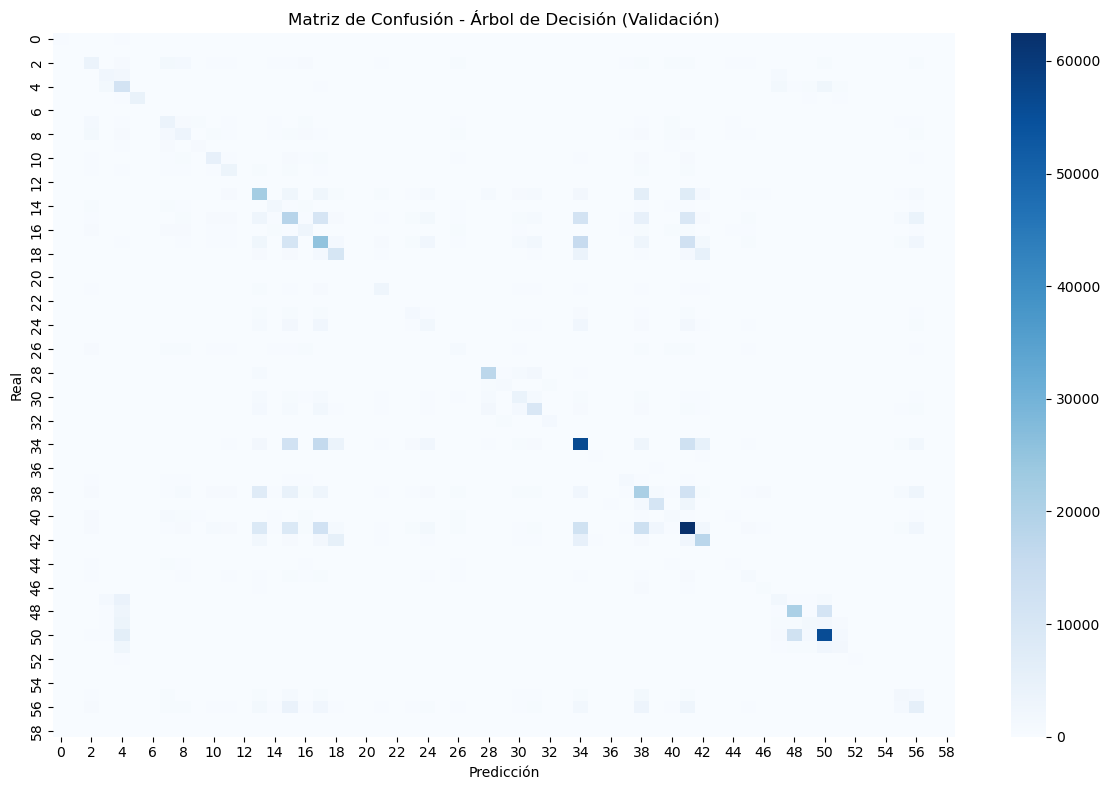

In [6]:
# Entrenamiento y Validación Modelo Arboles de Decisión Operaciones Monetarias y No Monetarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inicializar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_val = modelo_arbol.predict(X_val)

# 4. Evaluar desempeño en validación
exactitud_val = accuracy_score(y_val, y_pred_val)
print(f"Exactitud en el conjunto de validación (Árbol de Decisión): {exactitud_val:.4f}\n")

print("Reporte de clasificación (validación):")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(matriz_confusion_val, annot=False, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


In [ ]:
# Test Modelo Arboles de Decisión Operaciones Monetarias y No Monetarias

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inicializar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# 4. Evaluar desempeño
exactitud = accuracy_score(y_test, y_pred)
print(f"Exactitud en el conjunto de prueba Arbol de Decisión: {exactitud:.4f}\n")

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion = confusion_matrix(y_test, y_pred)
sns.heatmap(matriz_confusion, annot=False, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()



Exactitud en el conjunto de validación (Random Forest): 0.4030

Reporte de clasificación (Random Forest - validación):
                                                                                             precision    recall  f1-score   support

                                                   Apertura de otros productos de captación       0.14      0.11      0.12      3141
                                                  Apertura de productos de captación - CDAT       0.02      0.02      0.02       636
                                                   Apertura de productos de captación - CDT       0.24      0.23      0.23     17585
                                      Apertura de productos de captación - cuenta corriente       0.27      0.35      0.31      5813
                                      Apertura de productos de captación - cuenta de ahorro       0.29      0.51      0.37     21755
                                Apertura de productos de captación - depósito de 

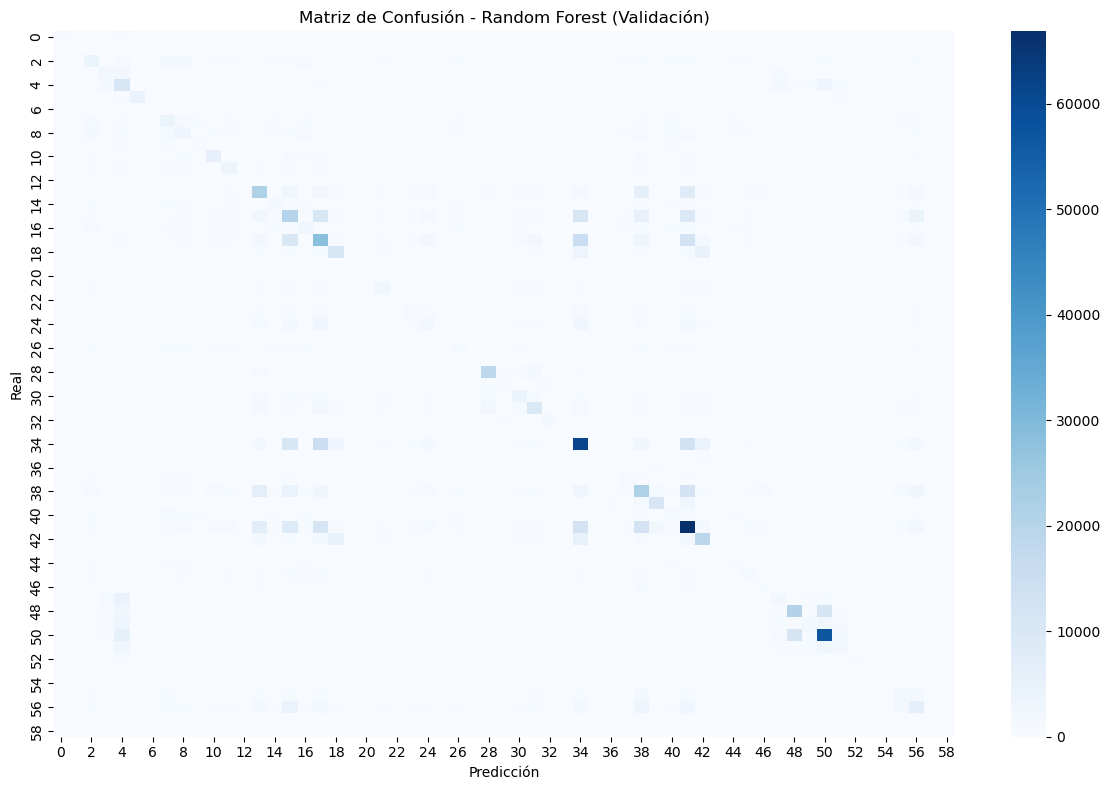

In [7]:
# Validación Modelo Random Forest Operaciones Monetarias y No Monetarias

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# 2. Entrenar el modelo con el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_rf_val = modelo_rf.predict(X_val)

# 4. Evaluación del modelo en validación
exactitud_rf_val = accuracy_score(y_val, y_pred_rf_val)
print(f"\nExactitud en el conjunto de validación (Random Forest): {exactitud_rf_val:.4f}\n")

print("Reporte de clasificación (Random Forest - validación):")
print(classification_report(y_val, y_pred_rf_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_rf_val = confusion_matrix(y_val, y_pred_rf_val)
sns.heatmap(matriz_confusion_rf_val, cmap="Blues", annot=False, fmt='g')
plt.title('Matriz de Confusión - Random Forest (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


In [ ]:
# Test Modelo Random Forest Operaciones Monetarias y No Monetarias

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# 2. Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# 4. Evaluación del modelo
exactitud_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud en el conjunto de prueba Random Forest: {exactitud_rf:.4f}\n")

print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matriz_confusion_rf, cmap="Blues", annot=False, fmt='g')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


Entrenando HistGradientBoostingClassifier...

Exactitud en el conjunto de validación (HistGradientBoosting): 0.2197

Reporte de clasificación (HistGradientBoosting - validación):


C:\ProgramData\anaconda3\envs\tfm_datos\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\tfm_datos\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\tfm_datos\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

                                                                                             precision    recall  f1-score   support

                                                   Apertura de otros productos de captación       0.00      0.00      0.00      3141
                                                  Apertura de productos de captación - CDAT       0.00      0.00      0.00       636
                                                   Apertura de productos de captación - CDT       0.13      0.04      0.06     17585
                                      Apertura de productos de captación - cuenta corriente       0.21      0.60      0.31      5813
                                      Apertura de productos de captación - cuenta de ahorro       0.29      0.15      0.20     21755
                                Apertura de productos de captación - depósito de bajo monto       0.09      0.07      0.08      6181
                                    Apertura de productos de captaci

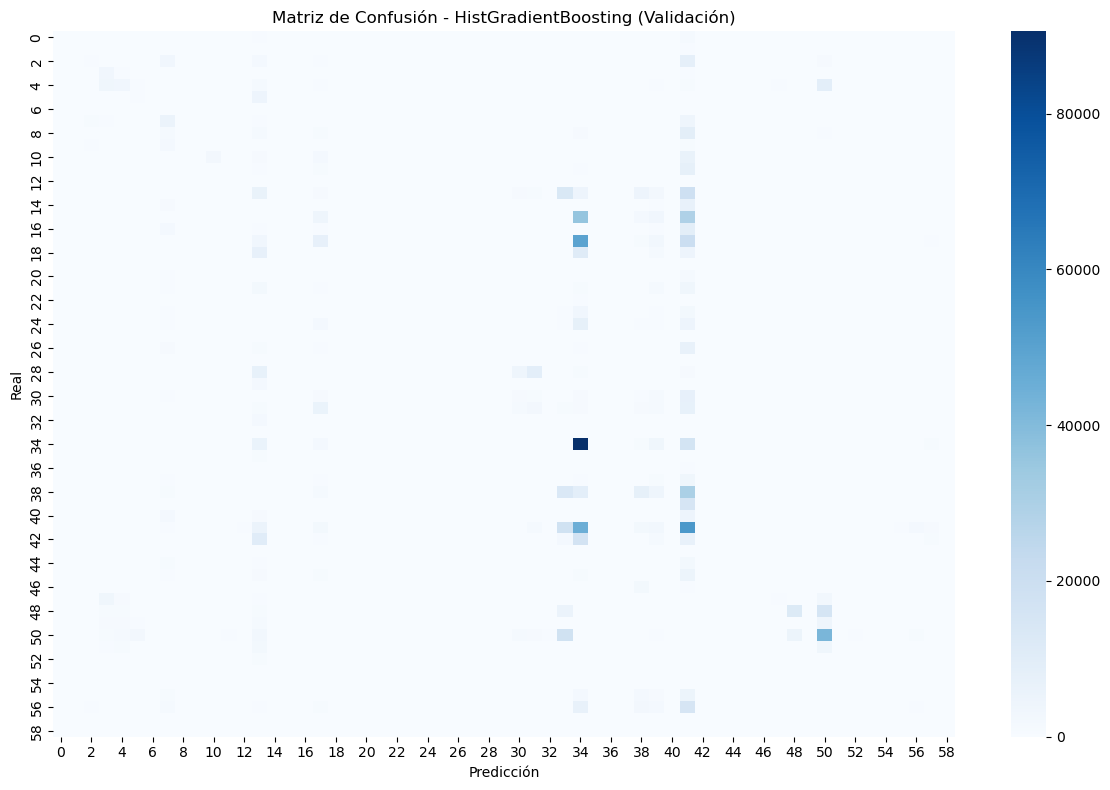

In [8]:
# Validación Modelo Gradient Booosting Operaciones Monetarias y No Monetarias

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar modelo optimizado para grandes datasets
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=50,         # equivalente a n_estimators
    max_depth=3,         # árboles no muy profundos
    random_state=42
)

# Entrenar modelo con conjunto de entrenamiento
print("Entrenando HistGradientBoostingClassifier...")
modelo_hgb.fit(X_train, y_train)

# Predecir sobre conjunto de validación
y_pred_hgb_val = modelo_hgb.predict(X_val)

# Evaluar desempeño en validación
exactitud_hgb_val = accuracy_score(y_val, y_pred_hgb_val)
print(f"\nExactitud en el conjunto de validación (HistGradientBoosting): {exactitud_hgb_val:.4f}\n")

print("Reporte de clasificación (HistGradientBoosting - validación):")
print(classification_report(y_val, y_pred_hgb_val, target_names=le.classes_))

# Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_hgb_val = confusion_matrix(y_val, y_pred_hgb_val)
sns.heatmap(matriz_confusion_hgb_val, cmap='Blues', annot=False)
plt.title('Matriz de Confusión - HistGradientBoosting (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


In [ ]:
# Test Modelo Gradient Booosting Operaciones Monetarias y No Monetarias

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar modelo optimizado para grandes datasets
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=50,         # equivalente a n_estimators
    max_depth=3,         # para evitar árboles muy complejos
    random_state=42
)

# Entrenar modelo 
print("Entrenando HistGradientBoostingClassifier..")
modelo_hgb.fit(X_train, y_train)

# Predecir
y_pred_hgb = modelo_hgb.predict(X_test)

# Evaluación
exactitud_hgb = accuracy_score(y_test, y_pred_hgb)
print(f"\nExactitud en el conjunto de prueba HistGradientBoosting: {exactitud_hgb:.4f}\n")

print("Reporte de clasificación (HistGradientBoosting):")
print(classification_report(y_test, y_pred_hgb, target_names=le.classes_))

# Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_hgb = confusion_matrix(y_test, y_pred_hgb)
sns.heatmap(matriz_confusion_hgb, cmap='Blues', annot=False)
plt.title('Matriz de Confusión - HistGradientBoosting')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


Entrenando LightGBM con validación interna...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 622
[LightGBM] [Info] Number of data points in the train set: 2565539, number of used features: 58
[LightGBM] [Info] Start training from score -5.857948
[LightGBM] [Info] Start training from score -7.455857
[LightGBM] [Info] Start training from score -4.135596
[LightGBM] [Info] Start training from score -5.242578
[LightGBM] [Info] Start training from score -3.922796
[LightGBM] [Info] Start training from score -5.181169
[LightGBM] [Info] Start training from score -9.823205
[LightGBM] [Info] Start training from score -4.456859
[LightGBM] [Info] Start training from score -4.214076
[LightGBM] [Info] Start training from score -5.577695
[LightGBM] [Info] Start training from score -4.429676
[Light

C:\ProgramData\anaconda3\envs\tfm_datos\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\tfm_datos\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\envs\tfm_datos\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

                                                                                             precision    recall  f1-score   support

                                                   Apertura de otros productos de captación       0.10      0.05      0.06      3141
                                                  Apertura de productos de captación - CDAT       0.01      0.00      0.00       636
                                                   Apertura de productos de captación - CDT       0.56      0.04      0.07     17585
                                      Apertura de productos de captación - cuenta corriente       0.22      0.56      0.32      5813
                                      Apertura de productos de captación - cuenta de ahorro       0.33      0.34      0.33     21755
                                Apertura de productos de captación - depósito de bajo monto       0.62      0.74      0.68      6181
                                    Apertura de productos de captaci

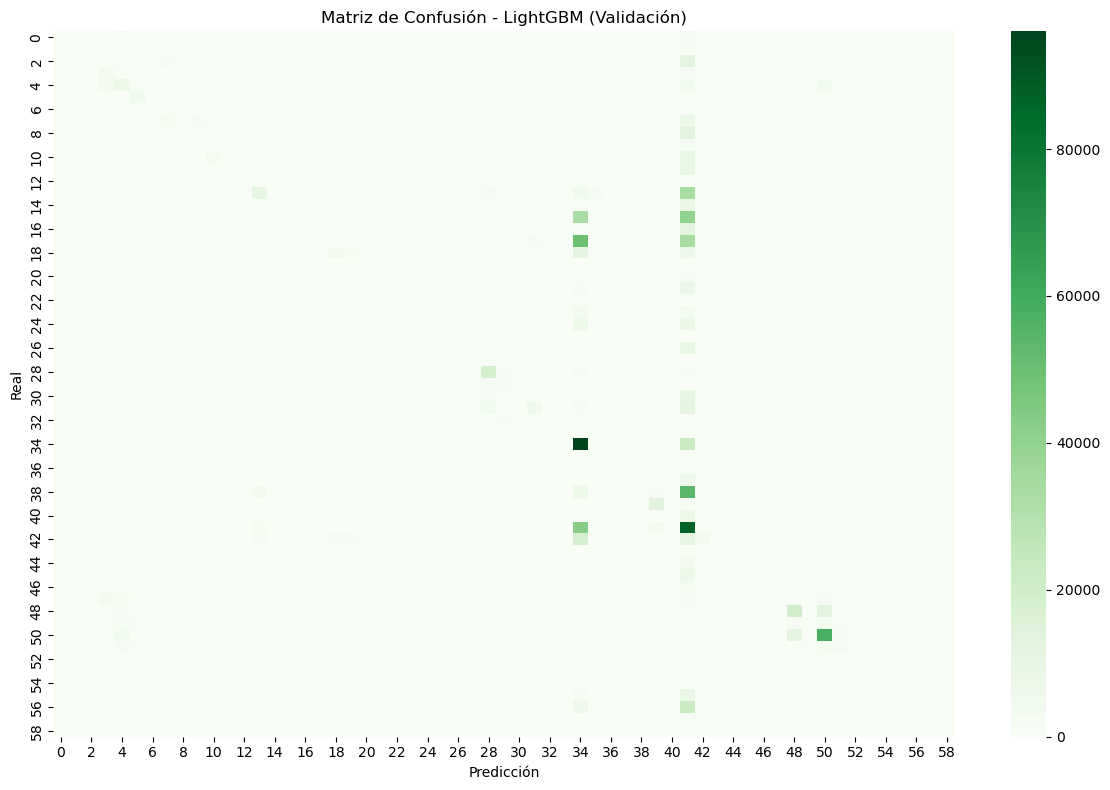

In [20]:
# Validación Modelo LGBM CODIGO_CANAL_AGRUPADO
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Renombrar columnas para compatibilidad con LightGBM
def renombrar_columnas_lightgbm(df):
    columnas_limpias = [f"feature_{i}" for i in range(df.shape[1])]
    df.columns = columnas_limpias
    return df

# Aplicar renombramiento
X_train = renombrar_columnas_lightgbm(X_train)
X_val = renombrar_columnas_lightgbm(X_val)
X_test = renombrar_columnas_lightgbm(X_test)

# 1. Inicializar el modelo
modelo_lgb = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)

# 2. Entrenamiento con conjunto de validación
print("Entrenando LightGBM con validación interna...")
modelo_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(10), log_evaluation(10)]
)

# 3. Predicción sobre conjunto de validación
y_pred_lgb_val = modelo_lgb.predict(X_val)

# 4. Evaluación del modelo
exactitud_lgb_val = accuracy_score(y_val, y_pred_lgb_val)
print(f"\n Exactitud en conjunto de validación (LightGBM): {exactitud_lgb_val:.4f}\n")

print(" Reporte de clasificación (LightGBM - validación):")
print(classification_report(y_val, y_pred_lgb_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_lgb_val = confusion_matrix(y_val, y_pred_lgb_val)
sns.heatmap(matriz_confusion_lgb_val, cmap="Greens", annot=False, fmt='g')
plt.title('Matriz de Confusión - LightGBM (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

In [ ]:
# Optimización con Grid Search

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Modelo base
modelo_rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Espacio de búsqueda controlado
param_grid = {
    'n_estimators': [30, 50],
    'max_depth': [10, 20],
    'max_features': ['sqrt'],
    'min_samples_split': [2, 5]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo_rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2,
    n_jobs=2  
)

# Entrenamiento
print("Ejecutando GridSearchCV...")
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Predicción final
mejor_modelo = grid_search.best_estimator_
y_pred = mejor_modelo.predict(X_test)

# Evaluación final
exactitud = accuracy_score(y_test, y_pred)
print(f"\nExactitud del modelo optimizado (Grid Search): {exactitud:.4f}\n")
print("Reporte de clasificación (modelo final optimizado):")
print(classification_report(y_test, y_pred, target_names=le.classes_))


##### Predicción CODIGO_OPERACION_AGRUPADO

In [9]:
# Copia de trabajo
df_modelo = df_monetarias_modelo_prediccion.copy()

# 1. MONTO_PROMEDIO_POR_OPERACION
df_modelo['MONTO_PROMEDIO_POR_OPERACION'] = df_modelo['MONTO_OPERACIONES'] / df_modelo['CANTIDAD_OPERACIONES']
df_modelo['MONTO_PROMEDIO_POR_OPERACION'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_modelo['MONTO_PROMEDIO_POR_OPERACION'].fillna(0, inplace=True)

# 2. LOG_MONTO_OPERACIONES (para amortiguar valores extremos)
df_modelo['LOG_MONTO_OPERACIONES'] = np.log1p(df_modelo['MONTO_OPERACIONES'])

# 3. LOG_CANTIDAD_OPERACIONES
df_modelo['LOG_CANTIDAD_OPERACIONES'] = np.log1p(df_modelo['CANTIDAD_OPERACIONES'])


# Verifica nuevas columnas
df_modelo[['MONTO_OPERACIONES', 'CANTIDAD_OPERACIONES', 'MONTO_PROMEDIO_POR_OPERACION',
           'LOG_MONTO_OPERACIONES', 'LOG_CANTIDAD_OPERACIONES']].describe()


C:\Users\user\AppData\Local\Temp\ipykernel_4392\1787096272.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_modelo['MONTO_PROMEDIO_POR_OPERACION'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4392\1787096272.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

,MONTO_OPERACIONES,CANTIDAD_OPERACIONES,MONTO_PROMEDIO_POR_OPERACION,LOG_MONTO_OPERACIONES,LOG_CANTIDAD_OPERACIONES
count,4581322.00,4581322.00,4581322.00,4581322.00,4581322.00
mean,4554789779.60,7670.10,17024139.93,14.24,3.44
std,281351277165.17,1142769.02,2164476479.82,6.88,2.25
min,0.00,0.00,0.00,0.00,0.00
25%,500000.00,4.00,118183.58,13.12,1.61
50%,11839523.50,20.00,441631.93,16.29,3.04
75%,142269518.50,132.00,1796214.71,18.77,4.89
max,85829578904638.00,839624076.00,3283504000000.00,32.08,20.55


In [10]:
import numpy as np

# Crear copia de trabajo
df_monetarias_modelo_ajustado = df_monetarias_modelo_prediccion.copy()

# 1. MONTO_PROMEDIO_POR_OPERACION
df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'] = (
    df_monetarias_modelo_ajustado['MONTO_OPERACIONES'] / df_monetarias_modelo_ajustado['CANTIDAD_OPERACIONES']
)
df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'].fillna(0, inplace=True)

# 2. LOG_MONTO_OPERACIONES
df_monetarias_modelo_ajustado['LOG_MONTO_OPERACIONES'] = np.log1p(df_monetarias_modelo_ajustado['MONTO_OPERACIONES'])

# 3. LOG_CANTIDAD_OPERACIONES
df_monetarias_modelo_ajustado['LOG_CANTIDAD_OPERACIONES'] = np.log1p(df_monetarias_modelo_ajustado['CANTIDAD_OPERACIONES'])



C:\Users\user\AppData\Local\Temp\ipykernel_4392\425483524.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4392\425483524.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

In [21]:
# Ajuste df para CODIGO_OPERACION_AGRUPADO 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Variables seleccionadas
variables_explicativas = [
    'TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'NOMBRE_DEPARTAMENTO',
    'MONTO_PROMEDIO_POR_OPERACION', 'LOG_MONTO_OPERACIONES', 'LOG_CANTIDAD_OPERACIONES'
]

objetivo = 'CODIGO_OPERACION_AGRUPADO'

# 2. Subconjunto de columnas
df_modelo = df_monetarias_modelo_ajustado[variables_explicativas + [objetivo]].copy()

# 3. One Hot Encoding para variables categóricas
df_codificado = pd.get_dummies(df_modelo, columns=[
    'TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'NOMBRE_DEPARTAMENTO'
])

# 4. Separar variables predictoras y objetivo
X = df_codificado.drop(columns=[objetivo])
y = df_codificado[objetivo]

# 5. Codificar variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# 6. División 80% train/val y 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 7. División del 80% restante: 70% train / 30% val
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3, stratify=y_temp, random_state=42
)

# 8. Verificación
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (2565539, 59)
Tamaño del conjunto de validación: (1099518, 59)
Tamaño del conjunto de prueba: (916265, 59)



Exactitud en el conjunto de validación (Random Forest): 0.5597

Reporte de clasificación (Random Forest - validación):
                                    precision    recall  f1-score   support

   Apertura Productos de Captación       0.43      0.36      0.39     55170
Aprobación Productos de Colocación       0.41      0.43      0.42     56968
                Avances y créditos       0.42      0.37      0.39     55305
                         Depósitos       0.46      0.48      0.47    223722
        Giros Enviados o Recibidos       0.19      0.15      0.17     25071
                             Pagos       0.58      0.57      0.57    199365
                           Retiros       0.59      0.61      0.60    294415
                       Solicitudes       0.87      0.94      0.90    144847
                    Transferencias       0.29      0.25      0.27     44655

                          accuracy                           0.56   1099518
                         macro avg       0

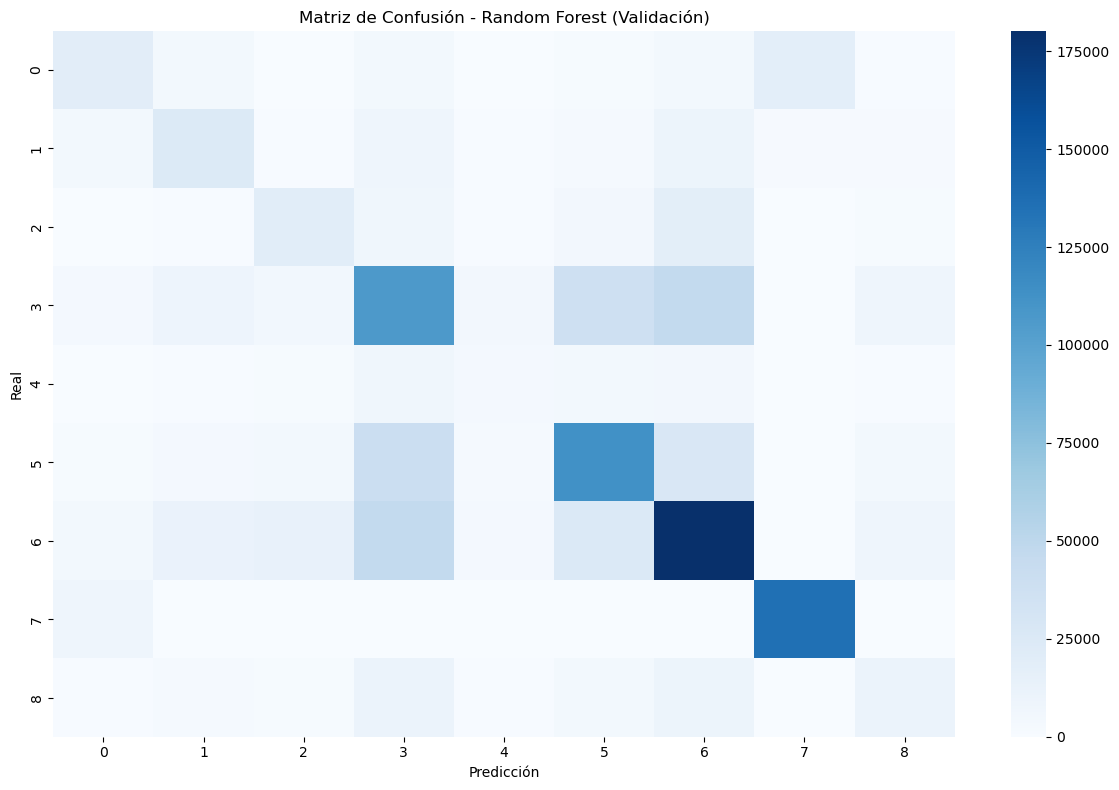

In [12]:
# Validación Random Forest CODIGO_OPERACIÓN_AGRUPADO
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# 2. Entrenar el modelo con el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_rf_val = modelo_rf.predict(X_val)

# 4. Evaluación del modelo en validación
exactitud_rf_val = accuracy_score(y_val, y_pred_rf_val)
print(f"\nExactitud en el conjunto de validación (Random Forest): {exactitud_rf_val:.4f}\n")

print("Reporte de clasificación (Random Forest - validación):")
print(classification_report(y_val, y_pred_rf_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_rf_val = confusion_matrix(y_val, y_pred_rf_val)
sns.heatmap(matriz_confusion_rf_val, cmap="Blues", annot=False, fmt='g')
plt.title('Matriz de Confusión - Random Forest (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


In [ ]:
# Test Random Forest Predicción CODIGO_OPERACIÓN_AGRUPADO

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# 2. Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# 4. Evaluación del modelo
exactitud_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud en el conjunto de prueba Random Forest: {exactitud_rf:.4f}\n")

print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matriz_confusion_rf, cmap="Blues", annot=False, fmt='g')
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


Entrenando LightGBM con validación interna...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 2565539, number of used features: 59
[LightGBM] [Info] Start training from score -2.992199
[LightGBM] [Info] Start training from score -2.960124
[LightGBM] [Info] Start training from score -2.989755
[LightGBM] [Info] Start training from score -1.592226
[LightGBM] [Info] Start training from score -3.780931
[LightGBM] [Info] Start training from score -1.707489
[LightGBM] [Info] Start training from score -1.317638
[LightGBM] [Info] Start training from score -2.026952
[LightGBM] [Info] Start training from score -3.203669
Training until validation scores don't improve for 10 rounds
[10]	valid_0's multi_logloss: 1.25141
[20]	valid_0's 

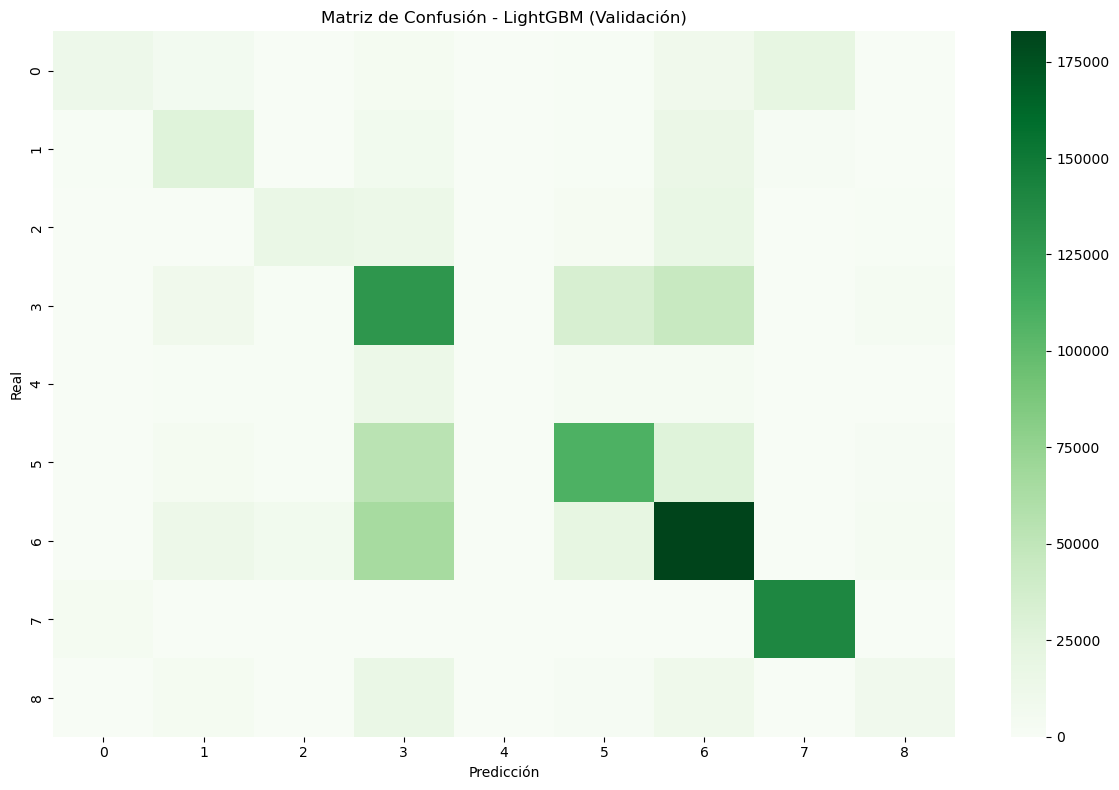

In [13]:
# Validación Modelo LGBM CODIGO_OPERACIÓN_AGRUPADO
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Renombrar columnas para compatibilidad con LightGBM
def renombrar_columnas_lightgbm(df):
    columnas_limpias = [f"feature_{i}" for i in range(df.shape[1])]
    df.columns = columnas_limpias
    return df

# Aplicar renombramiento
X_train = renombrar_columnas_lightgbm(X_train)
X_val = renombrar_columnas_lightgbm(X_val)
X_test = renombrar_columnas_lightgbm(X_test)

# 1. Inicializar el modelo
modelo_lgb = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)

# 2. Entrenamiento con conjunto de validación
print("Entrenando LightGBM con validación interna...")
modelo_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(10), log_evaluation(10)]
)

# 3. Predicción sobre conjunto de validación
y_pred_lgb_val = modelo_lgb.predict(X_val)

# 4. Evaluación del modelo
exactitud_lgb_val = accuracy_score(y_val, y_pred_lgb_val)
print(f"\n Exactitud en conjunto de validación (LightGBM): {exactitud_lgb_val:.4f}\n")

print(" Reporte de clasificación (LightGBM - validación):")
print(classification_report(y_val, y_pred_lgb_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_lgb_val = confusion_matrix(y_val, y_pred_lgb_val)
sns.heatmap(matriz_confusion_lgb_val, cmap="Greens", annot=False, fmt='g')
plt.title('Matriz de Confusión - LightGBM (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


Entrenando LightGBM con clases agrupadas...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.048478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 2565539, number of used features: 59
[LightGBM] [Info] Start training from score -2.992199
[LightGBM] [Info] Start training from score -2.960124
[LightGBM] [Info] Start training from score -2.989755
[LightGBM] [Info] Start training from score -1.592226
[LightGBM] [Info] Start training from score -3.780931
[LightGBM] [Info] Start training from score -1.707489
[LightGBM] [Info] Start training from score -1.317638
[LightGBM] [Info] Start training from score -2.026952
[LightGBM] [Info] Start training from score -3.203669
Training until validation scores don't improve for 10 rounds
[10]	valid_0's multi_logloss: 1.25141
[20]	valid_0's mu

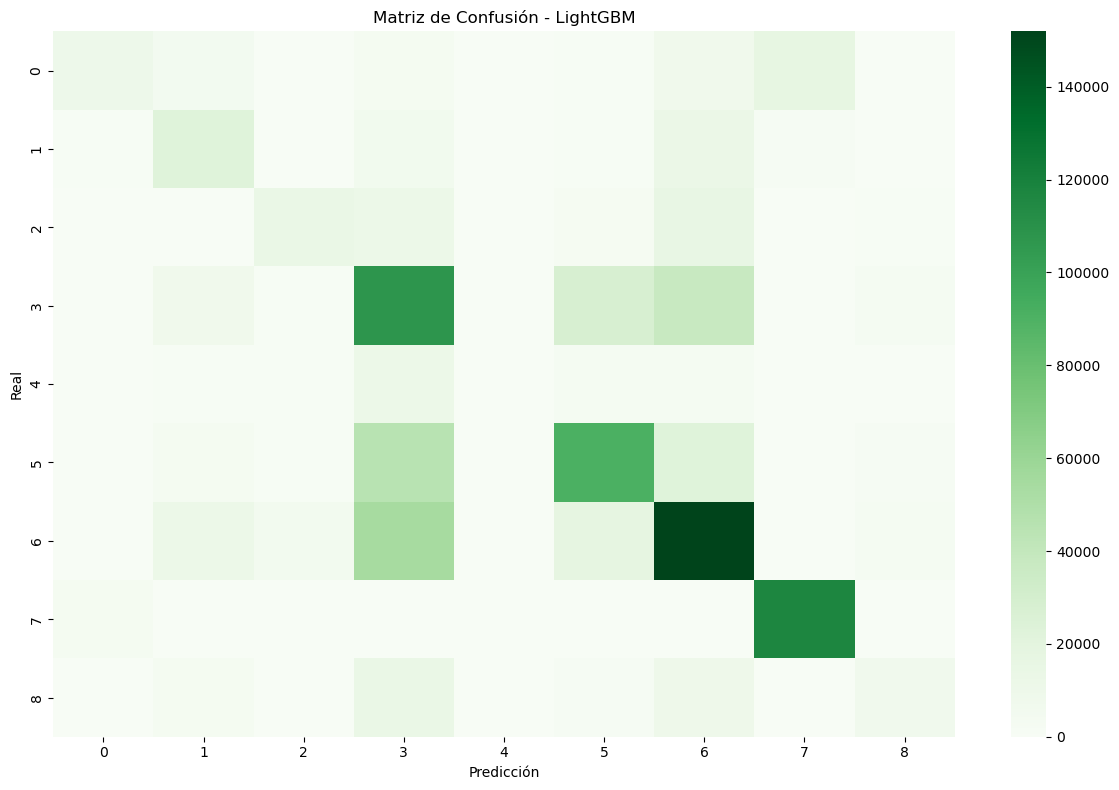

In [14]:
# test Modelo LGBM CODIGO_OPERACIÓN_AGRUPADO

from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def renombrar_columnas_lightgbm(df):
    columnas_limpias = [f"feature_{i}" for i in range(df.shape[1])]
    df.columns = columnas_limpias
    return df

# Aplicar renombramiento
X_train = renombrar_columnas_lightgbm(X_train)
X_val = renombrar_columnas_lightgbm(X_val)
X_test = renombrar_columnas_lightgbm(X_test)

# 1. Inicializar el modelo
modelo_lgb = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)

# 2. Entrenamiento con callbacks
print("Entrenando LightGBM con clases agrupadas...")
modelo_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(10), log_evaluation(10)]
)

# 3. Predicción sobre conjunto de prueba
y_pred_lgb = modelo_lgb.predict(X_test)

# 4. Evaluación del modelo
exactitud_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"\nExactitud en conjunto de prueba (LightGBM): {exactitud_lgb:.4f}")

print("\nReporte de clasificación (LightGBM):")
print(classification_report(y_test, y_pred_lgb, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(matriz, cmap="Greens", annot=False, fmt='g')
plt.title('Matriz de Confusión - LightGBM')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


Exactitud en el conjunto de validación (Árbol de Decisión): 0.5424

Reporte de clasificación (validación):
                                    precision    recall  f1-score   support

   Apertura Productos de Captación       0.42      0.37      0.39     55170
Aprobación Productos de Colocación       0.41      0.44      0.42     56968
                Avances y créditos       0.38      0.38      0.38     55305
                         Depósitos       0.44      0.44      0.44    223722
        Giros Enviados o Recibidos       0.19      0.18      0.19     25071
                             Pagos       0.56      0.54      0.55    199365
                           Retiros       0.58      0.59      0.58    294415
                       Solicitudes       0.87      0.93      0.90    144847
                    Transferencias       0.27      0.24      0.25     44655

                          accuracy                           0.54   1099518
                         macro avg       0.46      0.46

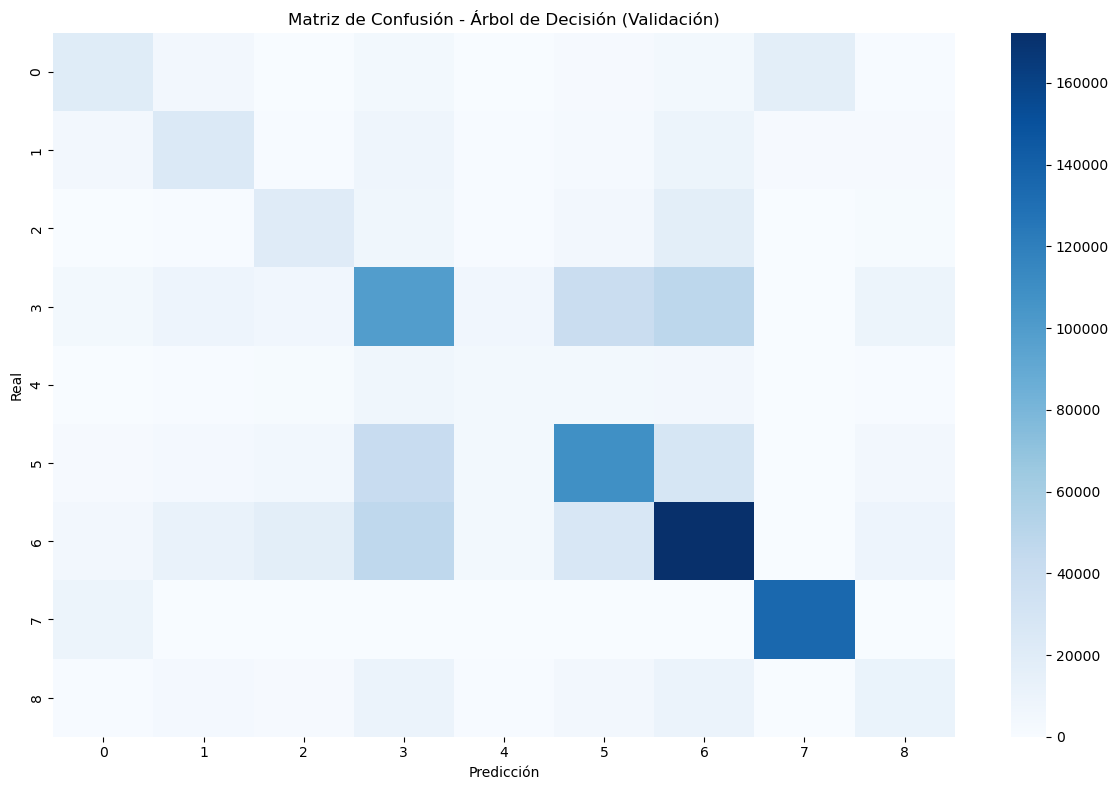

In [22]:
# Entrenamiento y Validación Modelo Arboles de Decisión Operaciones Monetarias y No Monetarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inicializar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_val = modelo_arbol.predict(X_val)

# 4. Evaluar desempeño en validación
exactitud_val = accuracy_score(y_val, y_pred_val)
print(f"Exactitud en el conjunto de validación (Árbol de Decisión): {exactitud_val:.4f}\n")

print("Reporte de clasificación (validación):")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(matriz_confusion_val, annot=False, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

##### Predicción CODIGO_CANAL_AGRUPADO

In [23]:
# Ajuste df para CODIGO_CANAL_AGRUPADO 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Crear copia base
df_monetarias_modelo_ajustado = df_monetarias_modelo_prediccion.copy()

# 2. Ingeniería de características (si aún no las tiene)
df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'] = (
    df_monetarias_modelo_ajustado['MONTO_OPERACIONES'] / df_monetarias_modelo_ajustado['CANTIDAD_OPERACIONES']
)
df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'].replace([np.inf, -np.inf], np.nan, inplace=True)
df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'].fillna(0, inplace=True)

df_monetarias_modelo_ajustado['LOG_MONTO_OPERACIONES'] = np.log1p(df_monetarias_modelo_ajustado['MONTO_OPERACIONES'])
df_monetarias_modelo_ajustado['LOG_CANTIDAD_OPERACIONES'] = np.log1p(df_monetarias_modelo_ajustado['CANTIDAD_OPERACIONES'])

# 3. Seleccionar variables predictoras y objetivo
variables_explicativas = [
    'TIPO_ENTIDAD',
    'CODIGO_OPERACION',
    'NOMBRE_DEPARTAMENTO',
    'MONTO_PROMEDIO_POR_OPERACION',
    'LOG_MONTO_OPERACIONES',
    'LOG_CANTIDAD_OPERACIONES'
]

objetivo = 'CODIGO_CANAL_AGRUPADO'

df_modelo = df_monetarias_modelo_ajustado[variables_explicativas + [objetivo]].copy()

# 4. Codificación One Hot para variables categóricas
df_codificado = pd.get_dummies(df_modelo, columns=[
    'TIPO_ENTIDAD', 'CODIGO_OPERACION', 'NOMBRE_DEPARTAMENTO'
])

# 5. Separar X e y
X = df_codificado.drop(columns=[objetivo])
y = df_codificado[objetivo]

# 6. Codificar la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# 7. División train/test/val
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, stratify=y_temp, random_state=42)

# 8. Verificación
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


C:\Users\user\AppData\Local\Temp\ipykernel_4392\2918486487.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_monetarias_modelo_ajustado['MONTO_PROMEDIO_POR_OPERACION'].replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4392\2918486487.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on wh

Tamaño del conjunto de entrenamiento: (2565539, 100)
Tamaño del conjunto de validación: (1099518, 100)
Tamaño del conjunto de prueba: (916265, 100)



Exactitud en el conjunto de validación (Random Forest): 0.8086

Reporte de clasificación (Random Forest - validación):
                                              precision    recall  f1-score   support

                        Aplicaciones Móviles       0.83      0.77      0.80     13036
                           Asistente virtual       0.43      0.40      0.42       344
                           Cajero automático       0.63      0.64      0.63    182477
                   Call center/Contac center       0.52      0.23      0.32      3175
                                Corresponsal       0.79      0.82      0.81    408204
                                    Internet       0.71      0.59      0.65      6977
                                    Oficinas       0.90      0.87      0.89    420824
                                         POS       0.59      0.36      0.45      2038
                              POS no propios       0.90      0.87      0.88     61861
            Sistema

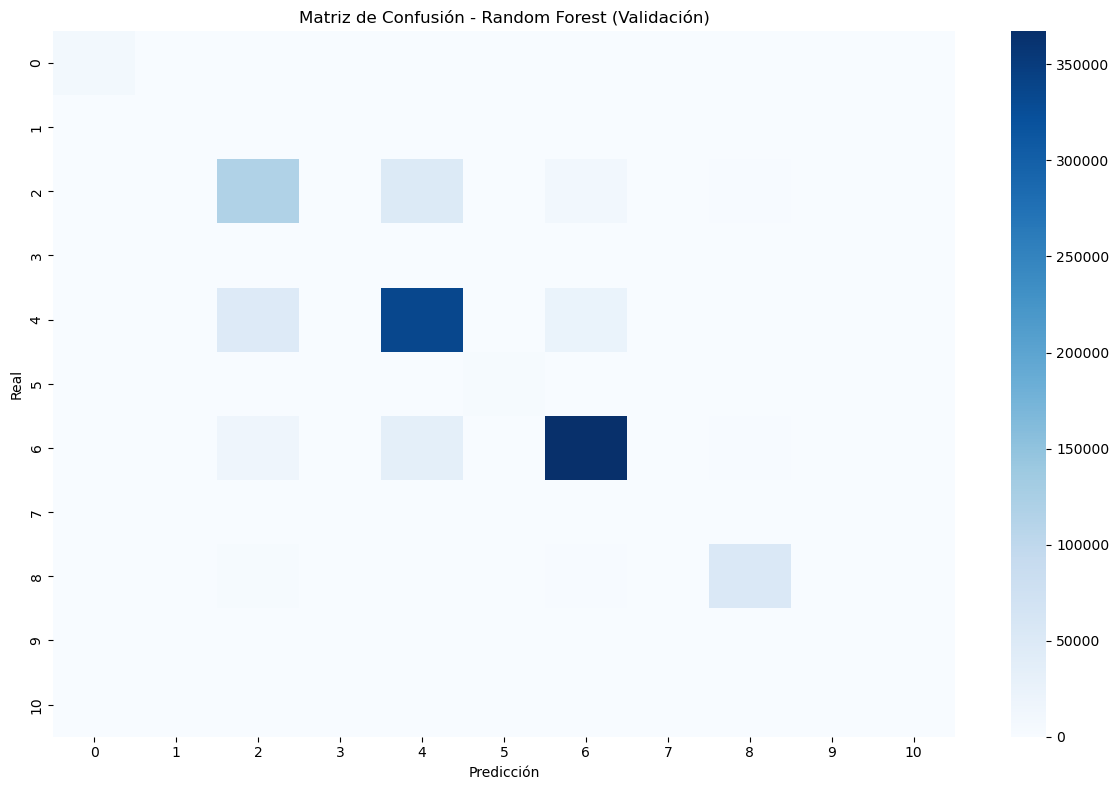

In [16]:
# Validación Random Forest CODIGO_CANAL_AGRUPADO
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo Random Forest
modelo_rf = RandomForestClassifier(n_estimators=30, random_state=42, n_jobs=-1)

# 2. Entrenar el modelo con el conjunto de entrenamiento
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_rf_val = modelo_rf.predict(X_val)

# 4. Evaluación del modelo en validación
exactitud_rf_val = accuracy_score(y_val, y_pred_rf_val)
print(f"\nExactitud en el conjunto de validación (Random Forest): {exactitud_rf_val:.4f}\n")

print("Reporte de clasificación (Random Forest - validación):")
print(classification_report(y_val, y_pred_rf_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_rf_val = confusion_matrix(y_val, y_pred_rf_val)
sns.heatmap(matriz_confusion_rf_val, cmap="Blues", annot=False, fmt='g')
plt.title('Matriz de Confusión - Random Forest (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


 Exactitud final sobre conjunto de prueba (Random Forest): 0.8076

Reporte de clasificación (Random Forest - prueba):
                                              precision    recall  f1-score   support

                        Aplicaciones Móviles       0.83      0.76      0.80     10863
                           Asistente virtual       0.45      0.41      0.43       287
                           Cajero automático       0.63      0.64      0.63    152065
                   Call center/Contac center       0.54      0.24      0.33      2646
                                Corresponsal       0.79      0.82      0.81    340170
                                    Internet       0.71      0.59      0.65      5814
                                    Oficinas       0.90      0.87      0.88    350687
                                         POS       0.61      0.38      0.47      1698
                              POS no propios       0.89      0.87      0.88     51551
            Sistema 

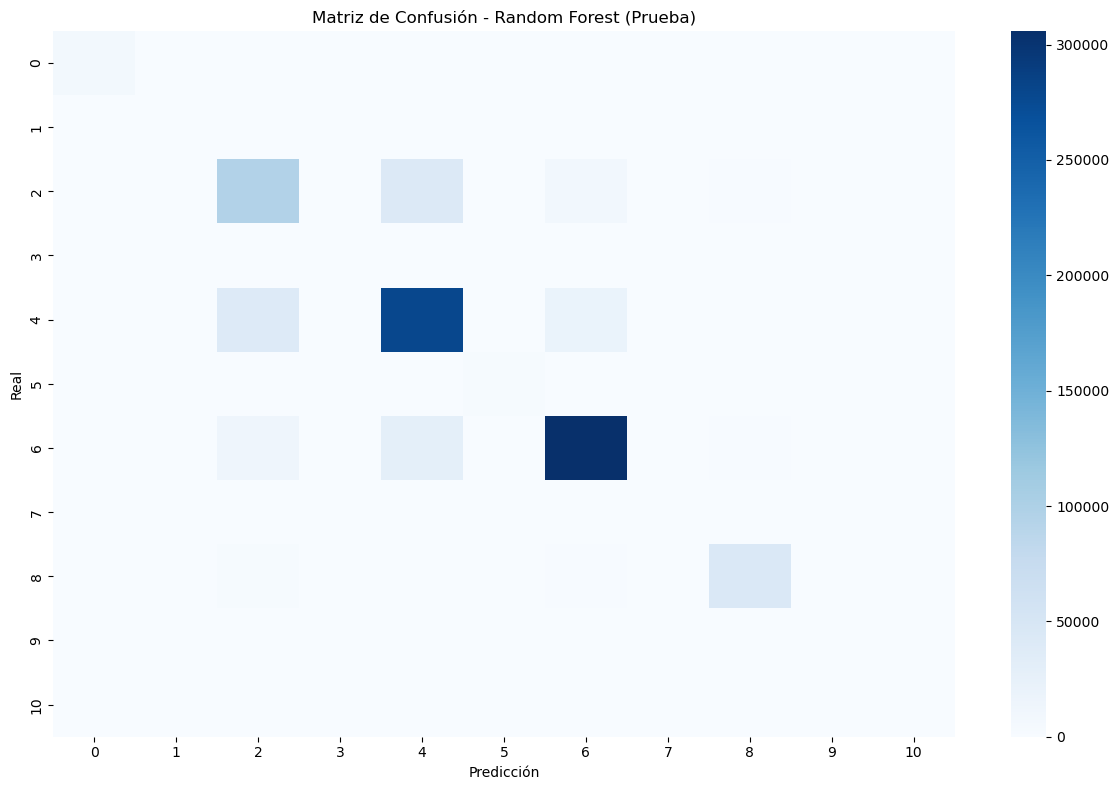

In [17]:
# Evaluación final del modelo Random Forest CODIGO_CANAL_AGRUPADO sobre el conjunto de prueba

# 1. Predecir sobre el conjunto de prueba
y_pred_rf_test = modelo_rf.predict(X_test)

# 2. Evaluación
exactitud_rf_test = accuracy_score(y_test, y_pred_rf_test)
print(f"\n Exactitud final sobre conjunto de prueba (Random Forest): {exactitud_rf_test:.4f}\n")

print("Reporte de clasificación (Random Forest - prueba):")
print(classification_report(y_test, y_pred_rf_test, target_names=le.classes_))

# 3. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_rf_test = confusion_matrix(y_test, y_pred_rf_test)
sns.heatmap(matriz_confusion_rf_test, cmap="Blues", annot=False, fmt='g')
plt.title('Matriz de Confusión - Random Forest (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


Entrenando LightGBM con validación interna...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.125299 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 957
[LightGBM] [Info] Number of data points in the train set: 2565539, number of used features: 99
[LightGBM] [Info] Start training from score -4.434889
[LightGBM] [Info] Start training from score -8.070571
[LightGBM] [Info] Start training from score -1.795999
[LightGBM] [Info] Start training from score -5.847228
[LightGBM] [Info] Start training from score -0.990860
[LightGBM] [Info] Start training from score -5.060048
[LightGBM] [Info] Start training from score -0.960412
[LightGBM] [Info] Start training from score -6.290938
[LightGBM] [Info] Start training from score -2.877731
[LightGBM] [Info] Start training from score -7.795436
[LightGBM] [Info] Start training from score -9.053897
[LightGBM] [Warning] No further splits with positive gain, best gain: 

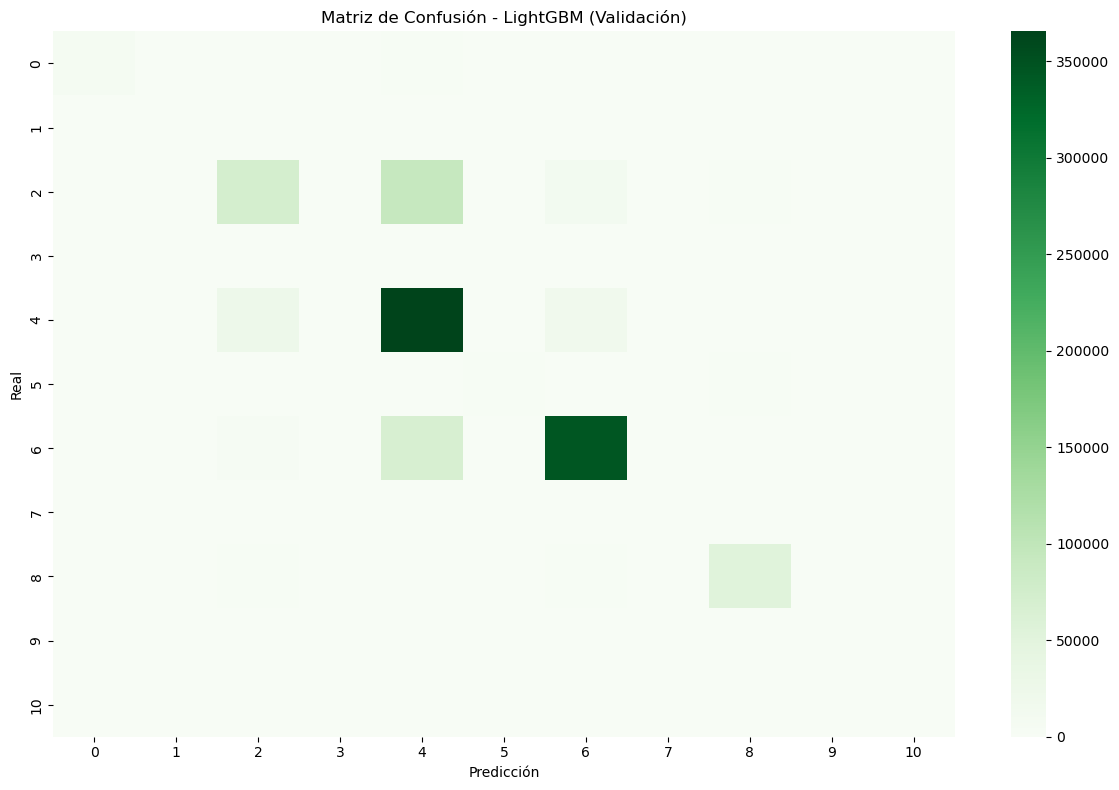

In [24]:
# Validación Modelo LGBM CODIGO_CANAL_AGRUPADO
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Renombrar columnas para compatibilidad con LightGBM
def renombrar_columnas_lightgbm(df):
    columnas_limpias = [f"feature_{i}" for i in range(df.shape[1])]
    df.columns = columnas_limpias
    return df

# Aplicar renombramiento
X_train = renombrar_columnas_lightgbm(X_train)
X_val = renombrar_columnas_lightgbm(X_val)
X_test = renombrar_columnas_lightgbm(X_test)

# 1. Inicializar el modelo
modelo_lgb = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)

# 2. Entrenamiento con conjunto de validación
print("Entrenando LightGBM con validación interna...")
modelo_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(10), log_evaluation(10)]
)

# 3. Predicción sobre conjunto de validación
y_pred_lgb_val = modelo_lgb.predict(X_val)

# 4. Evaluación del modelo
exactitud_lgb_val = accuracy_score(y_val, y_pred_lgb_val)
print(f"\n Exactitud en conjunto de validación (LightGBM): {exactitud_lgb_val:.4f}\n")

print(" Reporte de clasificación (LightGBM - validación):")
print(classification_report(y_val, y_pred_lgb_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_lgb_val = confusion_matrix(y_val, y_pred_lgb_val)
sns.heatmap(matriz_confusion_lgb_val, cmap="Greens", annot=False, fmt='g')
plt.title('Matriz de Confusión - LightGBM (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

In [ ]:
# Test Modelo LGBM CODIGO_CANAL_AGRUPADO

from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def renombrar_columnas_lightgbm(df):
    columnas_limpias = [f"feature_{i}" for i in range(df.shape[1])]
    df.columns = columnas_limpias
    return df

# Aplicar renombramiento
X_train = renombrar_columnas_lightgbm(X_train)
X_val = renombrar_columnas_lightgbm(X_val)
X_test = renombrar_columnas_lightgbm(X_test)

# 1. Inicializar el modelo
modelo_lgb = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)

# 2. Entrenamiento con callbacks
print("Entrenando LightGBM con clases agrupadas...")
modelo_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(10), log_evaluation(10)]
)

# 3. Predicción sobre conjunto de prueba
y_pred_lgb = modelo_lgb.predict(X_test)

# 4. Evaluación del modelo
exactitud_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"\nExactitud en conjunto de prueba (LightGBM): {exactitud_lgb:.4f}")

print("\nReporte de clasificación (LightGBM):")
print(classification_report(y_test, y_pred_lgb, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz = confusion_matrix(y_test, y_pred_lgb)
sns.heatmap(matriz, cmap="Greens", annot=False, fmt='g')
plt.title('Matriz de Confusión - LightGBM')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

Exactitud en el conjunto de validación (Árbol de Decisión): 0.7880

Reporte de clasificación (validación):
                                              precision    recall  f1-score   support

                        Aplicaciones Móviles       0.78      0.77      0.78     13036
                           Asistente virtual       0.41      0.41      0.41       344
                           Cajero automático       0.59      0.63      0.61    182477
                   Call center/Contac center       0.48      0.23      0.31      3175
                                Corresponsal       0.78      0.79      0.78    408204
                                    Internet       0.65      0.58      0.61      6977
                                    Oficinas       0.88      0.86      0.87    420824
                                         POS       0.44      0.37      0.40      2038
                              POS no propios       0.88      0.86      0.87     61861
            Sistema de Audio Res

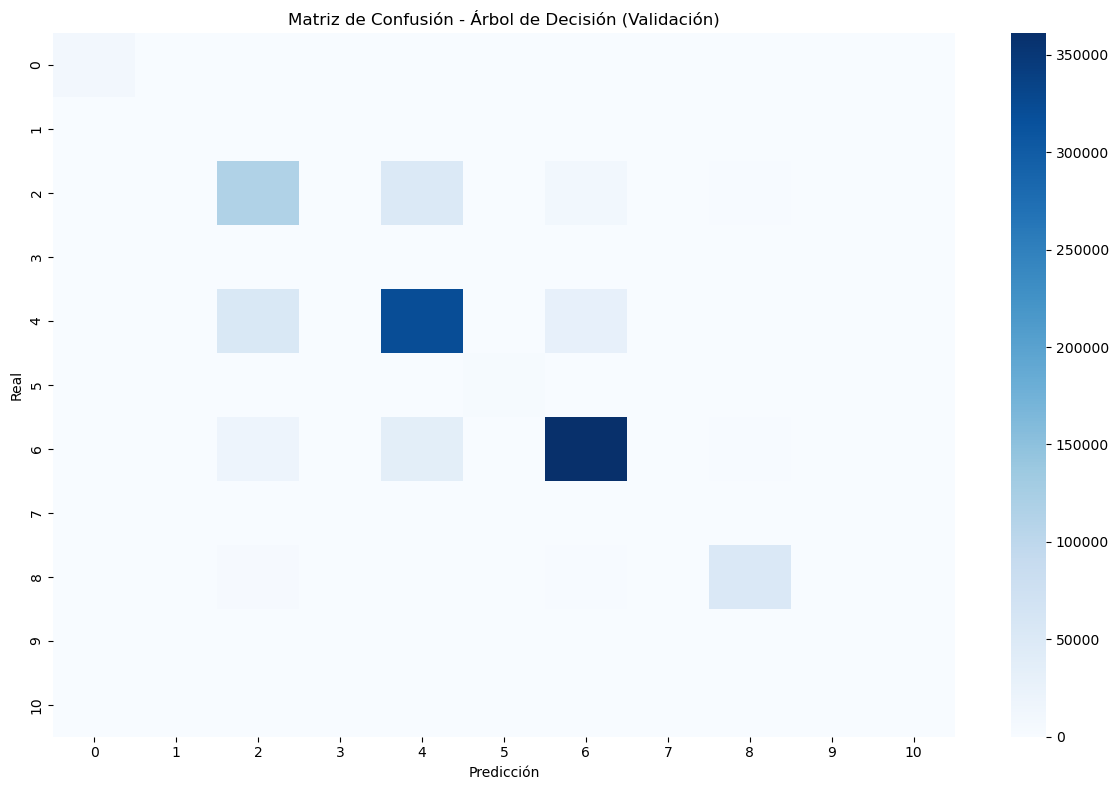

In [25]:
# Entrenamiento y Validación Modelo Arboles de Decisión Operaciones Monetarias y No Monetarias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inicializar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo con el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_val = modelo_arbol.predict(X_val)

# 4. Evaluar desempeño en validación
exactitud_val = accuracy_score(y_val, y_pred_val)
print(f"Exactitud en el conjunto de validación (Árbol de Decisión): {exactitud_val:.4f}\n")

print("Reporte de clasificación (validación):")
print(classification_report(y_val, y_pred_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_val = confusion_matrix(y_val, y_pred_val)
sns.heatmap(matriz_confusion_val, annot=False, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

#### Unidad de Captura Pagos por Actividad Económica

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Definir el dataframe base
df_modelo = df_actividad_economica_modelo_prediccion.copy()

# 2. Definir variables explicativas y objetivo
variables_explicativas = ['TIPO_ENTIDAD', 
                          'CODIGO_CANAL_DISTRIBUCION',
                          'MONTO_OPERACIONES', 
                          'CANTIDAD_OPERACIONES', 
                          'NOMBRE_DEPARTAMENTO']

objetivo = 'SECCION_ACTIVIDAD_CIIU'

# 3. Subset con columnas relevantes
df_modelo = df_modelo[variables_explicativas + [objetivo]].copy()

# 4. Identificar variables categóricas para codificación
variables_categoricas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION', 'NOMBRE_DEPARTAMENTO']

# 5. Codificación One-Hot para variables categóricas
df_codificado = pd.get_dummies(df_modelo, columns=variables_categoricas)

# 6. Separar X e y
X = df_codificado.drop(columns=[objetivo])
y = df_codificado[objetivo]

# 7. Codificación de la variable objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# 8. División: 80% entrenamiento + validación / 20% prueba
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# 9. División del 80% restante en 70% entrenamiento / 30% validación
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.3, stratify=y_temp, random_state=42)

# 10. Verificación de tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


In [ ]:
# Modelo Arbol de Decisión Pagos por Actividad Económica

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)

# 4. Evaluar el modelo
exactitud = accuracy_score(y_test, y_pred_arbol)
print(f"Exactitud en el conjunto de prueba (Árbol de Decisión): {exactitud:.4f}\n")

# 5. Reporte de clasificación
print("Reporte de clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_arbol, target_names=le.classes_))

# 6. Matriz de confusión (opcional si el número de clases es legible)
matriz_confusion = confusion_matrix(y_test, y_pred_arbol)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_confusion, cmap='Blues', square=True, cbar=False)
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


In [ ]:
#Modelo Random Forest Pagos por Actividad Económica
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Inicializar el modelo con configuración base
modelo_rf = RandomForestClassifier(
    n_estimators=30,         # número de árboles
    random_state=42,
    n_jobs=-1                # uso de todos los núcleos disponibles
)

# 2. Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# 4. Evaluar el modelo
exactitud_rf = accuracy_score(y_test, y_pred_rf)
print(f"Exactitud en el conjunto de prueba (Random Forest): {exactitud_rf:.4f}\n")

# 5. Reporte de clasificación
print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))


In [ ]:
#Modelo Gradient Boosting Pagos por Actividad Económica

from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Inicializar modelo optimizado para datasets grandes
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=50,       # número de iteraciones (equivale a n_estimators)
    max_depth=3,       # profundidad máxima de cada árbol
    random_state=42
)

# Entrenamiento
print("Entrenando HistGradientBoostingClassifier...")
modelo_hgb.fit(X_train, y_train)

# Predicción sobre el conjunto de prueba
y_pred_hgb = modelo_hgb.predict(X_test)

# Evaluación de exactitud
exactitud_hgb = accuracy_score(y_test, y_pred_hgb)
print(f"\nExactitud en el conjunto de prueba (HistGradientBoosting): {exactitud_hgb:.4f}\n")

# Reporte de clasificación
print("Reporte de clasificación (HistGradientBoosting):")
print(classification_report(y_test, y_pred_hgb, target_names=le.classes_))

# Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_hgb = confusion_matrix(y_test, y_pred_hgb)
sns.heatmap(matriz_confusion_hgb, cmap='Blues', annot=False)
plt.title("Matriz de Confusión - HistGradientBoosting")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


In [ ]:
# Optimización con Grid Search

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier

# Definimos la grilla de hiperparámetros
param_grid = {
    'max_iter': [50, 70],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2]
}

# Inicializamos el modelo base
modelo_base = HistGradientBoostingClassifier(random_state=42)

# Configuramos el GridSearch
grid_search = GridSearchCV(
    estimator=modelo_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Ejecutamos la búsqueda
print("Ejecutando GridSearchCV...")
grid_search.fit(X_train, y_train)

# Resultados
mejor_modelo = grid_search.best_estimator_
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación sobre el conjunto de prueba
y_pred_opt = mejor_modelo.predict(X_test)
exactitud_opt = accuracy_score(y_test, y_pred_opt)
print(f"\nExactitud del modelo optimizado (Grid Search): {exactitud_opt:.4f}")

# Reporte de clasificación
print("Reporte de clasificación (modelo final optimizado):")
print(classification_report(y_test, y_pred_opt, target_names=le.classes_))


#### Unidad de Captura Operaciones por Mecanismo de Confirmación

In [14]:
# Configuración del Datasets para Operaciones por mecanismo de confirmación

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# 1. Copia del dataframe filtrado
df_modelo = df_mecanismo_confirmacion_modelo_prediccion.copy()

# 2. Definición de variables predictoras y objetivo
variables_explicativas = ['TIPO_ENTIDAD', 'CODIGO_CANAL_DISTRIBUCION',
                          'MONTO_OPERACIONES', 'CANTIDAD_OPERACIONES']

objetivo = 'CODIGO_MECANISMO_CONFIRMACION'

# 3. Subset con columnas necesarias
df_modelo = df_modelo[variables_explicativas + [objetivo]].copy()

# 4. One Hot Encoding para las variables categóricas
df_codificado = pd.get_dummies(df_modelo, columns=['TIPO_ENTIDAD', 
                                                   'CODIGO_CANAL_DISTRIBUCION'])

# 5. Separación entre variables de entrada (X) y objetivo (y)
X = df_codificado.drop(columns=[objetivo])
y = df_codificado[objetivo]

# 6. Codificación numérica del objetivo
le = LabelEncoder()
y = le.fit_transform(y)

# 7. División del dataset (80% entrenamiento + validación, 20% prueba)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, 
                                                  stratify=y, random_state=42)

# 8. División del conjunto temporal en entrenamiento (70%) y validación (30%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, 
                                                  stratify=y_temp, random_state=42)

# 9. Verificación de tamaños
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de validación:", X_val.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (5340, 24)
Tamaño del conjunto de validación: (2289, 24)
Tamaño del conjunto de prueba: (1908, 24)



Exactitud en el conjunto de validación (Árbol de Decisión): 0.8785

Reporte de clasificación (Árbol de Decisión - validación):
                                                            precision    recall  f1-score   support

            Depósitos a depósito de bajo monto en efectivo       0.85      0.87      0.86        52
 Operaciones monetarias confirmadas con biometría dactilar       0.88      0.89      0.89       148
   Operaciones monetarias confirmadas con biometría facial       0.80      0.80      0.80        15
              Operaciones monetarias confirmadas con clave       0.89      0.88      0.89      1018
        Operaciones monetarias confirmadas con contactless       0.87      0.82      0.84       190
Operaciones monetarias confirmadas con contactless y clave       0.84      0.86      0.85       113
         Operaciones monetarias confirmadas con código OTP       0.88      0.90      0.89       683
          Operaciones monetarias confirmadas con código QR       0.87  

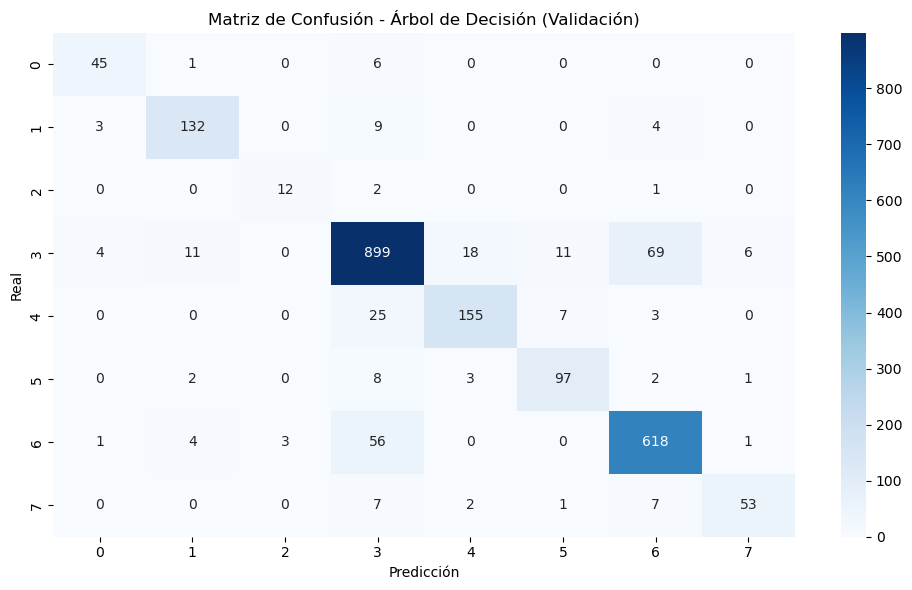

In [7]:
# Validación Modelo Árbol de Decisión - en Operaciones por Mecanismo de Confirmación
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo con conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_arbol_val = modelo_arbol.predict(X_val)

# 4. Evaluar el modelo
exactitud_arbol_val = accuracy_score(y_val, y_pred_arbol_val)
print(f"\nExactitud en el conjunto de validación (Árbol de Decisión): {exactitud_arbol_val:.4f}\n")

# 5. Reporte de clasificación
print("Reporte de clasificación (Árbol de Decisión - validación):")
print(classification_report(y_val, y_pred_arbol_val, target_names=le.classes_))

# 6. Matriz de confusión
plt.figure(figsize=(10, 6))
matriz_confusion_arbol_val = confusion_matrix(y_val, y_pred_arbol_val)
sns.heatmap(matriz_confusion_arbol_val, cmap='Blues', annot=True, fmt='d')
plt.title("Matriz de Confusión - Árbol de Decisión (Validación)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Exactitud en el conjunto de prueba (Árbol de Decisión): 0.8705

Reporte de clasificación (Árbol de Decisión):
                                                            precision    recall  f1-score   support

            Depósitos a depósito de bajo monto en efectivo       0.98      0.95      0.97        44
 Operaciones monetarias confirmadas con biometría dactilar       0.89      0.85      0.87       124
   Operaciones monetarias confirmadas con biometría facial       0.92      0.92      0.92        13
              Operaciones monetarias confirmadas con clave       0.87      0.88      0.88       848
        Operaciones monetarias confirmadas con contactless       0.82      0.80      0.81       158
Operaciones monetarias confirmadas con contactless y clave       0.80      0.87      0.84        94
         Operaciones monetarias confirmadas con código OTP       0.88      0.88      0.88       569
          Operaciones monetarias confirmadas con código QR       0.88      0.86      0.87

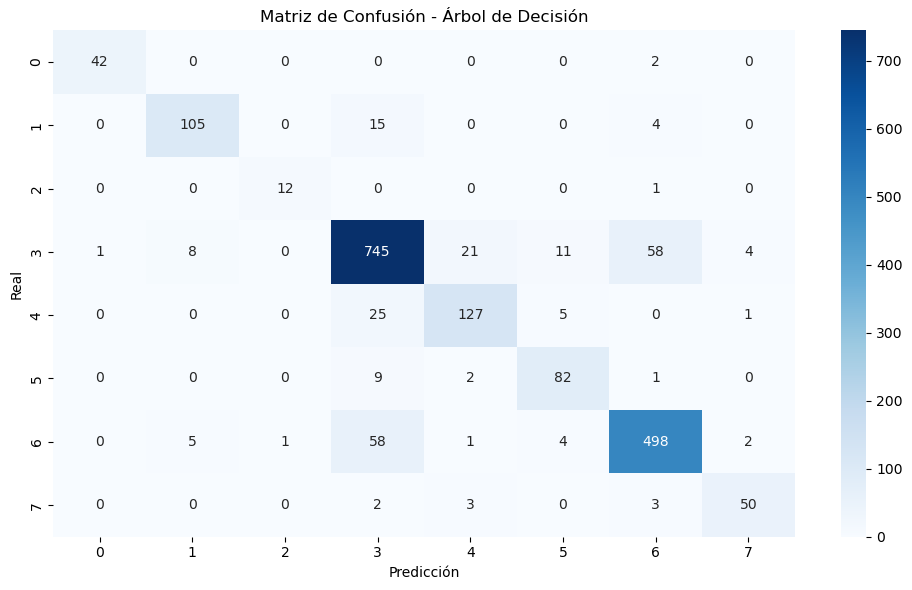

In [8]:
# Modelo Arbol de Decisión Operaaciones por Mecanismo de Confirmación
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo
modelo_arbol = DecisionTreeClassifier(random_state=42)

# 2. Entrenar el modelo
modelo_arbol.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred_arbol = modelo_arbol.predict(X_test)

# 4. Evaluar el modelo
exactitud = accuracy_score(y_test, y_pred_arbol)
print(f"Exactitud en el conjunto de prueba (Árbol de Decisión): {exactitud:.4f}\n")

# 5. Reporte de clasificación
print("Reporte de clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_arbol, target_names=le.classes_))

# 6. Matriz de confusión
plt.figure(figsize=(10, 6))
matriz_confusion = confusion_matrix(y_test, y_pred_arbol)
sns.heatmap(matriz_confusion, cmap='Blues', annot=True, fmt='d')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



Exactitud en el conjunto de validación (Random Forest): 0.9122

Reporte de clasificación (Random Forest - validación):
                                                            precision    recall  f1-score   support

            Depósitos a depósito de bajo monto en efectivo       0.92      0.88      0.90        52
 Operaciones monetarias confirmadas con biometría dactilar       0.96      0.93      0.95       148
   Operaciones monetarias confirmadas con biometría facial       0.93      0.87      0.90        15
              Operaciones monetarias confirmadas con clave       0.90      0.93      0.92      1018
        Operaciones monetarias confirmadas con contactless       0.92      0.83      0.87       190
Operaciones monetarias confirmadas con contactless y clave       0.89      0.85      0.87       113
         Operaciones monetarias confirmadas con código OTP       0.92      0.92      0.92       683
          Operaciones monetarias confirmadas con código QR       0.91      0.90

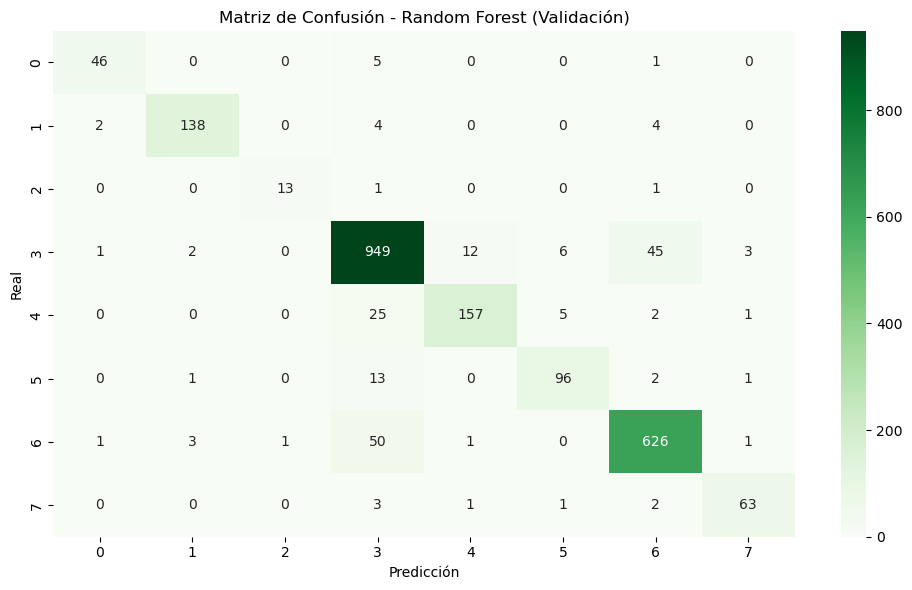

In [9]:
# Validación Modelo Random Forest en Operaciones por Mecanismo de Confirmación

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=30,
    random_state=42,
    n_jobs=-1
)

# 2. Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de validación
y_pred_rf_val = modelo_rf.predict(X_val)

# 4. Evaluar el modelo
exactitud_rf_val = accuracy_score(y_val, y_pred_rf_val)
print(f"\nExactitud en el conjunto de validación (Random Forest): {exactitud_rf_val:.4f}\n")

# 5. Reporte de clasificación
print("Reporte de clasificación (Random Forest - validación):")
print(classification_report(y_val, y_pred_rf_val, target_names=le.classes_))

# 6. Matriz de confusión
plt.figure(figsize=(10, 6))
matriz_confusion_rf_val = confusion_matrix(y_val, y_pred_rf_val)
sns.heatmap(matriz_confusion_rf_val, cmap='Greens', annot=True, fmt='d')
plt.title("Matriz de Confusión - Random Forest (Validación)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



Exactitud en el conjunto de prueba (Random Forest): 0.8910

Reporte de clasificación (Random Forest):
                                                            precision    recall  f1-score   support

            Depósitos a depósito de bajo monto en efectivo       1.00      0.95      0.98        44
 Operaciones monetarias confirmadas con biometría dactilar       0.97      0.92      0.95       124
   Operaciones monetarias confirmadas con biometría facial       1.00      0.85      0.92        13
              Operaciones monetarias confirmadas con clave       0.88      0.90      0.89       848
        Operaciones monetarias confirmadas con contactless       0.89      0.80      0.84       158
Operaciones monetarias confirmadas con contactless y clave       0.83      0.86      0.84        94
         Operaciones monetarias confirmadas con código OTP       0.88      0.89      0.89       569
          Operaciones monetarias confirmadas con código QR       0.96      0.91      0.94       

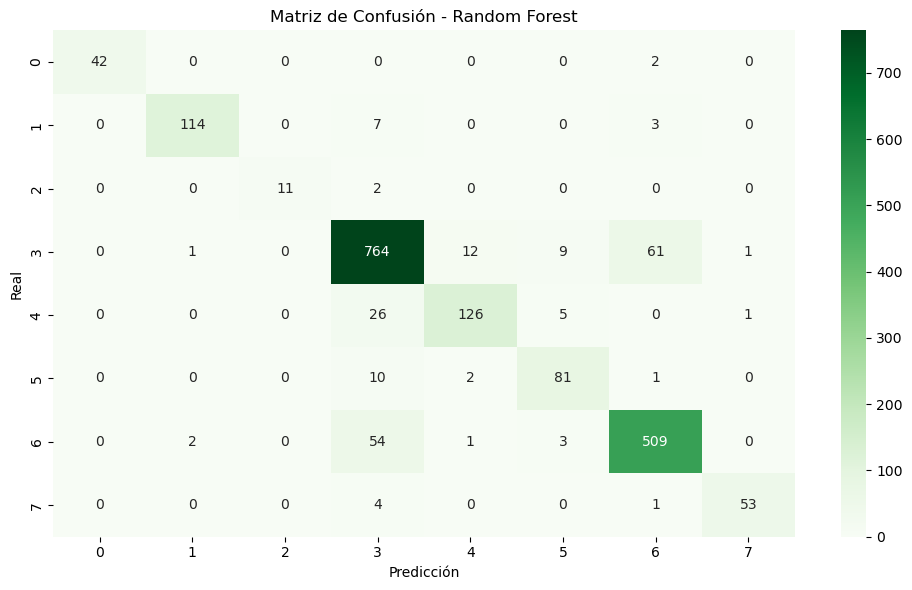

In [10]:
# Test Modelo Random Forest Operaaciones por Mecanismo de Confirmación

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo
modelo_rf = RandomForestClassifier(
    n_estimators=30,       # número de árboles para mantener tiempos bajos
    random_state=42,
    n_jobs=-1              # usar todos los núcleos disponibles
)

# 2. Entrenar el modelo
modelo_rf.fit(X_train, y_train)

# 3. Predecir sobre el conjunto de prueba
y_pred_rf = modelo_rf.predict(X_test)

# 4. Evaluar el modelo
exactitud_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nExactitud en el conjunto de prueba (Random Forest): {exactitud_rf:.4f}\n")

# 5. Reporte de clasificación
print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

# 6. Matriz de confusión
plt.figure(figsize=(10, 6))
matriz_confusion_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(matriz_confusion_rf, cmap='Greens', annot=True, fmt='d')
plt.title("Matriz de Confusión - Random Forest")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


Entrenando LightGBM con validación interna...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 550
[LightGBM] [Info] Number of data points in the train set: 5340, number of used features: 22
[LightGBM] [Info] Start training from score -3.778960
[LightGBM] [Info] Start training from score -2.736542
[LightGBM] [Info] Start training from score -5.027633
[LightGBM] [Info] Start training from score -0.811071
[LightGBM] [Info] Start training from score -2.487156
[LightGBM] [Info] Start training from score -3.007032
[LightGBM] [Info] Start training from score -1.208979
[LightGBM] [Info] Start training from score -3.495385
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until valida

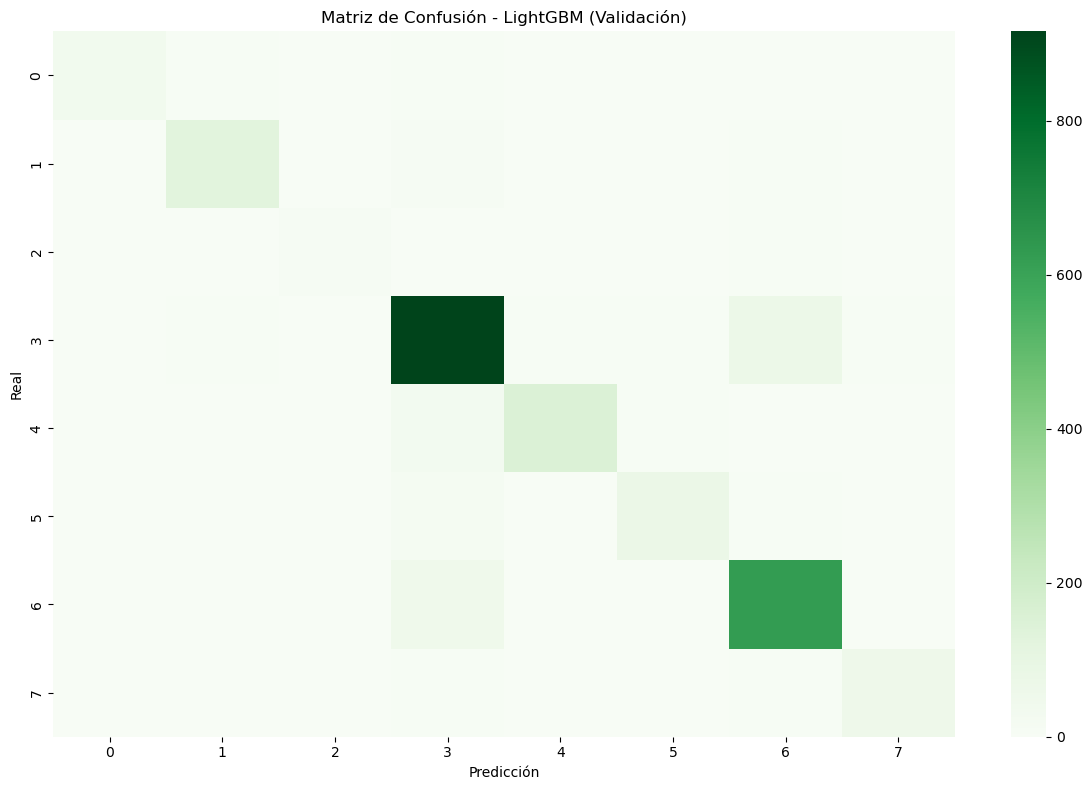

In [11]:
# Validación Modelo LGBM CODIGO_CANAL_AGRUPADO
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Renombrar columnas para compatibilidad con LightGBM
def renombrar_columnas_lightgbm(df):
    columnas_limpias = [f"feature_{i}" for i in range(df.shape[1])]
    df.columns = columnas_limpias
    return df

# Aplicar renombramiento
X_train = renombrar_columnas_lightgbm(X_train)
X_val = renombrar_columnas_lightgbm(X_val)
X_test = renombrar_columnas_lightgbm(X_test)

# 1. Inicializar el modelo
modelo_lgb = LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    random_state=42
)

# 2. Entrenamiento con conjunto de validación
print("Entrenando LightGBM con validación interna...")
modelo_lgb.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    eval_metric='multi_logloss',
    callbacks=[early_stopping(10), log_evaluation(10)]
)

# 3. Predicción sobre conjunto de validación
y_pred_lgb_val = modelo_lgb.predict(X_val)

# 4. Evaluación del modelo
exactitud_lgb_val = accuracy_score(y_val, y_pred_lgb_val)
print(f"\n Exactitud en conjunto de validación (LightGBM): {exactitud_lgb_val:.4f}\n")

print(" Reporte de clasificación (LightGBM - validación):")
print(classification_report(y_val, y_pred_lgb_val, target_names=le.classes_))

# 5. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_lgb_val = confusion_matrix(y_val, y_pred_lgb_val)
sns.heatmap(matriz_confusion_lgb_val, cmap="Greens", annot=False, fmt='g')
plt.title('Matriz de Confusión - LightGBM (Validación)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


 Exactitud en conjunto de prueba (LightGBM): 0.8564

 Reporte de clasificación (LightGBM - prueba):
                                                            precision    recall  f1-score   support

            Depósitos a depósito de bajo monto en efectivo       1.00      0.86      0.93        44
 Operaciones monetarias confirmadas con biometría dactilar       0.89      0.88      0.88       124
   Operaciones monetarias confirmadas con biometría facial       1.00      0.92      0.96        13
              Operaciones monetarias confirmadas con clave       0.85      0.87      0.86       848
        Operaciones monetarias confirmadas con contactless       0.89      0.78      0.83       158
Operaciones monetarias confirmadas con contactless y clave       0.82      0.78      0.80        94
         Operaciones monetarias confirmadas con código OTP       0.84      0.86      0.85       569
          Operaciones monetarias confirmadas con código QR       0.89      0.84      0.87        5

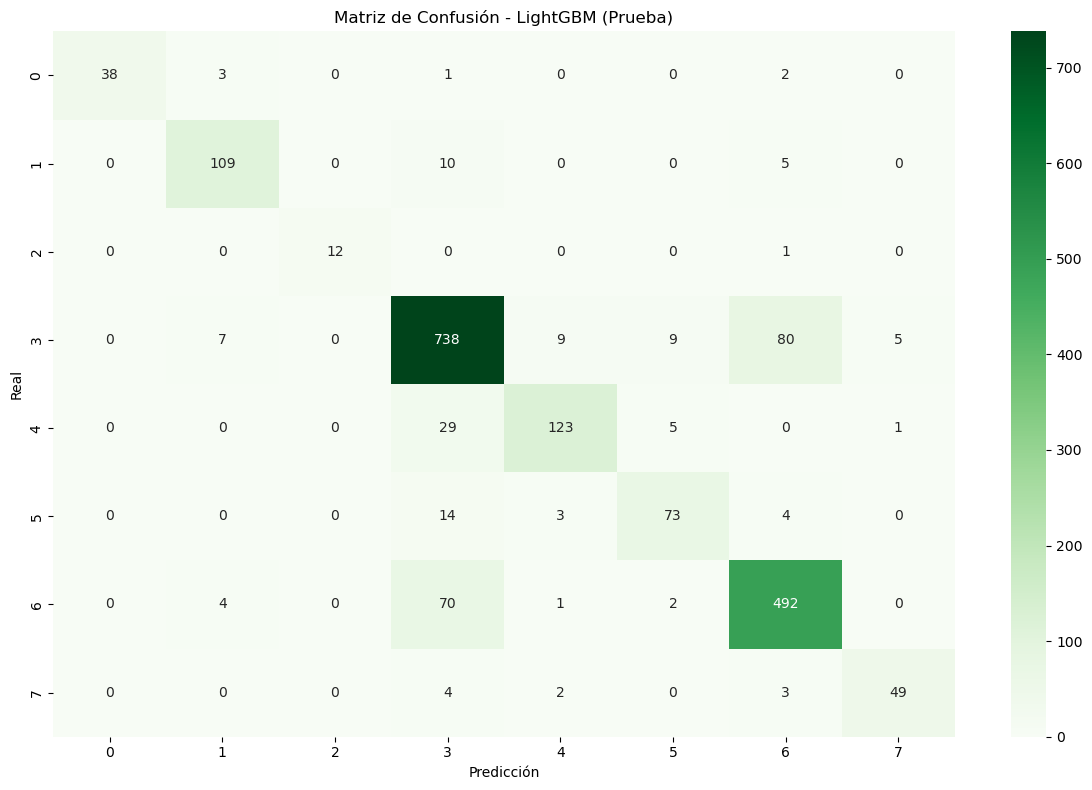

In [13]:
# test final sobre el conjunto de prueba con LightGBM (CODIGO_MECANISMO_CONFIRMACION)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predicción sobre el conjunto de prueba
y_pred_lgb_test = modelo_lgb.predict(X_test)

# 2. Evaluación
exactitud_lgb_test = accuracy_score(y_test, y_pred_lgb_test)
print(f"\n Exactitud en conjunto de prueba (LightGBM): {exactitud_lgb_test:.4f}")

print("\n Reporte de clasificación (LightGBM - prueba):")
print(classification_report(y_test, y_pred_lgb_test, target_names=le.classes_))

# 3. Matriz de confusión
plt.figure(figsize=(12, 8))
matriz_confusion_lgb_test = confusion_matrix(y_test, y_pred_lgb_test)
sns.heatmap(matriz_confusion_lgb_test, cmap="Greens", annot=True, fmt='d')
plt.title('Matriz de Confusión - LightGBM (Prueba)')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.tight_layout()
plt.show()


Entrenando HistGradientBoostingClassifier...

Exactitud en el conjunto de prueba (HistGradientBoosting): 0.7149

Reporte de clasificación (HistGradientBoosting):
                                                            precision    recall  f1-score   support

            Depósitos a depósito de bajo monto en efectivo       0.73      0.75      0.74        44
 Operaciones monetarias confirmadas con biometría dactilar       0.73      0.49      0.59       124
   Operaciones monetarias confirmadas con biometría facial       1.00      0.77      0.87        13
              Operaciones monetarias confirmadas con clave       0.71      0.79      0.75       848
        Operaciones monetarias confirmadas con contactless       0.86      0.65      0.74       158
Operaciones monetarias confirmadas con contactless y clave       0.89      0.52      0.66        94
         Operaciones monetarias confirmadas con código OTP       0.66      0.72      0.69       569
          Operaciones monetarias conf

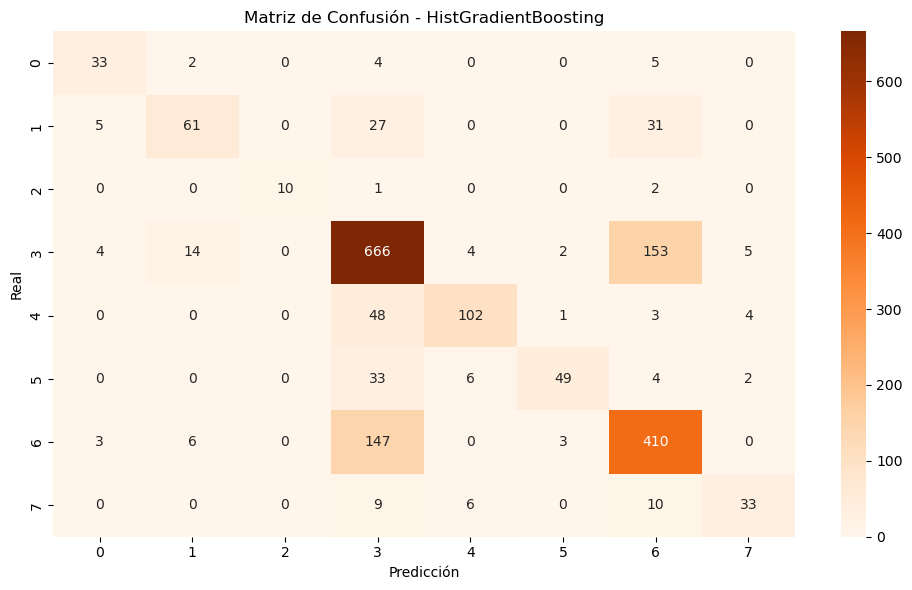

In [12]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Inicializar el modelo
modelo_hgb = HistGradientBoostingClassifier(
    max_iter=50,      # Iteraciones (equivale a n_estimators)
    max_depth=3,      # Profundidad máxima de los árboles
    random_state=42
)

# 2. Entrenamiento
print("Entrenando HistGradientBoostingClassifier...")
modelo_hgb.fit(X_train, y_train)

# 3. Predicción
y_pred_hgb = modelo_hgb.predict(X_test)

# 4. Evaluación
exactitud_hgb = accuracy_score(y_test, y_pred_hgb)
print(f"\nExactitud en el conjunto de prueba (HistGradientBoosting): {exactitud_hgb:.4f}\n")

# 5. Reporte de clasificación
print("Reporte de clasificación (HistGradientBoosting):")
print(classification_report(y_test, y_pred_hgb, target_names=le.classes_))

# 6. Matriz de confusión
plt.figure(figsize=(10, 6))
matriz_confusion_hgb = confusion_matrix(y_test, y_pred_hgb)
sns.heatmap(matriz_confusion_hgb, cmap='Oranges', annot=True, fmt='d')
plt.title("Matriz de Confusión - HistGradientBoosting")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Definir el espacio de búsqueda
param_dist = {
    'n_estimators': [10, 30, 50, 70, 100],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Inicializar el modelo base
modelo_rf_base = RandomForestClassifier(random_state=42)

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=modelo_rf_base,
    param_distributions=param_dist,
    n_iter=10,  # número de combinaciones a evaluar
    scoring='accuracy',
    cv=3,
    random_state=42,
    verbose=2,
    n_jobs=-1
)

# Ejecutar la búsqueda
print("Ejecutando RandomizedSearchCV...")
random_search.fit(X_train, y_train)

# Resultados
print("\nMejores hiperparámetros encontrados:")
print(random_search.best_params_)

# Evaluar sobre el conjunto de validación
mejor_modelo_random = random_search.best_estimator_
y_pred_random = mejor_modelo_random.predict(X_val)
print("\nExactitud del modelo con Randomized Search (validación):", accuracy_score(y_val, y_pred_random))
print("\nReporte de clasificación (validación):")
print(classification_report(y_val, y_pred_random, target_names=le.classes_))


In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir grilla enfocada
param_grid = {
    'n_estimators': [80, 100, 120],
    'max_depth': [None, 15, 20],
    'min_samples_split': [2, 5],
    'max_features': ['sqrt']
}

# Inicializar el modelo base
modelo_rf_base = RandomForestClassifier(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=modelo_rf_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Ejecutar la búsqueda
print("Ejecutando GridSearchCV...")
grid_search.fit(X_train, y_train)

# Resultados
print("\nMejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluar sobre el conjunto de validación
mejor_modelo_grid = grid_search.best_estimator_
y_pred_grid = mejor_modelo_grid.predict(X_val)

print("\nExactitud del modelo optimizado (Grid Search):", accuracy_score(y_val, y_pred_grid))
print("\nReporte de clasificación (validación):")
print(classification_report(y_val, y_pred_grid, target_names=le.classes_))


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predecir sobre el conjunto de prueba
y_pred_test = mejor_modelo_grid.predict(X_test)

# 2. Evaluar desempeño
exactitud_test = accuracy_score(y_test, y_pred_test)
print(f"\n Exactitud final sobre conjunto de prueba: {exactitud_test:.4f}\n")

print("Reporte de clasificación (conjunto de prueba):")
print(classification_report(y_test, y_pred_test, target_names=le.classes_))

# 3. Matriz de confusión
plt.figure(figsize=(10, 6))
matriz_confusion_test = confusion_matrix(y_test, y_pred_test)
sns.heatmap(matriz_confusion_test, cmap='Purples', annot=True, fmt='d')
plt.title("Matriz de Confusión – Conjunto de Prueba")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()
